# Sommaire

* [Introduction](#introduction)
* [I) Importation des données](#i)
* [II) Nettoyage du jeu de données](#ii)
    * [1) Importation plus compliquée que prévu](#ii1)
    * [2) Un peu de ménage](#ii2)
    * [3) Nettoyage du jeu de données](#ii3)
    * [4) Valeurs manquantes](#ii4)
* [III) Analyses](#iii)
    * [1) Univariées](#iii1)
        * [i) Qualitatives](#iii1i)
        * [ii) Quantitatives](#iii1ii)
    * [2) Bivariées](#iii2)
        * [i) Qualitatives](#iii2i)
        * [ii) Quantitatives](#iii2ii)
    * [3) Multivariées](#iii3)
        * [i) ACP](#iii3i)
        * [ii) Visualisations](#iii3ii)
        * [iii) Nouveau clustering](#iii3iii)
    * [4) Comparaisons avec les nouveaux clusters](#iii4)
    * [5) ANOVA](#iii5)
* [Conclusion](#conclusion)

# Introduction <a class="anchor" id="introduction"></a>
Dans ce notebook, nous allons tenter d'améliorer la base de données *Open Food Facts* de l'agence **Santé publique France** en nous intéressant notamment aux valeurs manquantes, en vue du développement d'une application. Nous réaliserons ensuite une analyse exploratoire des données.

# I) Importation des données <a class="anchor" id="i"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#J'ai eu un message informant d'erreurs de type sur certaines colonnes, qui a été réglé par "low_memory=False"
raw_data = pd.read_csv('data.csv', sep='\t', low_memory=False)
raw_data

code                                                url  \
0       0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1       0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2       0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3       0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4       0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
0                                   NaN      1kg  ...     NaN   
1                                   NaN      NaN  ...     NaN   
2                                   NaN      NaN  ...     NaN   
3                                   NaN      NaN  ...     NaN   
4                                   NaN      NaN  ...     NaN   
...                                 ...      ...  ...     ...   
320767                              NaN        1  ...     NaN   
320768                              NaN      NaN  ...     NaN   
320769  Leba pickle flavor potato chips     50 g  ...     NaN   
320770                              NaN      67g  ...     NaN   
320771                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
0                              NaN                              N

# II) Nettoyage du jeu de données <a class="anchor" id="ii"></a>

In [3]:
#Structure globale du dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [4]:
#Recherche d'erreurs de type
#On affiche toutes les lignes
pd.set_option('display.max_rows', None)
raw_data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

Pas de format date pour les colonnes date, certaines colonnes en object alors qu'on s'attendrait à les avoir en float, conformément aux <A HREF="https://world.openfoodfacts.org/data/data-fields.txt">spécifications fournies</A>.
On va y revenir un peu plus tard.

In [5]:
#Recherche de valeurs manquantes
raw_data.isnull().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [6]:
#Enormément de valeurs manquantes, mais avant tout je suis un peu supris d'en voir dans les colonnes code et url
raw_data.loc[raw_data["code"].isnull()]

code  url                                            creator  \
189068  NaN  NaN                  villecomtal-sur-arros-gers-france   
189103  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189109  NaN  NaN                  villecomtal-sur-arros-gers-france   
189119  NaN  NaN                  villecomtal-sur-arros-gers-france   
189152  NaN  NaN                  villecomtal-sur-arros-gers-france   
189160  NaN  NaN                  villecomtal-sur-arros-gers-france   
189162  NaN  NaN                  villecomtal-sur-arros-gers-france   
189168  NaN  NaN                  villecomtal-sur-arros-gers-france   
189242  NaN  NaN                  villecomtal-sur-arros-gers-france   
189244  NaN  NaN                  villecomtal-sur-arros-gers-france   
189248  NaN  NaN                  villecomtal-sur-arros-gers-france   
189250  NaN  NaN                  villecomtal-sur-arros-gers-france   
189260  NaN  NaN                  villecomtal-sur-arros-gers-france   
189262  NaN  NaN                  villecomtal-sur-arros-gers-france   
189269  NaN  NaN                  villecomtal-sur-arros-gers-france   
189272  NaN  NaN                  villecomtal-sur-arros-gers-france   
189345  NaN  NaN  villecomtal-sur-arros-gers-france,saint-just-c...   
189362  NaN  NaN                  villecomtal-sur-arros-gers-france   
189364  NaN  NaN                  villecomtal-sur-arros-gers-france   
189379  NaN  NaN                  villecomtal-sur-arros-gers-france   
189404  NaN  NaN                  villecomtal-sur-arros-gers-france   
189406  NaN  NaN                  villecomtal-sur-arros-gers-france   
189417  NaN  NaN                  villecomtal-sur-arros-gers-france   

                                    created_t           created_datetime  \
189068                                 France                        NaN   
189103       Villecresnes,Villeurbanne,France                Dia,Sogeres   
189109                                 France                        NaN   
189119                          Veynes,France                     SuperU   
189152                        Torcy 77,France                  Carrefour   
189160                                 France                        NaN   
189162                    Saint-Priest,France                     Auchan   
189168                                    NaN                        NaN   
189242            Villers Bocage 80260,France           Carrefour market   
189244            Villers Bocage 80260,France           Carrefour market   
189248                                    NaN                        NaN   
189250                          Veynes,France             SuperU,Leclerc   
189260                            Montgermont                       Spar   
189262            Villers Bocage 80260,France         Banque alimentaire   
189269                                 France                    Leclerc   
189272                    Marseille 5°,France             Auchan,Super U   
189345                France,Nantes,Carquefou  Super U,Leclerc,Carrefour   
189362                                 France                        NaN   
189364                      Courrières,France                       Cora   
189379                                    NaN                        NaN   
189404  Brétigny-sur-Orge,Marseille 5°,France             Auchan,Super U   
189406                    Marseille 5°,France                    Super U   
189417                                 France                        NaN   

                        last_modified_t               last_modified_datetime  \
189068                  Belgique,France                 en:belgium,en:france   
189103                           France                            en:france   
189109  Belgique,France, en:switzerland  en:belgium,en:france,en:switzerland   
189119                           France                            en:france   
189152                           France                            en:france 

Il y a clairement un souci, dans chaque ligne où le code est manquant, l'url l'est aussi et le reste des colonnes semblent fausses également. Par exemple, on retrouve des magasins, villes et pays dans des colonnes où on s'attend à retrouver des dates. Je suppose qu'il y a des imperfections dans le .csv source, alors on va creuser un peu.
## 1) Importation plus compliquée que prévu <a class="anchor" id="ii1"></a>

In [7]:
#On va regarder les lignes avant et après une de nos lignes problématiques
pd.set_option('display.max_columns', None)
raw_data.iloc[189067:189070]

code                                                url  \
189067  3033490433864  http://world-fr.openfoodfacts.org/produit/3033...   
189068            NaN                                                NaN   
189069  3033490433888  http://world-fr.openfoodfacts.org/produit/3033...   

                                  creator   created_t      created_datetime  \
189067                           penelope  1333713837  2012-04-06T12:03:57Z   
189068  villecomtal-sur-arros-gers-france      France                   NaN   
189069         openfoodfacts-contributors  1400692621  2014-05-21T17:17:01Z   

        last_modified_t last_modified_datetime  \
189067       1434554370   2015-06-17T15:19:30Z   
189068  Belgique,France   en:belgium,en:france   
189069       1480085125   2016-11-25T14:45:25Z   

                                             product_name  \
189067  Activia Fruits (Fraise, Ananas, Cerise, Mangue...   
189068                                    Belgique,France   
189069                                         Activia 0%   

                                             generic_name           quantity  \
189067  Lait fermenté sucré aromatisé avec morceaux de...  2 kg (16 x 125 g)   
189068  Lait entier, fruits : fraise (20 %), mangue (1...                NaN   
189069                                                NaN                  8   

                                       packaging  \
189067  Frais,Pot,Plastique,Opercule,Etui,Carton   
189068                                       NaN   
189069                                       NaN   

                                  packaging_tags          brands  \
189067  frais,pot,plastique,opercule,etui,carton  Danone,Activia   
189068                                       NaN             NaN   
189069                                       NaN          Danone   

           brands_tags                                         categories  \
189067  danone,activia  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189068             NaN                                      125 g (1 pot)   
189069          danone                                                NaN   

                                          categories_tags  \
189067  en:fresh-foods,en:dairies,en:desserts,en:yogur...   
189068                                                NaN   
189069                                                NaN   

                                            categories_fr  \
189067  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189068                                                  6   
189069                                                NaN   

                                                  origins  \
189067                                                NaN   
189068   [ lait-entier -> fr:lait-entier  ]  [ lait ->...   
189069                                                NaN   

                                             origins_tags  \
189067                                                NaN   
189068  en:e1422,en:e440,en:e412,en:e120,en:e160c,en:e101   
189069                                                NaN   

                                     manufacturing_places  \
189067  Danone Produits Frais France (DPFF) - 2 Avenue...   
189068  E1422 - Adipate de diamidon acétylé,E440 - Pec...   
189069                                                NaN   

                                manufacturing_places_tags labels labels_tags  \
189067  danone-produits-frais-france-dpff-2-avenue-de-...    NaN         NaN   
189068                                                  0    NaN         NaN   
189069                                                NaN    NaN         NaN   

       labels_fr         emb_codes    emb_codes_tags first_packaging_code_geo  \
189067       NaN  FR 32.464.040 EC  fr-32-464-040-ec       43.400279,0.199525   
189068         0               NaN               NaN                      NaN   
189069       NaN               NaN              

Que des valeurs manquantes dans la ligne 189067 après la colonne first_packaging_code_geo. On voit que les colonnes qui suivent sont cities, stores, countries, étrangement comme les valeurs qu'on retrouve dans la ligne suivante, mais dès la troisième colonne.

Je suppose que dans le .csv d'origine il y a un retour à la ligne à cet endroit là, sans doute suivi de deux tabulations étant donné que les colonnes code et url sont vides à chaque fois. On va zoomer sur une ou deux autres lignes problématiques pour voir si le problème est le même partout.

In [8]:
raw_data.iloc[189102:189105]

code                                                url  \
189102  3033490594510  http://world-fr.openfoodfacts.org/produit/3033...   
189103            NaN                                                NaN   
189104  3033490594534  http://world-fr.openfoodfacts.org/produit/3033...   

                                                  creator  \
189102                         openfoodfacts-contributors   
189103  villecomtal-sur-arros-gers-france,saint-just-c...   
189104                                           teolemon   

                               created_t      created_datetime  \
189102                        1355855118  2012-12-18T18:25:18Z   
189103  Villecresnes,Villeurbanne,France           Dia,Sogeres   
189104                        1421842611  2015-01-21T12:16:51Z   

       last_modified_t last_modified_datetime  \
189102      1438163332   2015-07-29T09:48:52Z   
189103          France              en:france   
189104      1454259229   2016-01-31T16:53:49Z   

                                             product_name  \
189102  Velouté Fruix (Fraise, Framboise, Fruits rouge...   
189103                                             France   
189104               Taillefine Le Brassé (0 % MG) 8 Pots   

                                             generic_name           quantity  \
189102                   Yaourts sucrés, aux fruits mixés   1 kg (8 x 125 g)   
189103  _Lait_ entier (59,5 %), _lait_ écrémé concentr...  Lait, lait, crème   
189104  Spécialité laitière brassée nature enrichie en...   1 kg (8 x 125 g)   

                                                packaging  \
189102  Frais,Opercule papier et pot plastique à jeter...   
189103                                                NaN   
189104  Frais,Opercule et pot plastique à jeter,Etui c...   

                                           packaging_tags             brands  \
189102  frais,opercule-papier-et-pot-plastique-a-jeter...     Danone,Velouté   
189103                                                NaN                NaN   
189104  frais,opercule-et-pot-plastique-a-jeter,etui-c...  Danone,Taillefine   

              brands_tags                                         categories  \
189102     danone,veloute  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189103                NaN                                      125 g (1 pot)   
189104  danone,taillefine  Frais,Produits laitiers,Yaourts,Yaourts brassé...   

                                          categories_tags  \
189102  en:fresh-foods,en:dairies,en:desserts,en:yogur...   
189103                                                NaN   
189104  en:fresh-foods,en:dairies,en:yogurts,en:low-fa...   

                                            categories_fr  \
189102  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189103                                                  6   
189104  Frais,Produits laitiers,Yaourts,Yaourts allégé...   

                                                  origins  \
189102                                                NaN   
189103   [ lait-entier -> fr:lait-entier  ]  [ lait ->...   
189104                                                NaN   

                                           origins_tags  \
189102                                              NaN   
189103  en:e440,en:e410,en:e412,en:e333,en:e120,en:e163   
189104                                              NaN   

                                     manufacturing_places  \
189102  Danone Produits Frais France (DPFF) - 2 Avenue...   
189103  E440 - Pectines,E410 - Farine de graines de ca...   
189104  Danone Produits Frais France (DPFF) - 60 Impas...   

                                manufacturing_places_tags  \
189102  danone-produits-frais-france-dpff-2-avenue-de-...   
189103                                                  0   
189104  danone-produits-frais-france-dpff-60-impasse-d...   

                                                   labels  \
189102                       

In [9]:
#Le dernier de la liste
raw_data.iloc[189416:189419]

code                                                url  \
189416  3033495125016  http://world-fr.openfoodfacts.org/produit/3033...   
189417            NaN                                                NaN   
189418  3033610002017  http://world-fr.openfoodfacts.org/produit/3033...   

                                  creator   created_t      created_datetime  \
189416                           jeanbono  1430484534  2015-05-01T12:48:54Z   
189417  villecomtal-sur-arros-gers-france      France                   NaN   
189418                            kiliweb  1489173405  2017-03-10T19:16:45Z   

       last_modified_t last_modified_datetime  \
189416      1438163536   2015-07-29T09:52:16Z   
189417          France              en:france   
189418      1489173405   2017-03-10T19:16:45Z   

                                             product_name  \
189416  Taillefine, Yaourt au Fruits (0 % MG, 0 % Sucr...   
189417                                             France   
189418  Jambon pata negra grande tradition affiné 24 mois   

                                             generic_name  \
189416                                 Yaourts aux fruits   
189417  _Lait_ écrémé, _lait_ écrémé concentré ou en p...   
189418                                                NaN   

                            quantity  \
189416        2 kg [2 x (8 x 125 g)]   
189417  Lait, lait, lait, lait, lait   
189418                           NaN   

                                                packaging  \
189416  Frais,Opercule et pot plastique à jeter,Etui c...   
189417                                                NaN   
189418                                                NaN   

                                           packaging_tags             brands  \
189416  frais,opercule-et-pot-plastique-a-jeter,etui-c...  Danone,Taillefine   
189417                                                NaN                NaN   
189418                                                NaN           Labeyrie   

              brands_tags                                         categories  \
189416  danone,taillefine  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189417                NaN                                      125 g (1 pot)   
189418           labeyrie                                                NaN   

                                          categories_tags  \
189416  en:fresh-foods,en:dairies,en:desserts,en:yogur...   
189417                                                NaN   
189418                                                NaN   

                                            categories_fr  \
189416  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189417                                                 10   
189418                                                NaN   

                                                  origins  \
189416                                                NaN   
189417   [ lait-ecreme -> fr:lait-ecreme  ]  [ lait ->...   
189418                                                NaN   

                                             origins_tags  \
189416                                                NaN   
189417  en:e1200,en:e412,en:e440,en:e407,en:e415,en:e3...   
189418                                                NaN   

                                     manufacturing_places  \
189416  Danone Produits Frais France (DPFF) - 2 Avenue...   
189417  E1200 - Polydextrose,E412 - Gomme de guar,E440...   
189418                                                NaN   

                                manufacturing_places_tags  \
189416  danone-produits-frais-france-dpff-2-avenue-de-...   
189417                                                  0   
189418                                                NaN   

                                                   labels  \
189416  Peu ou pas de sucre,Sans sucre ajouté,0 % MG,I...   
189417                                                NaN   
189418 

Il semblerait qu'on ait vu *presque* juste avec notre première hypothèse, les valeurs qui se retrouvent dans la colonne creator ressemblent aux valeurs qu'on est censé trouver dans la colonne cities_tags. Ce qui voudrait dire que la colonne url se retrouve vide parce que la colonne juste avant cities_tags (cities) est toujours vide. En effet, d'après notre recherche de valeurs manquantes, il n'y aurait que 23 valeurs non-manquantes dans la colonnes cities. Ce qui correspond au nombre de valeurs manquantes dans les colonnes code et url. Tout est lié, c'est fou !

Il y a donc vraisemblablement un retour à la ligne suivi d'une seule tabulation à remplacer par juste une tabulation. Et comme le reste des lignes de la colonne code (la 1ère du df) sont renseignées, il ne devrait a priori pas y avoir d'autres instances dans le fichier où il y a un retour à la ligne immédiatement suivi d'une tabulation.

In [10]:
#Mais d'abord, pour éviter les accidents
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [11]:
#Je n'ai pas trouvé comment corriger cette erreur directement depuis le dataframe, par contre je sais qu'on peut modifier le .csv d'origine
#Seulement il est trop volumineux pour être manipulé depuis Excel sur ma bécane, alors on va devoir faire ça directement dans le notebook
#Afin d'éviter de créer une copie du fichier .csv (il fait plus de 800Mo), on importe StringIO afin de lire nos données nettoyées comme si elles étaient dans un fichier .csv
from io import StringIO

#On lit le fichier source puis on remplace les retours à la lignes suivis d'une tabulation par juste une tabulation
#La construction "with" permet de nous assurer que le fichier est fermé après avoir effectué nos opérations
with open('data.csv', 'r', encoding='utf-8') as fichier_csv:
    clean_data = fichier_csv.read().replace('\n\t', '\t')

#On créé un df à partir des données nettoyées
raw_data2 = pd.read_csv(StringIO(clean_data), sep='\t', low_memory=False)
raw_data2

code                                                url  \
0       0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1       0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2       0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3       0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4       0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320744  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320745       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320746  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320747  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320748   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320744  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320745             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320746                      tomato  1422099377  2015-01-24T11:36:17Z   
320747  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320748             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

        last_modified_t last_modified_datetime  \
0            1474103893   2016-09-17T09:18:13Z   
1            1489069957   2017-03-09T14:32:37Z   
2            1489069957   2017-03-09T14:32:37Z   
3            1489055731   2017-03-09T10:35:31Z   
4            1489055653   2017-03-09T10:34:13Z   
...                 ...                    ...   
320744       1491244498   2017-04-03T18:34:58Z   
320745       1491244499   2017-04-03T18:34:59Z   
320746       1491244499   2017-04-03T18:34:59Z   
320747       1492340089   2017-04-16T10:54:49Z   
320748       1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320744                                  Tomato & ricotta    
320745  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320746                                            乐吧泡菜味薯片   
320747                           Tomates aux Vermicelles    
320748                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
0                                   NaN      1kg  ...     NaN   
1                                   NaN      NaN  ...     NaN   
2                                   NaN      NaN  ...     NaN   
3                                   NaN      NaN  ...     NaN   
4                                   NaN      NaN  ...     NaN   
...                                 ...      ...  ...     ...   
320744                              NaN        1  ...     NaN   
320745                              NaN      NaN  ...     NaN   
320746  Leba pickle flavor potato chips     50 g  ...     NaN   
320747                              NaN      67g  ...     NaN   
320748                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
0                              NaN                   

In [12]:
#On constate qu'il y a bien 23 lignes en moins, ça a l'air d'avoir fonctionné, mais pour en avoir le coeur net
pd.set_option('display.max_columns', None)
raw_data2.iloc[189067:189070]

code                                                url  \
189067  3033490433864  http://world-fr.openfoodfacts.org/produit/3033...   
189068  3033490433888  http://world-fr.openfoodfacts.org/produit/3033...   
189069  3033490470296  http://world-fr.openfoodfacts.org/produit/3033...   

                           creator   created_t      created_datetime  \
189067                    penelope  1333713837  2012-04-06T12:03:57Z   
189068  openfoodfacts-contributors  1400692621  2014-05-21T17:17:01Z   
189069                     kiliweb  1487322631  2017-02-17T09:10:31Z   

        last_modified_t last_modified_datetime  \
189067       1434554370   2015-06-17T15:19:30Z   
189068       1480085125   2016-11-25T14:45:25Z   
189069       1487322631   2017-02-17T09:10:31Z   

                                             product_name  \
189067  Activia Fruits (Fraise, Ananas, Cerise, Mangue...   
189068                                         Activia 0%   
189069                      Petite danette vanille, 6x70g   

                                             generic_name           quantity  \
189067  Lait fermenté sucré aromatisé avec morceaux de...  2 kg (16 x 125 g)   
189068                                                NaN                  8   
189069                                                NaN                NaN   

                                       packaging  \
189067  Frais,Pot,Plastique,Opercule,Etui,Carton   
189068                                       NaN   
189069                                       NaN   

                                  packaging_tags          brands  \
189067  frais,pot,plastique,opercule,etui,carton  Danone,Activia   
189068                                       NaN          Danone   
189069                                       NaN         Danette   

           brands_tags                                         categories  \
189067  danone,activia  Frais,Produits laitiers,Desserts,Yaourts,Yaour...   
189068          danone                                                NaN   
189069         danette                                                NaN   

                                          categories_tags  \
189067  en:fresh-foods,en:dairies,en:desserts,en:yogur...   
189068                                                NaN   
189069                                                NaN   

                                            categories_fr origins  \
189067  Frais,Produits laitiers,Desserts,Yaourts,Yaour...     NaN   
189068                                                NaN     NaN   
189069                                                NaN     NaN   

       origins_tags                               manufacturing_places  \
189067          NaN  Danone Produits Frais France (DPFF) - 2 Avenue...   
189068          NaN                                                NaN   
189069          NaN                                                NaN   

                                manufacturing_places_tags labels labels_tags  \
189067  danone-produits-frais-france-dpff-2-avenue-de-...    NaN         NaN   
189068                                                NaN    NaN         NaN   
189069                                                NaN    NaN         NaN   

       labels_fr         emb_codes    emb_codes_tags first_packaging_code_geo  \
189067       NaN  FR 32.464.040 EC  fr-32-464-040-ec       43.400279,0.199525   
189068       NaN               NaN               NaN                      NaN   
189069       NaN               NaN               NaN                      NaN   

        cities                        cities_tags purchase_places stores  \
189067     NaN  villecomtal-sur-arros-gers-france          France    NaN   
189068     NaN                                NaN             NaN    NaN   
189069     NaN                                NaN             NaN    NaN   

               countries        countries_tags     countries_fr  \
189067   Belgique,France  en

In [13]:
#Youpi ça a marché, à partir de là on va faire un peu de ménage dans les features avant de reprendre le nettoyage proprement dit
pd.reset_option('display.max_columns')

## 2) Un peu de ménage <a class="anchor" id="ii2"></a>

In [14]:
#On va regarder les valeurs manquantes à nouveau et essayer d'identifier quelles features garder pour l'analyse
pd.set_option('display.max_rows', None)
raw_data2.isnull().sum()

code                                               0
url                                                0
creator                                            2
created_t                                          0
created_datetime                                   1
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267976
quantity                                      215949
packaging                                     241789
packaging_tags                                241788
brands                                         28389
brands_tags                                    28397
categories                                    236360
categories_tags                               236360
categories_fr                                 236360
origins                                       298581
origins_tags                                  

In [15]:
#On jète un oeil à quelques colonnes pour nous aider à faire notre choix
#tail(20) parce qu'il n'y avait que des NaN avec head(20)
pd.reset_option('display.max_rows')
raw_data2[['pnns_groups_1','pnns_groups_2', 'main_category_fr']].tail(20)

pnns_groups_1          pnns_groups_2  \
320729              Beverages    Sweetened beverages   
320730                    NaN    Alcoholic beverages   
320731                    NaN                    NaN   
320732          Sugary snacks                 Sweets   
320733                    NaN                    NaN   
320734                    NaN                    NaN   
320735          Sugary snacks                 Sweets   
320736  Fruits and vegetables                 Fruits   
320737                    NaN                    NaN   
320738                    NaN    Alcoholic beverages   
320739                unknown                unknown   
320740              Beverages  Non-sugared beverages   
320741                    NaN                    NaN   
320742         Fish Meat Eggs         Processed meat   
320743           Salty snacks                   Nuts   
320744                    NaN                    NaN   
320745                    NaN                    NaN   
320746           Salty snacks             Appetizers   
320747                    NaN                    NaN   
320748                    NaN                    NaN   

                 main_category_fr  
320729                      Sodas  
320730                   Boissons  
320731                        NaN  
320732           Pâtes à tartiner  
320733                        NaN  
320734                        NaN  
320735        Produits d'élevages  
320736                     Fruits  
320737                        NaN  
320738                   Boissons  
320739                  pl:Szprot  
320740                 Thés verts  
320741                        NaN  
320742  Produits à tartiner salés  
320743            Fruits à coques  
320744                        NaN  
320745                        NaN  
320746            Chips et frites  
320747                        NaN  
320748                        NaN

In [16]:
#Ces 3 colonnes aident à catégoriser les produits, elles ont toutes les 3 pratiquement autant de valeurs manquantes alors je m'intéresse aux valeurs uniques
raw_data2[['pnns_groups_1','pnns_groups_2','main_category_fr']].nunique()

pnns_groups_1         14
pnns_groups_2         42
main_category_fr    3543
dtype: int64

In [17]:
print(raw_data2['pnns_groups_1'].unique())
print("\n")
print(raw_data2['pnns_groups_2'].unique())

[nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Composite foods' 'Fish Meat Eggs' 'Beverages'
 'Fat and sauces' 'fruits-and-vegetables' 'Milk and dairy products'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']


[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Potatoes' 'Dairy desserts' 'Fruit nectars' 'pastries'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


En guise d'informations générales sur les produits on va conserver code, product_name, brands, pnns_groups_1 et 2. En effet compte tenu du nombre important de valeurs manquantes, réduire le nombre de catégories permettra certainement de limiter le nombre d'incohérences lors de l'imputation plus tard. Donc main_category_fr ne me semble pas être une bonne option. N'étant pas sûr entre les deux autres colonnes, je vais conserver les deux pour l'instant.

Pour le nutri-score, nutrition_grade_fr est mieux renseigé que nutrition_grade_uk, on va donc également conserver nutrition-score-fr_100g pour rester cohérent. (*cocorico*)

In [18]:
#Petit zoom sur pnns_groups_1 et pnns_groups_2
#Pour corriger les doublons dans chaque colonnes et compter le nombre de valeurs uniques
raw_data2['pnns_groups_1'] = raw_data2['pnns_groups_1'].str.capitalize().str.replace('-',' ')
print(raw_data2['pnns_groups_1'].unique())
print(raw_data2['pnns_groups_1'].nunique())
print("\n")
raw_data2['pnns_groups_2'] = raw_data2['pnns_groups_2'].str.capitalize()
print(raw_data2['pnns_groups_2'].unique())
print(raw_data2['pnns_groups_2'].nunique())

[nan 'Unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Composite foods' 'Fish meat eggs' 'Beverages'
 'Fat and sauces' 'Milk and dairy products' 'Salty snacks']
10


[nan 'Unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals' 'Soups'
 'Chocolate products' 'Alcoholic beverages' 'Fruits' 'Sandwich' 'Cereals'
 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers' 'Nuts' 'Breakfast cereals'
 'Artificially sweetened beverages' 'Fruit juices' 'Eggs'
 'Fish and seafood' 'Dried fruits' 'Ice cream' 'Processed meat' 'Potatoes'
 'Dairy desserts' 'Fruit nectars' 'Pastries' 'Tripe dishes'
 'Salty and fatty products']
37


In [19]:
#On va voir si les valeurs manquantes de chaque colonne peuvent être renseignées à partir de l'autre
print(raw_data2.loc[raw_data2['pnns_groups_1'].notnull()]['pnns_groups_2'].isnull().sum())
print('\n')
print(raw_data2.loc[raw_data2['pnns_groups_2'].notnull()]['pnns_groups_1'].isnull().sum())

0


2978


In [20]:
#Pas de valeurs manquantes dans pnns_groups_2 si pnns_groups_1 n'est pas nul
#En revanche, quelques valeurs manquantes dans l'autre sens
raw_data2.loc[raw_data2['pnns_groups_1'].isnull()]['pnns_groups_2'].unique()

array([nan, 'Alcoholic beverages', 'Tripe dishes'], dtype=object)

In [21]:
#J'attribue à pnns_groups_1 la valeur Beverages quand pnns_groups_2 vaut Alcoholic beverages et Fish meat eggs quand pnns_groups_2 vaut Tripe dishes
raw_data2['pnns_groups_1'] = np.where(raw_data2['pnns_groups_2'] == 'Alcoholic beverages', 'Beverages',
                                      np.where(raw_data2['pnns_groups_2'] == 'Tripe dishes', 'Fish meat eggs', raw_data2['pnns_groups_1']))
#Pour vérifier
raw_data2.loc[raw_data2['pnns_groups_2'].notnull()]['pnns_groups_1'].isnull().sum()

0

In [22]:
#Plus de valeurs manquantes dans pnns_groups_1 si pnns_groups_2 n'est pas nul
#On passe au reste des colonnes et on commence par une petite vérification par curiosité
raw_data2[['states','states_tags','states_fr']]

states  \
0       en:to-be-completed, en:nutrition-facts-to-be-c...   
1       en:to-be-completed, en:nutrition-facts-complet...   
2       en:to-be-completed, en:nutrition-facts-complet...   
3       en:to-be-completed, en:nutrition-facts-complet...   
4       en:to-be-completed, en:nutrition-facts-complet...   
...                                                   ...   
320744  en:to-be-completed, en:nutrition-facts-to-be-c...   
320745  en:to-be-completed, en:nutrition-facts-complet...   
320746  en:to-be-completed, en:nutrition-facts-to-be-c...   
320747  en:to-be-completed, en:nutrition-facts-to-be-c...   
320748  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
0       en:to-be-completed,en:nutrition-facts-to-be-co...   
1       en:to-be-completed,en:nutrition-facts-complete...   
2       en:to-be-completed,en:nutrition-facts-complete...   
3       en:to-be-completed,en:nutrition-facts-complete...   
4       en:to-be-completed,en:nutrition-facts-complete...   
...                                                   ...   
320744  en:to-be-completed,en:nutrition-facts-to-be-co...   
320745  en:to-be-completed,en:nutrition-facts-complete...   
320746  en:to-be-completed,en:nutrition-facts-to-be-co...   
320747  en:to-be-completed,en:nutrition-facts-to-be-co...   
320748  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_fr  
0       A compléter,Informations nutritionnelles à com...  
1       A compléter,Informations nutritionnelles compl...  
2       A compléter,Informations nutritionnelles compl...  
3       A compléter,Informations nutritionnelles compl...  
4       A compléter,Informations nutritionnelles compl...  
...                                                   ...  
320744  A compléter,Informations nutritionnelles à com...  
320745  A compléter,Informations nutritionnelles compl...  
320746  A compléter,Informations nutritionnelles à com...  
320747  A compléter,Informations nutritionnelles à com...  
320748  A compléter,Informations nutritionnelles compl...  

[320749 rows x 3 columns]

In [23]:
#Rien d'intéressant ici, le reste des données concerne l'apport énergétique et les valeurs nutritionnelles
#Alors on va conserver toutes celles qui ont moins de 150000 valeurs manquantes, à savoir
apport_nutritionnel = raw_data2.columns[raw_data2.columns.get_loc('states_fr') + 1:]

# Compter les valeurs manquantes par colonne
valeurs_manquantes = raw_data2[apport_nutritionnel].isna().sum()

# Filtrer les colonnes avec moins de 150000 valeurs manquantes
colonnes_à_garder = valeurs_manquantes[valeurs_manquantes < 150000].index.tolist()
colonnes_à_garder

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [24]:
#Oups, on a dit qu'on gardait le nutrition score en français
colonnes_à_garder.remove('nutrition-score-uk_100g')
colonnes_à_garder

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [25]:
#Manque plus que les colonnes mentionnées plus haut, sauf nutrition-score-fr_100g puisqu'on vient de le mettre dans la liste à garder
#Je les mets au début pour meilleure lisibilité
colonnes_à_garder[0:0] = ['code', 'product_name', 'brands', 'pnns_groups_1', 'pnns_groups_2', 'nutrition_grade_fr']
colonnes_à_garder

['code',
 'product_name',
 'brands',
 'pnns_groups_1',
 'pnns_groups_2',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [26]:
data_drop_cols = raw_data2[colonnes_à_garder]
data_drop_cols

code                                       product_name  \
0       0000000003087                                 Farine de blé noir   
1       0000000004530                     Banana Chips Sweetened (Whole)   
2       0000000004559                                            Peanuts   
3       0000000016087                             Organic Salted Nut Mix   
4       0000000016094                                    Organic Polenta   
...               ...                                                ...   
320744  9948282780603                                  Tomato & ricotta    
320745       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320746  9970229501521                                            乐吧泡菜味薯片   
320747  9980282863788                           Tomates aux Vermicelles    
320748   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands pnns_groups_1 pnns_groups_2 nutrition_grade_fr  \
0       Ferme t'y R'nao           NaN           NaN                NaN   
1                   NaN           NaN           NaN                  d   
2        Torn & Glasser           NaN           NaN                  b   
3             Grizzlies           NaN           NaN                  d   
4        Bob's Red Mill           NaN           NaN                NaN   
...                 ...           ...           ...                ...   
320744         Panzani            NaN           NaN                NaN   
320745     Trader Joe's           NaN           NaN                  b   
320746               乐吧  Salty snacks    Appetizers                NaN   
320747            Knorr           NaN           NaN                NaN   
320748    Market Pantry           NaN           NaN                NaN   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0               NaN       NaN                 NaN                 NaN   
1            2243.0     28.57               28.57               64.29   
2            1941.0     17.86                0.00               60.71   
3            2540.0     57.14                5.36               17.86   
4            1552.0      1.43                 NaN               77.14   
...             ...       ...                 ...                 ...   
320744          NaN       NaN                 NaN                 NaN   
320745          0.0      0.00                0.00                0.00   
320746          NaN       NaN                 NaN                 NaN   
320747          NaN       NaN                 NaN                 NaN   
320748       2092.0      0.00                 NaN                0.00   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0               NaN         NaN            NaN        NaN          NaN   
1             14.29         3.6           3.57    0.00000        0.000   
2             17.86         7.1          17.86    0.63500        0.250   
3              3.57         7.1          17.86    1.22428        0.482   
4               NaN         5.7           8.57        NaN          NaN   
...             ...         ...            ...        ...          ...   
320744          NaN         NaN            NaN        NaN          NaN   
320745         0.00         0.0           0.00    0.00000        0.000   
320746          NaN         NaN            NaN        NaN          NaN   
320747          NaN         NaN            NaN        NaN          NaN   
320748         0.00         NaN           0.00    0.00000        0.000   

        nutrition-score-fr_100g  
0                           NaN  
1                          14.0  
2                           0.0  
3                          12.0  
4                           NaN  
...                         ...  
320744                      NaN  
320745                      0.0  
320746                      NaN  
320747                      NaN  
320748                      NaN  

[320749 rows x 16 columns]

In [27]:
#On retire les lignes sans nom de produit (et round(1) parce trop de décimales dans les colonnes salt et sodium)
data_drop_name = data_drop_cols.dropna(subset=['product_name']).round(1).reset_index(drop=True)
data_drop_name

code                                       product_name  \
0       0000000003087                                 Farine de blé noir   
1       0000000004530                     Banana Chips Sweetened (Whole)   
2       0000000004559                                            Peanuts   
3       0000000016087                             Organic Salted Nut Mix   
4       0000000016094                                    Organic Polenta   
...               ...                                                ...   
302982  9948282780603                                  Tomato & ricotta    
302983       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
302984  9970229501521                                            乐吧泡菜味薯片   
302985  9980282863788                           Tomates aux Vermicelles    
302986   999990026839                    Sugar Free Drink Mix, Peach Tea   

                 brands pnns_groups_1 pnns_groups_2 nutrition_grade_fr  \
0       Ferme t'y R'nao           NaN           NaN                NaN   
1                   NaN           NaN           NaN                  d   
2        Torn & Glasser           NaN           NaN                  b   
3             Grizzlies           NaN           NaN                  d   
4        Bob's Red Mill           NaN           NaN                NaN   
...                 ...           ...           ...                ...   
302982         Panzani            NaN           NaN                NaN   
302983     Trader Joe's           NaN           NaN                  b   
302984               乐吧  Salty snacks    Appetizers                NaN   
302985            Knorr           NaN           NaN                NaN   
302986    Market Pantry           NaN           NaN                NaN   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0               NaN       NaN                 NaN                 NaN   
1            2243.0      28.6                28.6                64.3   
2            1941.0      17.9                 0.0                60.7   
3            2540.0      57.1                 5.4                17.9   
4            1552.0       1.4                 NaN                77.1   
...             ...       ...                 ...                 ...   
302982          NaN       NaN                 NaN                 NaN   
302983          0.0       0.0                 0.0                 0.0   
302984          NaN       NaN                 NaN                 NaN   
302985          NaN       NaN                 NaN                 NaN   
302986       2092.0       0.0                 NaN                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0               NaN         NaN            NaN        NaN          NaN   
1              14.3         3.6            3.6        0.0          0.0   
2              17.9         7.1           17.9        0.6          0.2   
3               3.6         7.1           17.9        1.2          0.5   
4               NaN         5.7            8.6        NaN          NaN   
...             ...         ...            ...        ...          ...   
302982          NaN         NaN            NaN        NaN          NaN   
302983          0.0         0.0            0.0        0.0          0.0   
302984          NaN         NaN            NaN        NaN          NaN   
302985          NaN         NaN            NaN        NaN          NaN   
302986          0.0         NaN            0.0        0.0          0.0   

        nutrition-score-fr_100g  
0                           NaN  
1                          14.0  
2                           0.0  
3                          12.0  
4                           NaN  
...                         ...  
302982                      NaN  
302983                      0.0  
302984                      NaN  
302985                      NaN  
302986                      NaN  

[302987 rows x 16 columns]

In [28]:
#On va regarder les valeurs manquantes par ligne aussi, voir si on peut faire encore un peu plus de ménage
data_drop_name.isnull().sum(axis=1).value_counts()

2     140329
0      35702
6      23161
1      21919
11     21555
4      14961
13     12621
7       8491
14      7939
3       7098
5       4569
12      1794
9       1073
10       983
8        792
dtype: int64

In [29]:
#Je détaille ici parce que c'est le genre de choses que je vais oublier dans le futur
#Il y a 140329 lignes avec 2 valeurs manquantes, 35702 lignes sans valeurs manquantes, etc.
#On isole les lignes avec plus de 11 valeurs manquantes (je n'ose pas descendre trop bas pour le moment)
valeurs_manquantes = data_drop_name.loc[data_drop_name.isnull().sum(axis=1).isin([11, 12, 13, 14])]
valeurs_manquantes

code                         product_name  \
0       0000000003087                   Farine de blé noir   
25      0000000018371                   Real Salt Granular   
46      0000000024600                        Filet de bœuf   
47      0000000027083  Marks % Spencer 2 Blueberry Muffins   
70      0000000033084                        Fine Sea Salt   
...               ...                                  ...   
302980           9918           Cheese cake thé vert, yuzu   
302981  9935010000003                       Rillette d'oie   
302982  9948282780603                    Tomato & ricotta    
302984  9970229501521                              乐吧泡菜味薯片   
302985  9980282863788             Tomates aux Vermicelles    

                       brands   pnns_groups_1   pnns_groups_2  \
0             Ferme t'y R'nao             NaN             NaN   
25                    Redmond             NaN             NaN   
46                        NaN         Unknown         Unknown   
47                        NaN             NaN             NaN   
70                       Unfi             NaN             NaN   
...                       ...             ...             ...   
302980                    NaN             NaN             NaN   
302981  Sans marque,D.Lambert  Fish meat eggs  Processed meat   
302982               Panzani              NaN             NaN   
302984                     乐吧    Salty snacks      Appetizers   
302985                  Knorr             NaN             NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN          NaN       NaN                 NaN   
25                    NaN          NaN       NaN                 NaN   
46                    NaN          NaN       NaN                 NaN   
47                    NaN       1513.0       NaN                 NaN   
70                    NaN          NaN       NaN                 NaN   
...                   ...          ...       ...                 ...   
302980                NaN          NaN       NaN                 NaN   
302981                NaN          NaN       NaN                 NaN   
302982                NaN          NaN       NaN                 NaN   
302984                NaN          NaN       NaN                 NaN   
302985                NaN          NaN       NaN                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                      NaN          NaN         NaN            NaN        NaN   
25                     NaN          NaN         NaN            NaN       96.2   
46                     NaN          NaN         NaN            NaN        NaN   
47                     NaN          NaN         NaN            NaN        NaN   
70                     NaN          NaN         NaN            NaN       99.9   
...                    ...          ...         ...            ...        ...   
302980                 NaN          NaN         NaN            NaN        NaN   
302981                 NaN          NaN         NaN            NaN        NaN   
302982                 NaN          NaN         NaN            NaN        NaN   
302984                 NaN          NaN         NaN            NaN        NaN   
302985                 NaN          NaN         NaN            NaN        NaN   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                      NaN  
25             37.9                      NaN  
46              NaN                      NaN  
47              NaN                      NaN  
70             39.3                      NaN  
...             ...                      ...  
302980          NaN                      NaN  
302981          NaN                      NaN  
302982          NaN                      NaN  
302984          NaN                      NaN  
302985          NaN                      NaN  

[43909 rows x 16 columns]

In [30]:
#J'ai du mal à voir comment on pourra imputer sur ces lignes alors je décide de les retirer
data_drop_rows = data_drop_name.drop(valeurs_manquantes.index).reset_index(drop=True)
data_drop_rows

code                                       product_name  \
0       0000000004530                     Banana Chips Sweetened (Whole)   
1       0000000004559                                            Peanuts   
2       0000000016087                             Organic Salted Nut Mix   
3       0000000016094                                    Organic Polenta   
4       0000000016100                  Breadshop Honey Gone Nuts Granola   
...               ...                                                ...   
259073         989898                                        Test NF App   
259074  9900000000233                                            Amandes   
259075       99111250                                 Thé vert Earl grey   
259076       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
259077   999990026839                    Sugar Free Drink Mix, Peach Tea   

                brands pnns_groups_1          pnns_groups_2  \
0                  NaN           NaN                    NaN   
1       Torn & Glasser           NaN                    NaN   
2            Grizzlies           NaN                    NaN   
3       Bob's Red Mill           NaN                    NaN   
4                 Unfi           NaN                    NaN   
...                ...           ...                    ...   
259073             NaN           NaN                    NaN   
259074          Biosic           NaN                    NaN   
259075         Lobodis     Beverages  Non-sugared beverages   
259076    Trader Joe's           NaN                    NaN   
259077   Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                       d       2243.0      28.6                28.6   
1                       b       1941.0      17.9                 0.0   
2                       d       2540.0      57.1                 5.4   
3                     NaN       1552.0       1.4                 NaN   
4                     NaN       1933.0      18.3                 1.9   
...                   ...          ...       ...                 ...   
259073                NaN        569.0      31.0                 NaN   
259074                  b       2406.0       NaN                 3.7   
259075                  c         21.0       0.2                 0.2   
259076                  b          0.0       0.0                 0.0   
259077                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     64.3         14.3         3.6            3.6        0.0   
1                     60.7         17.9         7.1           17.9        0.6   
2                     17.9          3.6         7.1           17.9        1.2   
3                     77.1          NaN         5.7            8.6        NaN   
4                     63.5         11.5         7.7           13.5        NaN   
...                    ...          ...         ...            ...        ...   
259073                12.2          9.6         1.1            2.1        1.1   
259074                 NaN          3.9        12.2           21.2        0.1   
259075                 0.5          0.5         0.2            0.5        0.0   
259076                 0.0          0.0         0.0            0.0        0.0   
259077                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               0.0                     14.0  
1               0.2                      0.0  
2               0.5                     12.0  
3               NaN                      NaN  
4               NaN                      NaN  
...             ...                      ...  
259073          0.4                      NaN  
259074          0.0                      0.0  
259075          0.0                      2.0  
259076          0.0                    

## 3) Nettoyage du jeu de données <a class="anchor" id="ii3"></a>

In [31]:
#Structure globale du dataframe
data_drop_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259078 entries, 0 to 259077
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     259078 non-null  object 
 1   product_name             259078 non-null  object 
 2   brands                   255953 non-null  object 
 3   pnns_groups_1            68242 non-null   object 
 4   pnns_groups_2            68242 non-null   object 
 5   nutrition_grade_fr       218486 non-null  object 
 6   energy_100g              257658 non-null  float64
 7   fat_100g                 240441 non-null  float64
 8   saturated-fat_100g       226661 non-null  float64
 9   carbohydrates_100g       240123 non-null  float64
 10  sugars_100g              241923 non-null  float64
 11  fiber_100g               198591 non-null  float64
 12  proteins_100g            256468 non-null  float64
 13  salt_100g                252534 non-null  float64
 14  sodi

In [32]:
#La colonne nutrition-score-fr_100g devrait être de type int (Int64 supporte les NaN)
data_drop_rows['nutrition-score-fr_100g'] = data_drop_rows['nutrition-score-fr_100g'].astype('Int64')
data_drop_rows

code                                       product_name  \
0       0000000004530                     Banana Chips Sweetened (Whole)   
1       0000000004559                                            Peanuts   
2       0000000016087                             Organic Salted Nut Mix   
3       0000000016094                                    Organic Polenta   
4       0000000016100                  Breadshop Honey Gone Nuts Granola   
...               ...                                                ...   
259073         989898                                        Test NF App   
259074  9900000000233                                            Amandes   
259075       99111250                                 Thé vert Earl grey   
259076       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
259077   999990026839                    Sugar Free Drink Mix, Peach Tea   

                brands pnns_groups_1          pnns_groups_2  \
0                  NaN           NaN                    NaN   
1       Torn & Glasser           NaN                    NaN   
2            Grizzlies           NaN                    NaN   
3       Bob's Red Mill           NaN                    NaN   
4                 Unfi           NaN                    NaN   
...                ...           ...                    ...   
259073             NaN           NaN                    NaN   
259074          Biosic           NaN                    NaN   
259075         Lobodis     Beverages  Non-sugared beverages   
259076    Trader Joe's           NaN                    NaN   
259077   Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                       d       2243.0      28.6                28.6   
1                       b       1941.0      17.9                 0.0   
2                       d       2540.0      57.1                 5.4   
3                     NaN       1552.0       1.4                 NaN   
4                     NaN       1933.0      18.3                 1.9   
...                   ...          ...       ...                 ...   
259073                NaN        569.0      31.0                 NaN   
259074                  b       2406.0       NaN                 3.7   
259075                  c         21.0       0.2                 0.2   
259076                  b          0.0       0.0                 0.0   
259077                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     64.3         14.3         3.6            3.6        0.0   
1                     60.7         17.9         7.1           17.9        0.6   
2                     17.9          3.6         7.1           17.9        1.2   
3                     77.1          NaN         5.7            8.6        NaN   
4                     63.5         11.5         7.7           13.5        NaN   
...                    ...          ...         ...            ...        ...   
259073                12.2          9.6         1.1            2.1        1.1   
259074                 NaN          3.9        12.2           21.2        0.1   
259075                 0.5          0.5         0.2            0.5        0.0   
259076                 0.0          0.0         0.0            0.0        0.0   
259077                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               0.0                       14  
1               0.2                        0  
2               0.5                       12  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
259073          0.4                     <NA>  
259074          0.0                        0  
259075          0.0                        2  
259076          0.0                    

In [33]:
#On s'intéressera aux valeurs manquantes plus tard
#Recherche de doublons (le code est unique alors on ignore cette colonne)
data_drop_rows.loc[data_drop_rows.duplicated(subset=data_drop_name.columns[1:], keep='first')]

code                                       product_name  \
280     0000609983001  The Madelaine Chocolate Company, Solid Milk Ch...   
312     0000790110057                      Emojeez, Gummies Candy, Fruit   
338     0000790430070                              Pb&J Trail Mix, Grape   
346     0000790500247                                      Fruit Gummies   
347     0000790500254                                      Fruit Gummies   
...               ...                                                ...   
258958    94723500046  Chewy Fruit & Veggie Snacks, Sweet Potatoes Ap...   
259032  9556173386461                                        Chewy Candy   
259043       95656335                    Chipotle Peppers In Adobo Sauce   
259044       95659305                                        Dal Makhani   
259063  9755635018555                  Sour Licorice Twists, Sour Cherry   

                                   brands pnns_groups_1 pnns_groups_2  \
280         Madelaine Chocolate Novelties           NaN           NaN   
312               Healthy Food Brands Llc           NaN           NaN   
338     Welch's,  Healthy Food Brands Llc           NaN           NaN   
346                           Angry Birds           NaN           NaN   
347                           Angry Birds           NaN           NaN   
...                                   ...           ...           ...   
258958                        Veggie-Go's           NaN           NaN   
259032                         Fruit Plus           NaN           NaN   
259043                         La Costena           NaN           NaN   
259044                       Truly Indian           NaN           NaN   
259063                       Newman's Own           NaN           NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
280                     e       2326.0      33.3                19.4   
312                     d       1151.0       0.0                 0.0   
338                     e       1971.0      25.9                 8.2   
346                     d       1255.0       0.0                 0.0   
347                     d       1255.0       0.0                 0.0   
...                   ...          ...       ...                 ...   
258958                  b        699.0       0.0                 0.0   
259032                  e       1674.0       8.0                 8.0   
259043                  c        280.0       0.0                 0.0   
259044                  b        502.0       5.3                 1.0   
259063                NaN       1360.0       1.2                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
280                   58.3         55.6         2.8            8.3        0.2   
312                   67.5         40.0         0.0            5.0        0.0   
338                   51.8         44.7         4.7            9.4        0.5   
346                   70.0         37.5         0.0            7.5        0.1   
347                   70.0         37.5         0.0            7.5        0.1   
...                    ...          ...         ...            ...        ...   
258958                41.7         16.7         8.3            0.0        0.1   
259032                88.0         56.0         0.0            0.0        0.0   
259043                16.7          6.7        10.0            0.0        3.2   
259044                13.3          0.0         2.0            4.7        1.4   
259063                72.5         32.5         0.0            2.5        0.0   

        sodium_100g  nutrition-score-fr_100g  
280             0.1                       23  
312             0.0                       11  
338             0.2                       19  
346             0.0                       11  
347             0.0                       11  
...             ...                      ...  
258958          0.0                        0  
259032       

In [34]:
#On retire
data_drop_duplicates = data_drop_rows.drop_duplicates(subset=data_drop_rows.columns[1:], keep='first').reset_index(drop=True)
data_drop_duplicates

code                                       product_name  \
0       0000000004530                     Banana Chips Sweetened (Whole)   
1       0000000004559                                            Peanuts   
2       0000000016087                             Organic Salted Nut Mix   
3       0000000016094                                    Organic Polenta   
4       0000000016100                  Breadshop Honey Gone Nuts Granola   
...               ...                                                ...   
251345         989898                                        Test NF App   
251346  9900000000233                                            Amandes   
251347       99111250                                 Thé vert Earl grey   
251348       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
251349   999990026839                    Sugar Free Drink Mix, Peach Tea   

                brands pnns_groups_1          pnns_groups_2  \
0                  NaN           NaN                    NaN   
1       Torn & Glasser           NaN                    NaN   
2            Grizzlies           NaN                    NaN   
3       Bob's Red Mill           NaN                    NaN   
4                 Unfi           NaN                    NaN   
...                ...           ...                    ...   
251345             NaN           NaN                    NaN   
251346          Biosic           NaN                    NaN   
251347         Lobodis     Beverages  Non-sugared beverages   
251348    Trader Joe's           NaN                    NaN   
251349   Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                       d       2243.0      28.6                28.6   
1                       b       1941.0      17.9                 0.0   
2                       d       2540.0      57.1                 5.4   
3                     NaN       1552.0       1.4                 NaN   
4                     NaN       1933.0      18.3                 1.9   
...                   ...          ...       ...                 ...   
251345                NaN        569.0      31.0                 NaN   
251346                  b       2406.0       NaN                 3.7   
251347                  c         21.0       0.2                 0.2   
251348                  b          0.0       0.0                 0.0   
251349                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     64.3         14.3         3.6            3.6        0.0   
1                     60.7         17.9         7.1           17.9        0.6   
2                     17.9          3.6         7.1           17.9        1.2   
3                     77.1          NaN         5.7            8.6        NaN   
4                     63.5         11.5         7.7           13.5        NaN   
...                    ...          ...         ...            ...        ...   
251345                12.2          9.6         1.1            2.1        1.1   
251346                 NaN          3.9        12.2           21.2        0.1   
251347                 0.5          0.5         0.2            0.5        0.0   
251348                 0.0          0.0         0.0            0.0        0.0   
251349                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               0.0                       14  
1               0.2                        0  
2               0.5                       12  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
251345          0.4                     <NA>  
251346          0.0                        0  
251347          0.0                        2  
251348          0.0                    

In [35]:
#Recherche de valeurs aberrantes
data_drop_duplicates.describe().round(2)

energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
count    249941.00  232754.00           220615.00           232437.00   
mean       1141.14      12.66                5.11               32.17   
std        6583.18      17.34                8.01               29.69   
min           0.00       0.00                0.00                0.00   
25%         381.00       0.00                0.00                6.10   
50%        1100.00       5.00                1.80               21.00   
75%        1674.00      20.00                7.10               58.40   
max     3251373.00     714.30              550.00             2916.70   

       sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
count    235062.00   193433.00      248766.00  244866.00    244830.00   
mean         15.91        2.87           7.10       2.04         0.80   
std          22.24       13.08           8.41     131.01        51.58   
min         -17.90       -6.70        -800.00       0.00         0.00   
25%           1.30        0.00           0.70       0.10         0.00   
50%           5.70        1.50           4.80       0.60         0.20   
75%          23.90        3.60          10.00       1.40         0.50   
max        3520.00     5380.00         430.00   64312.80     25320.00   

       nutrition-score-fr_100g  
count                212949.00  
mean                      9.15  
std                       9.05  
min                     -15.00  
25%                       1.00  
50%                      10.00  
75%                      16.00  
max                      40.00

Quelques valeurs négatives dans les mins et des valeurs qui excèdent 100 dans les max.

On va commencer par supprimer les valeurs dont la somme cumulée des macro-nutriments (lipides, glucides, fibres, protéines et sel) est supérieure à 100g parce que j'ai déjà repéré des anomalies. Cependant, toutes les infos ne sont pas renseignées, donc on pourra remplacer fats par saturated-fats, carbohydrates par sugars, ou encore salt par sodium si nécessaire.

Afin de ne pas se perdre on ne va pas tout faire d'un coup, on se focalise d'abord sur les lipides.

In [36]:
data_drop_100 = data_drop_duplicates[data_drop_duplicates[['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].sum(axis=1)<=100]
data_drop_100 = data_drop_100[data_drop_100[['saturated-fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].sum(axis=1)<=100].reset_index(drop=True)
data_drop_100

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
230891         989898                                        Test NF App   
230892  9900000000233                                            Amandes   
230893       99111250                                 Thé vert Earl grey   
230894       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
230895   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
230891                   NaN           NaN                    NaN   
230892                Biosic           NaN                    NaN   
230893               Lobodis     Beverages  Non-sugared beverages   
230894          Trader Joe's           NaN                    NaN   
230895         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
230891                NaN        569.0      31.0                 NaN   
230892                  b       2406.0       NaN                 3.7   
230893                  c         21.0       0.2                 0.2   
230894                  b          0.0       0.0                 0.0   
230895                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
230891                12.2          9.6         1.1            2.1        1.1   
230892                 NaN          3.9        12.2           21.2        0.1   
230893                 0.5          0.5         0.2            0.5        0.0   
230894                 0.0          0.0         0.0            0.0        0.0   
230895                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
230891          0.4                     <NA>  
230892          0.0                        0  
230893        

In [37]:
#J'ai repéré quelques lignes où saturated-fat_100g > fat_100g, ce qui est incohérent
#On applique ~ car on souhaite conserver le contraire de notre condition ("<=" pose problème avec les NaN)
data_drop_fat = data_drop_100[~(data_drop_100['saturated-fat_100g'] > data_drop_100['fat_100g'])].reset_index(drop=True)
data_drop_fat

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
230615         989898                                        Test NF App   
230616  9900000000233                                            Amandes   
230617       99111250                                 Thé vert Earl grey   
230618       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
230619   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
230615                   NaN           NaN                    NaN   
230616                Biosic           NaN                    NaN   
230617               Lobodis     Beverages  Non-sugared beverages   
230618          Trader Joe's           NaN                    NaN   
230619         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
230615                NaN        569.0      31.0                 NaN   
230616                  b       2406.0       NaN                 3.7   
230617                  c         21.0       0.2                 0.2   
230618                  b          0.0       0.0                 0.0   
230619                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
230615                12.2          9.6         1.1            2.1        1.1   
230616                 NaN          3.9        12.2           21.2        0.1   
230617                 0.5          0.5         0.2            0.5        0.0   
230618                 0.0          0.0         0.0            0.0        0.0   
230619                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
230615          0.4                     <NA>  
230616          0.0                        0  
230617        

In [38]:
#Pour vérifier
data_drop_fat.sort_values(['saturated-fat_100g'], ascending=False).head(40)

code                                       product_name  \
144176       20022082                                  Frites & Fritures   
172904  3270190118800                Huile De Tournesol Végétale 2 Litre   
148043       26008028                                           Jog'Frit   
60602   0070896522221                                Ez Thun Dipping Aid   
118766  0776476741005                                        Coconut Oil   
133796  0855522004186                           St. Jamaica, Coconut Oil   
214361  7611525039111                                               test   
205827  5158418187631                       Végétaline (offre familiale)   
230288  9312628260010                                        Melrose MCT   
200414  4260168150467                                Cocofin aus Kokosöl   
206121  5400101050372                                      Carrefour Bio   
195882  4000400002006                                             Palmin   
203874  5013635101818                                   Pure coconut oil   
200655  4305615443041                                      Kokosöl nativ   
196691  4003247101802                                      Huile de Coco   
196693  4003247101871                             Vitaquell Kokosöl Mild   
196692  4003247101840                               Huile de coco vierge   
217836  7615200010266           Sais ASTRA COCOS graisse de noix de coco   
229313  8851613003276                                 virgin coconut oil   
200415  4260168150764                                      Huile de coco   
54819   0055358350062          Ultra Pure Medium Chain Triglycerides Oil   
230421  9348603002870                                  Lemon Coconut Oil   
230422  9348603002887                                        Coconut Oil   
198937  4038507002674                                        Kokosnussöl   
200513  4260363480475                             Foodspring Coconut Oil   
200472  4260289445480                                        Bio Kokosöl   
174981  3291960001580                       Huile vierge de noix de coco   
174980  3291960001542                       Huile vierge de noix de coco   
175022  3291960014245                          Huile De Coco Désodorisée   
175019  3291960013040       Huile de noix de coco biologique goût neutre   
2978    0011110853868                                   Pure Coconut Oil   
26981   0036800002227                         Organic Virgin Coconut Oil   
202333  4796008800686  Taste The Tropical Sunshine, Pure Virgin Cocon...   
5120    0011150981866                                Organic Coconut Oil   
127193  0833849004201                           Extra Virgin Coconut Oil   
77307   0077314462022                                Rifined Coconut Oil   
101649  0681131111836                   Organic Extra Virgin Coconut Oil   
26982   0036800002234                        Organic Refined Coconut Oil   
78688   0077890376997                                Refined Coconut Oil   
15692   0021559550303                      100% Pure Refined Coconut Oil   

                                           brands   pnns_groups_1  \
144176                                  Vita d'Or  Fat and sauces   
172904                                  Carrefour             NaN   
148043                                   Jog'Frit  Fat and sauces   
60602                                      Wilton             NaN   
118766                                       Desi             NaN   
133796                          St Jamaica Legend             NaN   
214361                                        NaN         Unknown   
205827                                 Végétaline  Fat and sauces   
230288                                    Melrose         Unknown   
200414                                     danlee  Fat and sauces   
206121                              Huile De Coco             NaN   
195882                               Dr. Schlinks  Fat and sauces   
203

In [39]:
#Présence d'un produit "test" qu'on peut retirer
data_drop_fat = data_drop_fat[data_drop_fat['product_name'] != 'test'].reset_index(drop=True)
data_drop_fat

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
230614         989898                                        Test NF App   
230615  9900000000233                                            Amandes   
230616       99111250                                 Thé vert Earl grey   
230617       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
230618   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
230614                   NaN           NaN                    NaN   
230615                Biosic           NaN                    NaN   
230616               Lobodis     Beverages  Non-sugared beverages   
230617          Trader Joe's           NaN                    NaN   
230618         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
230614                NaN        569.0      31.0                 NaN   
230615                  b       2406.0       NaN                 3.7   
230616                  c         21.0       0.2                 0.2   
230617                  b          0.0       0.0                 0.0   
230618                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
230614                12.2          9.6         1.1            2.1        1.1   
230615                 NaN          3.9        12.2           21.2        0.1   
230616                 0.5          0.5         0.2            0.5        0.0   
230617                 0.0          0.0         0.0            0.0        0.0   
230618                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
230614          0.4                     <NA>  
230615          0.0                        0  
230616        

In [40]:
#On va appliquer le même raisonnement que plus haut avec le sucre et les glucides, ainsi que le sodium et le sel
sugar = data_drop_fat['sugars_100g'] > data_drop_fat['carbohydrates_100g']
sodium = data_drop_fat['sodium_100g'] > data_drop_fat['salt_100g']

data_drop_ss = data_drop_fat[~(sugar | sodium)].reset_index(drop=True)
data_drop_ss

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229975         989898                                        Test NF App   
229976  9900000000233                                            Amandes   
229977       99111250                                 Thé vert Earl grey   
229978       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229979   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229975                   NaN           NaN                    NaN   
229976                Biosic           NaN                    NaN   
229977               Lobodis     Beverages  Non-sugared beverages   
229978          Trader Joe's           NaN                    NaN   
229979         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229975                NaN        569.0      31.0                 NaN   
229976                  b       2406.0       NaN                 3.7   
229977                  c         21.0       0.2                 0.2   
229978                  b          0.0       0.0                 0.0   
229979                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229975                12.2          9.6         1.1            2.1        1.1   
229976                 NaN          3.9        12.2           21.2        0.1   
229977                 0.5          0.5         0.2            0.5        0.0   
229978                 0.0          0.0         0.0            0.0        0.0   
229979                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229975          0.4                     <NA>  
229976          0.0                        0  
229977        

In [41]:
#On recommence pour voir s'il y a déjà du progrès
data_drop_ss.describe().round(2)

energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
count    228605.00  211444.00           199990.00           211115.00   
mean       1060.01      11.26                4.81               29.96   
std        6855.28      16.50                7.71               28.68   
min           0.00       0.00                0.00                0.00   
25%         343.00       0.00                0.00                5.10   
50%        1002.00       3.90                1.60               17.20   
75%        1580.00      17.30                6.90               55.00   
max     3251373.00     100.00              100.00              100.00   

       sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
count    214208.00   172824.00      227460.00  223618.00    223582.00   
mean         15.40        2.15           6.64       1.59         0.62   
std          20.84        3.35           8.10       6.31         2.49   
min          -6.70       -6.70        -800.00       0.00         0.00   
25%           1.20        0.00           0.50       0.10         0.00   
50%           5.30        1.20           4.20       0.60         0.20   
75%          22.40        3.10           9.50       1.40         0.50   
max         100.00      100.00         100.00     100.00        39.40   

       nutrition-score-fr_100g  
count                192644.00  
mean                      8.78  
std                       9.06  
min                     -15.00  
25%                       1.00  
50%                       9.00  
75%                      16.00  
max                      40.00

In [42]:
#C'est déjà mieux effectivement
#On s'intéresse aux glucides maintenant
data_drop_carb = data_drop_ss[data_drop_ss[['fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].sum(axis=1)<=100]
data_drop_carb = data_drop_carb[data_drop_carb[['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']].sum(axis=1)<=100].reset_index(drop=True)
data_drop_carb

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229912         989898                                        Test NF App   
229913  9900000000233                                            Amandes   
229914       99111250                                 Thé vert Earl grey   
229915       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229916   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229912                   NaN           NaN                    NaN   
229913                Biosic           NaN                    NaN   
229914               Lobodis     Beverages  Non-sugared beverages   
229915          Trader Joe's           NaN                    NaN   
229916         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229912                NaN        569.0      31.0                 NaN   
229913                  b       2406.0       NaN                 3.7   
229914                  c         21.0       0.2                 0.2   
229915                  b          0.0       0.0                 0.0   
229916                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229912                12.2          9.6         1.1            2.1        1.1   
229913                 NaN          3.9        12.2           21.2        0.1   
229914                 0.5          0.5         0.2            0.5        0.0   
229915                 0.0          0.0         0.0            0.0        0.0   
229916                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229912          0.4                     <NA>  
229913          0.0                        0  
229914        

In [43]:
#Je me doute que les glucides et sucres peuvent atteindre 100g, mais je serais surpris que les fibres accomplissent cet exploit
data_drop_carb.sort_values(['fiber_100g'], ascending=False).head(40)

code                                       product_name  \
188330  3590670000174                                        Noix sèches   
192876  3760020504717                                     Konjac Cuisine   
192835  3760020501518                                          Agar-agar   
178420  3380380057649                                            Mix'Gom   
207619  5411788045759                                          Agar-Agar   
193602  3760087360585                                     Psyllium Blond   
193614  3760087361230  Psyllium Blond En Poudre Bio - 600 G - Ethnosc...   
229600  9314137003263                      SF Health Foods Psyllium Husk   
185977  3564700158449                      Champignons noirs déshydratés   
210151  6931653107010                   Nâmmèo Oreilles de Judas Séchées   
226416  8695876150106        Peyman Bahceden Kuru Uzum / Raisin - 200 GR   
156223  3179142785100                                          Agar-Agar   
197381  4013200253929                                 Lasagne, Teigwaren   
89578   0094776126309                           Juju Halloween Mix Candy   
193927  3760116256247                     Tisane à sucer Gentiane Citron   
200526  4335896759951                                    Farine Type 550   
221212  8007255290066                  Pasta Toscana Spaghetti økologisk   
205206  5200300108207                                     Pate Completes   
164591  3256220666398                      Champignons noirs déshydratés   
178292  3379140121461                                  Champignons noirs   
200520  4335896567488                    Bio Vollkorn Spaghetti Kaufland   
211585  7610200059826                          Oreilles de Judas séchées   
199632  4250038940380                        Clasen Bio Amaranth Gepufft   
174117  3288110828296  Lait vanille, dès 4 mois Mes 1ers Laits & Céré...   
95164        05253126  Organic Pureed Baby Food, Banana, Mango & Swee...   
193605  3760087360752                         Farine de pépins de raisin   
216258  7613312016732                        Chapeaux de morilles séchés   
204835  5060042643066                          Posh Corn Sweet And Salty   
200794  4548076398479                    R-paper Note Plain Beige A5 30S   
185443  3561770000463                               CARAMELS BEURRE SALE   
228380  8803560000143                                                 쌀떡   
159142  3229820189246    Carrés coupe faim minceur Cacao Gayelord Hauser   
206453  5400706613255      Herbe De Blé En Poudre Bio - 200 G - Purasana   
55923   0068505100663                                    Pain Multigrain   
159088  3229820129020  Carrés Coupe Faim Equilibrance Gayelord Hauser...   
71451   0074410344290                                         Red Pepper   
47783   0045255142440                Red Savina Chiles, Savina Ruby Hots   
139318  0885909361984                                   Apple Iphone 3GS   
124115  0816125000067                                       Thai Tea Mix   
98182   0635519115053                            Curry Row Eastern Blend   

                                               brands          pnns_groups_1  \
188330                                       Pepinoix                Unknown   
192876                             Karéléa,Léa Nature                Unknown   
192835                             Karéléa,Léa Nature         Fish meat eggs   
178420                             Ma vie sans gluten                Unknown   
207619                                           Lima         Fish meat eggs   
193602                                   Ethnoscience                Unknown   
193614                                   Ethnoscience                    NaN   
229600  SF Health Foods,SF Health Foods Psyllium Husk                Unknown   
185977                                Tables du monde                    NaN   
210151                                            NaN                    NaN   
226416              

In [44]:
#Après une rapide recherche google, il semblerait que le psyllium blond et certains champignons puissent réellement atteindre plus de 80g de fibres
#Nous allons donc uniquement retirer les produits ayant plusde 80.15g de fibres
data_drop_fiber = data_drop_carb[~(data_drop_carb['fiber_100g'] > 80.15)].reset_index(drop=True)
data_drop_fiber

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229905         989898                                        Test NF App   
229906  9900000000233                                            Amandes   
229907       99111250                                 Thé vert Earl grey   
229908       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229909   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229905                   NaN           NaN                    NaN   
229906                Biosic           NaN                    NaN   
229907               Lobodis     Beverages  Non-sugared beverages   
229908          Trader Joe's           NaN                    NaN   
229909         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229905                NaN        569.0      31.0                 NaN   
229906                  b       2406.0       NaN                 3.7   
229907                  c         21.0       0.2                 0.2   
229908                  b          0.0       0.0                 0.0   
229909                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229905                12.2          9.6         1.1            2.1        1.1   
229906                 NaN          3.9        12.2           21.2        0.1   
229907                 0.5          0.5         0.2            0.5        0.0   
229908                 0.0          0.0         0.0            0.0        0.0   
229909                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229905          0.4                     <NA>  
229906          0.0                        0  
229907        

In [45]:
#On passe aux protéines
data_drop_fiber.sort_values(['proteins_100g'], ascending=False).head(40)

code                                       product_name  \
74398   0075669108367                                      Garlic Powder   
2040    0011110673671                                 Unflavored Gelatin   
211821  7610211018621                                  Gold 500 Recharge   
211820  7610211016504                                               Gold   
94131   0322654002118              Unflavored Gelatin Dietary Supplement   
204710  5055534303085                                Impact whey isolate   
204711  5055534303092   Myprotein Impact Whey Isolate, Geschmacksneutral   
16882            0024                          100% Soja Protein Vanille   
172     0000460938714                        100% Soja Protein Haselnuss   
317     0002983542515                          100% Soja Protein Neutral   
204709  5055534303061          Impact Whey Isolate, Erdbeersahne, Beutel   
153129  3092718618971                                       Sirop Fraise   
191666  3662072007096                                        Whey Arkens   
144358       20153465                                Blattgelatine weiss   
207995  5414955200128                                            Isopure   
30817   0041000035005                                           Gelatine   
150     0000204286644              Mehrkomponeneten Protein 90 C6 Schoko   
155     0000250632969              Mehrkomponeneten Protein 90 C6 Banane   
149     0000204286484            Mehrkomponeneten Protein 90 C6 Haselnuß   
293     0002042861915             Mehrkomponeneten Protein 90 C6 Vanille   
199872  4260363480222                            Soja Protein Schokolade   
143235  2000000035988                           Protéine whey hydrolisée   
224755  8436035236541             Iso Prox (1KG) Nutrytec-choco Noisette   
196480  4006643192016       Body Shape Protein Shake 90 Plus L-Carnitine   
202659  5000254019303                        Free Range Egg White Powder   
34437   0041260363788    Whey & Soy Protein, Flavored Drink Mix, Vanilla   
194461  3760186778588                              Whey Proteine Isolate   
199838  4260293821065                           Purya Vegan Protein Rice   
205128  5060469981499                                     Total Protéine   
174113  3288110751525           Apurna Pure Whey Isolat Cacao - Pot 750G   
198276  4036554703513                     3K Protein Shake Stracciatella   
188211  3583788318316                           Whey 9 Precious Hazelnut   
204707  5055534302903                            Impact Whey Unflavourrd   
196483  4006643192313         Shape Protein 90 Cookies & Cream Geschmack   
204728  5055534336878              Impact Whey Isolate, Chocolate Banana   
182376  3518681008118  Construction Musculaire Protéines Micellaires ...   
204708  5055534302927  Impact Whey Protein, Natural, Pulver (5000 G) ...   
196482  4006643192115                  Protein 90 Shake Plus L-Carnitine   
227961  8718774021993                                          Whey Pure   
195372  4000425057326                                   HIGH PROTEIN  90   

                         brands pnns_groups_1          pnns_groups_2  \
74398                    Iberia           NaN                    NaN   
2040    Kroger,  The Kroger Co.           NaN                    NaN   
211821                 Assugrin           NaN                    NaN   
211820                 Assugrin           NaN                    NaN   
94131               Great Lakes           NaN                    NaN   
204710                Myprotein       Unknown                Unknown   
204711                Myprotein           NaN                    NaN   
16882      allfitnessfactory.de       Unknown                Unknown   
172        allfitnessfactory.de       Unknown                Unknown   
317        allfitnessfactory.de       Unknown                Unknown   
204709                Myprotein           NaN                    NaN   
153129                Teisseire     

In [46]:
#Une nouvelle rapide recherche google montre qu'à part le sirop de fraise, les valeurs semblent correctes en dessous de 92g de protéines (protéines en poudre et gélatine)
data_drop_protein = data_drop_fiber[~(data_drop_fiber['proteins_100g'] > 92)]
data_drop_protein = data_drop_protein[data_drop_protein['code'] != "3092718618971"].reset_index(drop=True)
data_drop_protein

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229902         989898                                        Test NF App   
229903  9900000000233                                            Amandes   
229904       99111250                                 Thé vert Earl grey   
229905       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229906   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229902                   NaN           NaN                    NaN   
229903                Biosic           NaN                    NaN   
229904               Lobodis     Beverages  Non-sugared beverages   
229905          Trader Joe's           NaN                    NaN   
229906         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229902                NaN        569.0      31.0                 NaN   
229903                  b       2406.0       NaN                 3.7   
229904                  c         21.0       0.2                 0.2   
229905                  b          0.0       0.0                 0.0   
229906                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229902                12.2          9.6         1.1            2.1        1.1   
229903                 NaN          3.9        12.2           21.2        0.1   
229904                 0.5          0.5         0.2            0.5        0.0   
229905                 0.0          0.0         0.0            0.0        0.0   
229906                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229902          0.4                     <NA>  
229903          0.0                        0  
229904        

In [47]:
#Pour voir s'il y a eu du changement
data_drop_protein.describe().round(2)

energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
count    228532.00  211432.00           199920.00           211107.00   
mean       1059.88      11.26                4.80               29.96   
std        6856.35      16.50                7.68               28.68   
min           0.00       0.00                0.00                0.00   
25%         343.00       0.00                0.00                5.10   
50%        1002.00       3.90                1.60               17.20   
75%        1580.00      17.30                6.90               55.00   
max     3251373.00     100.00              100.00              100.00   

       sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
count    214136.00   172755.00      227387.00  223546.00    223510.00   
mean         15.39        2.14           6.64       1.59         0.62   
std          20.83        3.27           8.09       6.30         2.48   
min          -6.70       -6.70        -800.00       0.00         0.00   
25%           1.20        0.00           0.50       0.10         0.00   
50%           5.30        1.20           4.20       0.60         0.20   
75%          22.40        3.10           9.50       1.40         0.50   
max         100.00       80.00          92.00     100.00        39.40   

       nutrition-score-fr_100g  
count                192576.00  
mean                      8.78  
std                       9.05  
min                     -15.00  
25%                       1.00  
50%                       9.00  
75%                      16.00  
max                      40.00

Impeccable, il ne reste plus qu'à s'occuper des valeurs négatives ainsi que de la variable energy :
- Min pour toutes les variables sauf nutrition-score-fr_100g = 0
- Max energy_100g = 3766kJ (le max théorique de calories pour 100g étant 900kcal, soit 100g de lipides, ce résultat constitue la conversion en kJ)

Le nutri-score va de -15 à 40, donc nos valeurs dans cette colonne semblent cohérentes.

In [48]:
#On commence par l'energy
data_drop_energy = data_drop_protein[~(data_drop_protein['energy_100g'] > 3766)].reset_index(drop=True)
data_drop_energy

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229577         989898                                        Test NF App   
229578  9900000000233                                            Amandes   
229579       99111250                                 Thé vert Earl grey   
229580       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229581   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229577                   NaN           NaN                    NaN   
229578                Biosic           NaN                    NaN   
229579               Lobodis     Beverages  Non-sugared beverages   
229580          Trader Joe's           NaN                    NaN   
229581         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229577                NaN        569.0      31.0                 NaN   
229578                  b       2406.0       NaN                 3.7   
229579                  c         21.0       0.2                 0.2   
229580                  b          0.0       0.0                 0.0   
229581                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229577                12.2          9.6         1.1            2.1        1.1   
229578                 NaN          3.9        12.2           21.2        0.1   
229579                 0.5          0.5         0.2            0.5        0.0   
229580                 0.0          0.0         0.0            0.0        0.0   
229581                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229577          0.4                     <NA>  
229578          0.0                        0  
229579        

In [49]:
#Et enfin les valeurs négatives
#On retire les lignes où au moins une des colonnes (any) a une valeur négative
data_sans_negatifs = data_drop_energy[~(data_drop_energy.iloc[:, 6:15] < 0).any(axis=1)].reset_index(drop=True)
data_sans_negatifs

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229567         989898                                        Test NF App   
229568  9900000000233                                            Amandes   
229569       99111250                                 Thé vert Earl grey   
229570       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229571   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229567                   NaN           NaN                    NaN   
229568                Biosic           NaN                    NaN   
229569               Lobodis     Beverages  Non-sugared beverages   
229570          Trader Joe's           NaN                    NaN   
229571         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229567                NaN        569.0      31.0                 NaN   
229568                  b       2406.0       NaN                 3.7   
229569                  c         21.0       0.2                 0.2   
229570                  b          0.0       0.0                 0.0   
229571                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229567                12.2          9.6         1.1            2.1        1.1   
229568                 NaN          3.9        12.2           21.2        0.1   
229569                 0.5          0.5         0.2            0.5        0.0   
229570                 0.0          0.0         0.0            0.0        0.0   
229571                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229567          0.4                     <NA>  
229568          0.0                        0  
229569        

In [50]:
#Je vérifie les valeurs minimales en énergie
data_sans_negatifs.sort_values('energy_100g').head(40)

code                                       product_name  \
160491  3248650268211                                      Concombre Bio   
9707    0015400016834                                  Kosher Baby Dills   
35236   0041268206193                          Seltzer Water, Grapefruit   
35235   0041268206186                    Seltzer Water, Raspberry & Lime   
35234   0041268206179                      Seltzer Water, Cranberry Lime   
35232   0041268205677                                      Seltzer Water   
35231   0041268205653                         Seltzer Water, Grape Fruit   
35230   0041268205639                      Seltzer Water, Raspberry Lime   
35229   0041268205622                     Seltzer Water, Cranberry, Lime   
64928   0072058146801                             Mrs.Wages, Citric Acid   
64930   0072058603236            Quick Process Bread & Butter Pickle Mix   
64931   0072058603243                                Create Dill Pickles   
64932   0072058603274                                   Sweet Pickle Mix   
64937   0072058608323          Mrs. Wages, Create Spicy Pickles Mix, Hot   
64946   0072058610579                 Nectar Consistency Thickened Water   
136508  0861026000159                                    Wasabi Sea Salt   
136507  0861026000111                                  Chipotle Sea Salt   
102486  0688267138317                                   Stevia Sweetener   
9697    0015400016421                Premium Vebetable Oil Cooking Spray   
102478  0688267137877                 Sport Liquid Water Enhancer, Grape   
227957  8801042385382                      Sulloc-Cha, Chrysanthemum Tea   
201195  4710018168307                                              東方美人茶   
64791   0072036981189                                     Water Beverage   
64792   0072036981196  Total Lemon & Vitamin A + Zinc Nutrition Enhan...   
64793   0072036981202  Simply Key, Organic + Vitamin C Nutrient Enhan...   
35369   0041270049849                      Juice From Concentrate, Lemon   
35367   0041270047494                        Kosher Dill Sandwich Slices   
35347   0041270036054                           Baby Kosher Dill Pickles   
64826   0072036982742                                    Unsweetened Tea   
160289  3245414228948                   Eau minérale naturelle des Alpes   
202465       50020256                                            Tumeric   
64835   0072036983688  Pomegranate Berry Flavored Sparkling Water Bev...   
115177  0749650501016                                       Slimming Tea   
83132   0080054633935                           Sparkling Artesian Water   
83131   0080054633805                    Wings Frizzante Sparkling Water   
35322   0041270025089                                     Yellow Mustard   
83130   0080054633799                         Smeraldina, Artesian Water   
64839   0072036984029                                     Diet Root Beer   
64840   0072036984043                                 Lemon Lime Seltzer   
64845   0072036984586                                    Diet Cream Soda   

                                    brands pnns_groups_1  \
160491                        Monoprix bio           NaN   
9707                        Western Family           NaN   
35236      Hannaford,  Hannaford Bros. Co.           NaN   
35235      Hannaford,  Hannaford Bros. Co.           NaN   
35234      Hannaford,  Hannaford Bros. Co.           NaN   
35232                            Hannaford           NaN   
35231                            Hannaford           NaN   
35230                            Hannaford           NaN   
35229      Hannaford,  Hannaford Bros. Co.           NaN   
64928     Kent Precision Foods Group  Inc.           NaN   
64930                           Mrs. Wages           NaN   
64931     Kent Precision Foods Group  Inc.           NaN   
64932                           Mrs. Wages           NaN   
64937     Kent Precision Foods Group  Inc.           NaN   


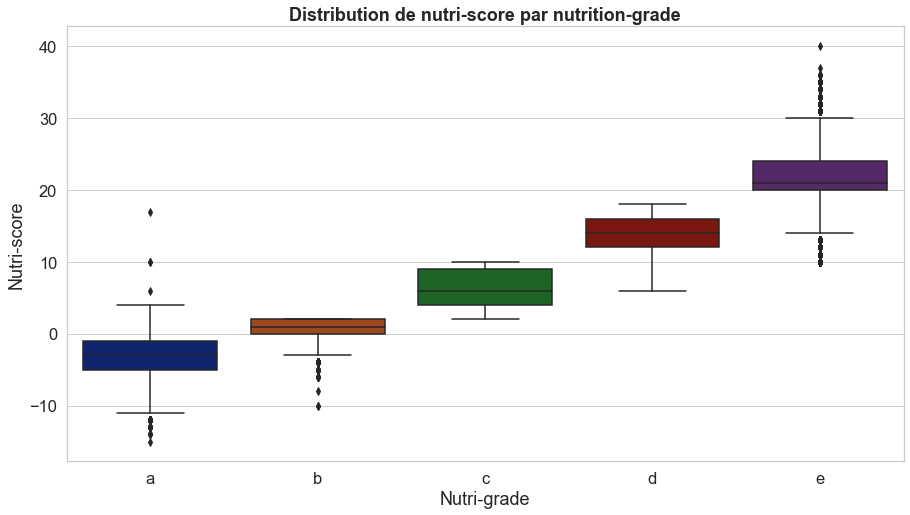

In [51]:
#L'eau pétillante et le sel notamment apportent 0kJ d'énergie, 0 comme valeur min semble donc cohérent
#Je regarde les colonnes nutrition_grade_fr et nutrition-score-fr_100g pour voir si elles sont cohérentes également
sns.set_theme(style='whitegrid', palette='dark', font_scale=1.5)

plt.figure(figsize=(15,8))
sns.boxplot(data=data_sans_negatifs, x='nutrition_grade_fr', y='nutrition-score-fr_100g', order=['a','b','c','d','e'])
plt.title('Distribution de nutri-score par nutrition-grade', weight='bold')
plt.xlabel('Nutri-grade')
plt.ylabel('Nutri-score')

plt.show()

In [52]:
#On va zoomer sur les colonnes a, b et e
data_sans_negatifs.loc[data_sans_negatifs['nutrition_grade_fr'] == 'a'].sort_values('nutrition-score-fr_100g', ascending=False).head(10)

code                               product_name  \
220306  8002270020025                Sanpellegrino Sanbitter Dry   
152102  3068320055008                                      Evian   
229008  9300624407652  Orange & Mango With Natural Mineral Water   
221563  8024884501400                                 Courmayeur   
196239  4007656063522        Vitrex mit Mango-Maracuja-Geschmack   
172377  3271330062939          Sémillante arômes naturels Citron   
191646  3700123302360                Nestlé Pureza Vital Sem Gás   
188817  3596710336432                             Source St Jean   
145734       20656935                   Pétillante saveur Citron   
152110  3068320107844                           Badoit Framboise   

                                              brands pnns_groups_1  \
220306  Sanpellegrino,Sanbitter,Nestlé,Nestlé Waters     Beverages   
152102                                         Evian     Beverages   
229008                  Deep Spring,Coca-Cola Amatil     Beverages   
221563                                    Courmayeur     Beverages   
196239                                        Vitrex     Beverages   
172377                                        Milles     Beverages   
191646                           Nestlé,Pureza Vital     Beverages   
188817                                        Auchan     Beverages   
145734                                       Soguaro     Beverages   
152110                                        Badoit     Beverages   

                pnns_groups_2 nutrition_grade_fr  energy_100g  fat_100g  \
220306    Sweetened beverages                  a        236.0       0.0   
152102  Non-sugared beverages                  a       2787.0       0.0   
229008    Sweetened beverages                  a        130.0       1.0   
221563  Non-sugared beverages                  a          0.0       0.0   
196239  Non-sugared beverages                  a         49.0       0.0   
172377    Sweetened beverages                  a         36.0       0.0   
191646  Non-sugared beverages                  a          0.0       0.0   
188817  Non-sugared beverages                  a          0.0       NaN   
145734  Non-sugared beverages                  a          1.0       0.0   
152110  Non-sugared beverages                  a          1.0       0.0   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
220306                 0.0                13.5         13.5         0.0   
152102                 0.0                 0.0          0.0         NaN   
229008                 0.0                 7.4          7.3         NaN   
221563                 0.0                 0.0          0.0         0.0   
196239                 0.0                 2.9          2.9         NaN   
172377                 0.0                 2.1          2.0         NaN   
191646                 0.0                 0.0          0.0         0.0   
188817                 0.0                 NaN          0.0         0.0   
145734                 0.0                 0.0          0.0         0.0   
152110                 0.0                 0.0          0.0         NaN   

        proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
220306            0.0        0.0          0.0                       17  
152102            0.0        0.0          0.0                       10  
229008            1.0        0.0          0.0                       10  
221563            0.0        1.5          0.6                        6  
196239            0.0        0.0          0.0                        4  
172377            0.0        0.0          0.0                        4  
191646            0.0        0.8          0.3                        3  
188817            0.0        0.5          0.2                        2  
145734            0.0        0.0          0.0                        1  
152110            0.0        0.0          0.0                        1

In [53]:
data_sans_negatifs.loc[data_sans_negatifs['nutrition_grade_fr'] == 'b'].sort_values('nutrition-score-fr_100g').head(10)

code                          product_name  \
14536   0021130314300                   Safeway apple juice   
14538   0021130316168                       Vegetable juice   
144185       20163112        Lord Nelson Kamille Kräutertee   
194537  3770002316061                           Eau de coco   
223993  8428020267746               Zumo de limón exprimido   
160718  3250390001614                         jus de citron   
211807  7610640000457  Sicilia L'authentique Jus de Citrons   
221651  8031301883384             Pulco cuisine citron vert   
184102  3560070735204                  Spécialité au Citron   
158522  3227441299061           Citrons fraîchement pressés   

                                                   brands pnns_groups_1  \
14536                    Safeway kitchens,  Safeway  Inc.     Beverages   
14538                                    Safeway kitchens     Beverages   
144185                                               Lidl     Beverages   
194537                                             Vaïvaï     Beverages   
223993  Solimón,//Propiedad de://,Derivados Cítricos S.A.     Beverages   
160718                       paquito,Antartic,Intermarché     Beverages   
211807                                                NaN     Beverages   
221651                                           Polenghi     Beverages   
184102                                          Carrefour     Beverages   
158522                                            Sicilia     Beverages   

                pnns_groups_2 nutrition_grade_fr  energy_100g  fat_100g  \
14536            Fruit juices                  b          NaN       NaN   
14538   Non-sugared beverages                  b          NaN       NaN   
144185  Non-sugared beverages                  b          4.0       0.0   
194537           Fruit juices                  b         70.0       0.2   
223993           Fruit juices                  b         53.6       0.1   
160718           Fruit juices                  b         71.0       0.5   
211807           Fruit juices                  b         53.0       0.1   
221651           Fruit juices                  b         79.0       0.0   
184102           Fruit juices                  b         82.0       0.0   
158522           Fruit juices                  b         53.0       0.1   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
14536                  NaN                 NaN          NaN         NaN   
14538                  NaN                 NaN          NaN         NaN   
144185                 0.0                 0.2          0.1         NaN   
194537                 0.1                 3.0          1.1         NaN   
223993                 0.0                 2.5          2.0         0.1   
160718                 0.1                 1.0          1.0         NaN   
211807                 0.0                 2.5          2.0         NaN   
221651                 0.0                 NaN          1.1         0.0   
184102                 0.0                 1.5          0.9         NaN   
158522                 0.0                 2.5          2.0         NaN   

        proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
14536             NaN        NaN          NaN                      -10  
14538             NaN        NaN          NaN                      -10  
144185            0.0        0.0          0.0                       -8  
194537            0.7        0.1          0.0                       -6  
223993            0.4        0.0          0.0                       -6  
160718            0.5        0.0          0.0                       -6  
211807            0.4        0.0          0.0                       -6  
221651            0.2        0.0          0.0                       -6  
184102            0.5        0.0          0.0                       -6  
158522            0.4        0.0          0.0                       -6

In [54]:
data_sans_negatifs.loc[data_sans_negatifs['nutrition_grade_fr'] == 'e'].sort_values('nutrition-score-fr_100g').head(10)

code                                       product_name  \
186129  3564700452417                                         Lemon Lime   
228119  8850044021514  Boisson aux graines de basilic Cocktail de fruits   
209113  5999886049010                     Aloe Vera Juice Drink Original   
215061  7613269223313                              Smoothie Kiwi-bananes   
189678  3596710404483                                 Pur jus de raisin    
225063  8480017006684                                             Tónica   
189683  3596710404803                    Cerise Banane à l'eau de source   
207929  5449000027382                             Nestea sparkling lemon   
189700  3596710405879                  Eau de source aromatisée Exotique   
127526  0845163008407                              Vivaloé Honeydew Aloe   

                                                   brands pnns_groups_1  \
186129                               Jean's,Marque Repère     Beverages   
228119                                                PSP     Beverages   
209113                                             Houssy     Beverages   
215061                                         Migros bio     Beverages   
189678                                        Auchan,Mmm!     Beverages   
225063  Dia,//Propiedad de://,Dia - Distribuidora Inte...     Beverages   
189683                                             Auchan     Beverages   
207929                                             Nestea     Beverages   
189700                                             Auchan     Beverages   
127526                                            Vivaloé     Beverages   

                           pnns_groups_2 nutrition_grade_fr  energy_100g  \
186129               Sweetened beverages                  e        140.0   
228119               Sweetened beverages                  e         33.0   
209113               Sweetened beverages                  e        146.0   
215061                      Fruit juices                  e        296.0   
189678                      Fruit juices                  e        286.0   
225063               Sweetened beverages                  e        130.0   
189683             Non-sugared beverages                  e        138.0   
207929               Sweetened beverages                  e        128.0   
189700               Sweetened beverages                  e        121.0   
127526  Artificially sweetened beverages                  e        122.0   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
186129       0.0                 0.0                 8.0          7.5   
228119       0.1                 0.0                12.4         11.5   
209113       0.0                 0.0                 8.8          8.8   
215061       0.5                 0.0                16.0         14.0   
189678       0.0                 0.0                16.8         14.6   
225063       0.0                 0.0                 7.3          6.5   
189683       0.5                 0.0                 7.8          7.0   
207929       0.0                 0.0                 7.2          7.2   
189700       0.1                 0.0                 6.8          6.1   
127526       0.0                 0.0                 7.5          6.7   

        fiber_100g  proteins_100g  salt_100g  sodium_100g  \
186129         0.0            0.0        0.0          0.0   
228119         NaN            0.0        0.0          0.0   
209113         1.0            0.0        0.0          0.0   
215061         0.6            0.6        0.0          0.0   
189678         0.0            0.0        0.0          0.0   
225063         NaN            0.0        0.0          0.0   
189683         NaN            0.5        0.0          0.0   
207929         0.0            0.0        0.0          0.0   
189700         NaN            0.1        0.0          0.0   
127526         0.0            0.0        0.0          0.0   

        nutrition-score-fr_100g  
186129 

In [55]:
#On va supprimer les outliers hauts quand nutritrion_grade_fr vaut a
#On passe les outliers bas de b en a
#On passe les outliers bas de e en d
#Pour cela on définit notre détection d'outliers grace à l'espace interquartile (IQR)
def detection_outliers(data, colonnne):
    Q1 = data[colonnne].quantile(0.25)
    Q3 = data[colonnne].quantile(0.75)
    IQR = Q3 - Q1

    moustache_basse = Q1 - 1.5 * IQR
    moustache_haute = Q3 + 1.5 * IQR

    outliers_bas = data[(data[colonnne] < moustache_basse)]
    outliers_hauts = data[(data[colonnne] > moustache_haute)]

    return outliers_bas, outliers_hauts

In [56]:
#On applique sur les valeurs a, b et e
outliers_a_bas, outliers_a_haut = detection_outliers(data_sans_negatifs[data_sans_negatifs['nutrition_grade_fr'] == 'a'], 'nutrition-score-fr_100g')
outliers_b_bas, outliers_b_haut = detection_outliers(data_sans_negatifs[data_sans_negatifs['nutrition_grade_fr'] == 'b'], 'nutrition-score-fr_100g')
outliers_e_bas, outliers_e_haut = detection_outliers(data_sans_negatifs[data_sans_negatifs['nutrition_grade_fr'] == 'e'], 'nutrition-score-fr_100g')

#On met à jour dans le dataframe
data_outliers = data_sans_negatifs.copy()
data_outliers.loc[outliers_b_bas.index, 'nutrition_grade_fr'] = 'a'
data_outliers.loc[outliers_e_bas.index, 'nutrition_grade_fr'] = 'd'
data_outliers = data_outliers.drop(outliers_a_haut.index).reset_index(drop=True)
data_outliers

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
229563         989898                                        Test NF App   
229564  9900000000233                                            Amandes   
229565       99111250                                 Thé vert Earl grey   
229566       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
229567   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
229563                   NaN           NaN                    NaN   
229564                Biosic           NaN                    NaN   
229565               Lobodis     Beverages  Non-sugared beverages   
229566          Trader Joe's           NaN                    NaN   
229567         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
229563                NaN        569.0      31.0                 NaN   
229564                  b       2406.0       NaN                 3.7   
229565                  c         21.0       0.2                 0.2   
229566                  b          0.0       0.0                 0.0   
229567                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
229563                12.2          9.6         1.1            2.1        1.1   
229564                 NaN          3.9        12.2           21.2        0.1   
229565                 0.5          0.5         0.2            0.5        0.0   
229566                 0.0          0.0         0.0            0.0        0.0   
229567                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
229563          0.4                     <NA>  
229564          0.0                        0  
229565        

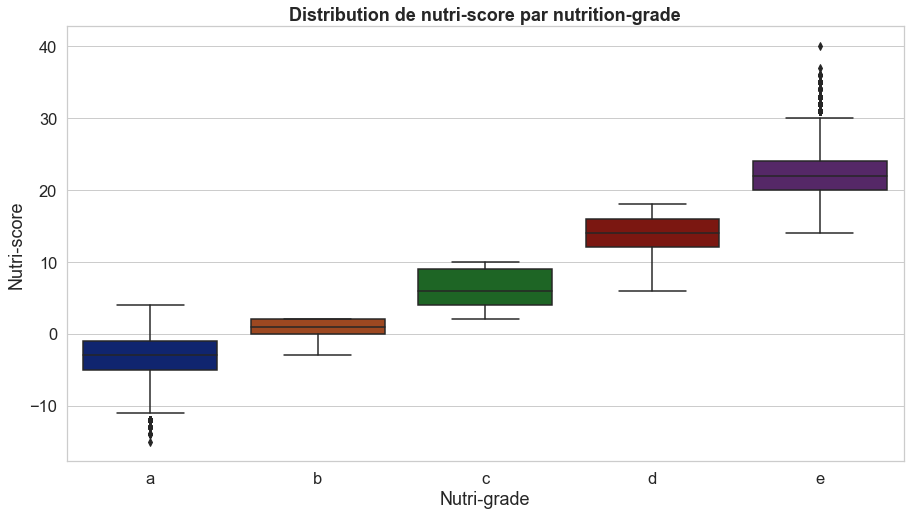

In [57]:
#Pour vérifier
plt.figure(figsize=(15,8))
sns.boxplot(data=data_outliers, x='nutrition_grade_fr', y='nutrition-score-fr_100g', order=['a','b','c','d','e'])
plt.title('Distribution de nutri-score par nutrition-grade', weight='bold')
plt.xlabel('Nutri-grade')
plt.ylabel('Nutri-score')

plt.show()

In [58]:
#Impeccable, on en a fini avec les valeurs aberrantes, une dernière vérification avant de s'attaquer pour de bon aux valeurs manquantes
#On a fait quelque chose de similaire plus tôt, mais là on zoom sur les colonnes numériques
data_outliers.iloc[:,6:].isnull().sum(axis=1).value_counts()

0    149128
1     26483
3     21426
2     21020
4      5654
6      3531
9       900
5       706
7       415
8       305
dtype: int64

In [59]:
#Je ne serais pas choqué de voir 7 valeurs manquantes (sur 10) dans certaines lignes
#Notamment quand une valeur atteint 100 ou presque, il est possible que le reste des colonnes ne soit pas renseigné
valeurs_manquantes2 = data_outliers.loc[data_outliers.iloc[:,6:].isnull().sum(axis=1).isin([8, 9])]
valeurs_manquantes2

code                          product_name  \
342     00041500007007                        Yellow Mustard   
8342     0012000215094              Lemon-lime flavored soda   
8442     0012511464103                        Organic Sugar    
8453     0012511921064            Organic Coconut Palm Sugar   
8980     0013971000214    Simply Cinnamon Cruncy Apple Chips   
...                ...                                   ...   
228942   9300601176762                          Basmati Rice   
228990   9300605113152                               Nescafé   
229173   9310288703847  Char-grilled Sweet Potato Chunky Dip   
229465   9501100460073                         Nectar orange   
229532   9556854007012           King White Coffee 3in1 IPOH   

                     brands         pnns_groups_1          pnns_groups_2  \
342                   Heinz        Fat and sauces   Dressings and sauces   
8342            Sierra mist             Beverages    Sweetened beverages   
8442    Wholesome Sweetners               Unknown                Unknown   
8453              Wholesome         Sugary snacks                 Sweets   
8980                   bare               Unknown                Unknown   
...                     ...                   ...                    ...   
228942                Coles  Cereals and potatoes                Cereals   
228990               Nestlé             Beverages  Non-sugared beverages   
229173        Wattle Valley        Fat and sauces   Dressings and sauces   
229465              Présséa             Beverages          Fruit nectars   
229532             CHEK HUP               Unknown                Unknown   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
342                     b          NaN       NaN                 NaN   
8342                    b          NaN       NaN                 NaN   
8442                    b          NaN       NaN                 NaN   
8453                    b          NaN       NaN                 NaN   
8980                    b          NaN       NaN                 NaN   
...                   ...          ...       ...                 ...   
228942                NaN        578.0       NaN                 NaN   
228990                NaN         10.0       NaN                 NaN   
229173                  b          NaN       NaN                 NaN   
229465                NaN        220.0       NaN                 NaN   
229532                  b          NaN       NaN                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
342                    NaN          NaN         NaN            NaN        NaN   
8342                   NaN          NaN         NaN            NaN        NaN   
8442                   NaN          NaN         NaN            NaN        NaN   
8453                   NaN          NaN         NaN            NaN        NaN   
8980                   NaN          NaN         NaN            NaN        NaN   
...                    ...          ...         ...            ...        ...   
228942                 NaN          NaN         NaN            NaN        NaN   
228990                 NaN          NaN         NaN            NaN        NaN   
229173                 NaN          NaN         NaN            NaN        NaN   
229465                 NaN          NaN         NaN            NaN        NaN   
229532                 NaN          NaN         NaN            NaN        NaN   

        sodium_100g  nutrition-score-fr_100g  
342             NaN                        0  
8342            NaN                        0  
8442            NaN                        0  
8453            NaN                        0  
8980            NaN                        0  
...             ...                      ...  
228942          NaN                     <NA>  
228990          NaN                     <NA>  
229173          NaN                        0  
229465          NaN         

In [60]:
#On retire les lignes avec 8 ou 9 valeurs manquantes, l'imputation sur celles-ci serait trop hasardeuse
data_sans_outliers = data_outliers.drop(valeurs_manquantes2.index).reset_index(drop=True)
data_sans_outliers

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
228358                   NaN           NaN                    NaN   
228359                Biosic           NaN                    NaN   
228360               Lobodis     Beverages  Non-sugared beverages   
228361          Trader Joe's           NaN                    NaN   
228362         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0       1.4                 NaN   
1                     NaN       1490.0       NaN                 NaN   
2                     NaN       3586.0     100.0                 7.1   
3                     NaN       1393.0       1.0                 NaN   
4                     NaN       1540.0       1.8                 NaN   
...                   ...          ...       ...                 ...   
228358                NaN        569.0      31.0                 NaN   
228359                  b       2406.0       NaN                 3.7   
228360                  c         21.0       0.2                 0.2   
228361                  b          0.0       0.0                 0.0   
228362                NaN       2092.0       0.0                 NaN   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1          NaN         5.7            8.6        NaN   
1                     80.0          NaN         NaN            8.9        NaN   
2                      NaN          NaN         NaN            NaN        NaN   
3                     62.5          NaN        12.5           22.9        NaN   
4                     73.7          NaN         1.8           14.0        NaN   
...                    ...          ...         ...            ...        ...   
228358                12.2          9.6         1.1            2.1        1.1   
228359                 NaN          3.9        12.2           21.2        0.1   
228360                 0.5          0.5         0.2            0.5        0.0   
228361                 0.0          0.0         0.0            0.0        0.0   
228362                 0.0          0.0         NaN            0.0        0.0   

        sodium_100g  nutrition-score-fr_100g  
0               NaN                     <NA>  
1               NaN                     <NA>  
2               NaN                     <NA>  
3               NaN                     <NA>  
4               NaN                     <NA>  
...             ...                      ...  
228358          0.4                     <NA>  
228359          0.0                        0  
228360        

## 4) Valeurs manquantes <a class="anchor" id="ii4"></a>
On va tenter de combler les valeurs manquantes numériques en utilisant kNNImputer.

In [61]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.impute import KNNImputer

#On se focalise sur nos colonnes numériques
colonnes_num = data_sans_outliers.iloc[:, 6:].columns

#Imputation des valeurs manquantes pour les colonnes numériques
#Input: Dataframe, Colonnes concernées, Imputer
#Output : Colonnes concernées et données imputées
def impute_data(data, colonnes, kNN):
    X = data[colonnes]
    display(X)
    variables = X.columns
    X_scaled = kNN.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled)
    X_scaled.columns = variables
    display(X_scaled)
    data = X_scaled
    return data

#Remplacement dans le dataframe original des valeurs manquantes par les valeurs imputées
#Input: Dataframe, Données imputées, Colonnes concernées
def replace_imputed(df, df_imputed, col):
    for i in df[col]:
        df[i] = df[i].fillna(df_imputed[i])

In [64]:
#La valeur par défaut de k est 5
kNN = KNNImputer()
data_imputed = impute_data(data_sans_outliers, colonnes_num, kNN)

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0            1552.0       1.4                 NaN                77.1   
1            1490.0       NaN                 NaN                80.0   
2            3586.0     100.0                 7.1                 NaN   
3            1393.0       1.0                 NaN                62.5   
4            1540.0       1.8                 NaN                73.7   
...             ...       ...                 ...                 ...   
228358        569.0      31.0                 NaN                12.2   
228359       2406.0       NaN                 3.7                 NaN   
228360         21.0       0.2                 0.2                 0.5   
228361          0.0       0.0                 0.0                 0.0   
228362       2092.0       0.0                 NaN                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0               NaN         5.7            8.6        NaN          NaN   
1               NaN         NaN            8.9        NaN          NaN   
2               NaN         NaN            NaN        NaN          NaN   
3               NaN        12.5           22.9        NaN          NaN   
4               NaN         1.8           14.0        NaN          NaN   
...             ...         ...            ...        ...          ...   
228358          9.6         1.1            2.1        1.1          0.4   
228359          3.9        12.2           21.2        0.1          0.0   
228360          0.5         0.2            0.5        0.0          0.0   
228361          0.0         0.0            0.0        0.0          0.0   
228362          0.0         NaN            0.0        0.0          0.0   

        nutrition-score-fr_100g  
0                          <NA>  
1                          <NA>  
2                          <NA>  
3                          <NA>  
4                          <NA>  
...                         ...  
228358                     <NA>  
228359                        0  
228360                        2  
228361                        0  
228362                     <NA>  

[228363 rows x 10 columns]

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0            1552.0      1.40                0.12                77.1   
1            1490.0      1.96                0.00                80.0   
2            3586.0    100.00                7.10                 0.0   
3            1393.0      1.00                4.78                62.5   
4            1540.0      1.80                0.00                73.7   
...             ...       ...                 ...                 ...   
228358        569.0     31.00                2.70                12.2   
228359       2406.0      9.88                3.70                21.7   
228360         21.0      0.20                0.20                 0.5   
228361          0.0      0.00                0.00                 0.0   
228362       2092.0      0.00                0.00                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0              4.60        5.70            8.6       0.52         0.20   
1              0.00        2.66            8.9       0.36         0.00   
2              0.00        0.00            0.0       0.00         0.00   
3              1.28       12.50           22.9       0.68         0.26   
4              1.80        1.80           14.0       0.00         0.00   
...             ...         ...            ...        ...          ...   
228358         9.60        1.10            2.1       1.10         0.40   
228359         3.90       12.20           21.2       0.10         0.00   
228360         0.50        0.20            0.5       0.00         0.00   
228361         0.00        0.00            0.0       0.00         0.00   
228362         0.00        0.00            0.0       0.00         0.00   

        nutrition-score-fr_100g  
0                          -1.8  
1                          -0.4  
2                          17.0  
3                          -3.0  
4                          -3.0  
...                         ...  
228358                      4.4  
228359                      0.0  
228360                      2.0  
228361                      0.0  
228362                      6.0  

[228363 rows x 10 columns]

In [65]:
#La colonne nutrition-score-fr_100g a été transformée en float, alors on arrondit et change le type (cette fois int fonctionne car pas de NaN)
data_imputed['nutrition-score-fr_100g'] = data_imputed['nutrition-score-fr_100g'].round(0).astype('int')
data_imputed

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0            1552.0      1.40                0.12                77.1   
1            1490.0      1.96                0.00                80.0   
2            3586.0    100.00                7.10                 0.0   
3            1393.0      1.00                4.78                62.5   
4            1540.0      1.80                0.00                73.7   
...             ...       ...                 ...                 ...   
228358        569.0     31.00                2.70                12.2   
228359       2406.0      9.88                3.70                21.7   
228360         21.0      0.20                0.20                 0.5   
228361          0.0      0.00                0.00                 0.0   
228362       2092.0      0.00                0.00                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0              4.60        5.70            8.6       0.52         0.20   
1              0.00        2.66            8.9       0.36         0.00   
2              0.00        0.00            0.0       0.00         0.00   
3              1.28       12.50           22.9       0.68         0.26   
4              1.80        1.80           14.0       0.00         0.00   
...             ...         ...            ...        ...          ...   
228358         9.60        1.10            2.1       1.10         0.40   
228359         3.90       12.20           21.2       0.10         0.00   
228360         0.50        0.20            0.5       0.00         0.00   
228361         0.00        0.00            0.0       0.00         0.00   
228362         0.00        0.00            0.0       0.00         0.00   

        nutrition-score-fr_100g  
0                            -2  
1                             0  
2                            17  
3                            -3  
4                            -3  
...                         ...  
228358                        4  
228359                        0  
228360                        2  
228361                        0  
228362                        6  

[228363 rows x 10 columns]

In [66]:
#On remplace nos valeurs manquantes par les données imputées
data_sans_na_num = data_sans_outliers.copy()
replace_imputed(data_sans_na_num, data_imputed, colonnes_num)
data_sans_na_num

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
228358                   NaN           NaN                    NaN   
228359                Biosic           NaN                    NaN   
228360               Lobodis     Beverages  Non-sugared beverages   
228361          Trader Joe's           NaN                    NaN   
228362         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                     NaN       1552.0      1.40                0.12   
1                     NaN       1490.0      1.96                0.00   
2                     NaN       3586.0    100.00                7.10   
3                     NaN       1393.0      1.00                4.78   
4                     NaN       1540.0      1.80                0.00   
...                   ...          ...       ...                 ...   
228358                NaN        569.0     31.00                2.70   
228359                  b       2406.0      9.88                3.70   
228360                  c         21.0      0.20                0.20   
228361                  b          0.0      0.00                0.00   
228362                NaN       2092.0      0.00                0.00   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1         4.60        5.70            8.6       0.52   
1                     80.0         0.00        2.66            8.9       0.36   
2                      0.0         0.00        0.00            0.0       0.00   
3                     62.5         1.28       12.50           22.9       0.68   
4                     73.7         1.80        1.80           14.0       0.00   
...                    ...          ...         ...            ...        ...   
228358                12.2         9.60        1.10            2.1       1.10   
228359                21.7         3.90       12.20           21.2       0.10   
228360                 0.5         0.50        0.20            0.5       0.00   
228361                 0.0         0.00        0.00            0.0       0.00   
228362                 0.0         0.00        0.00            0.0       0.00   

        sodium_100g  nutrition-score-fr_100g  
0              0.20                       -2  
1              0.00                        0  
2              0.00                       17  
3              0.26                       -3  
4              0.00                       -3  
...             ...                      ...  
228358         0.40                        4  
228359         0.00                        0  
228360        

Restent les catégories de produit et nutrition_grade. Pour nutrition_grade, je me sers de cette correspondance avec le nutri-score trouvée en ligne : A correspond à une valeur comprise entre –15 et –2, B de –1 à +3, C de +4 à +11, D de +12 à +16 et E de +17 à +40. Ce qui semble cohérent avec les boxplots que nous avons réalisés plus tôt. Il y a des exceptions (ex : eau, sodas, etc.), donc nous n'appliquons cela qu'aux valeurs manquantes, pas à l'ensemble de nos données pour "replacer" les produits qui ne tombent pas dans cette classification.

In [67]:
#Fonction qui porte bien son nom
def combler_valeurs_manquantes(ligne):
    if pd.isna(ligne['nutrition_grade_fr']):
        score = ligne['nutrition-score-fr_100g']
        if -15 <= score <= -2:
            return 'a'
        elif -1 <= score <= 3:
            return 'b'
        elif 4 <= score <= 11:
            return 'c'
        elif 12 <= score <= 16:
            return 'd'
        elif 17 <= score <= 40:
            return 'e'
    else:
        return ligne['nutrition_grade_fr']

#On applique
data_sans_na_grade = data_sans_na_num.copy()
data_sans_na_grade['nutrition_grade_fr'] = data_sans_na_grade.apply(combler_valeurs_manquantes, axis=1)
data_sans_na_grade

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
228358                   NaN           NaN                    NaN   
228359                Biosic           NaN                    NaN   
228360               Lobodis     Beverages  Non-sugared beverages   
228361          Trader Joe's           NaN                    NaN   
228362         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                       a       1552.0      1.40                0.12   
1                       b       1490.0      1.96                0.00   
2                       e       3586.0    100.00                7.10   
3                       a       1393.0      1.00                4.78   
4                       a       1540.0      1.80                0.00   
...                   ...          ...       ...                 ...   
228358                  c        569.0     31.00                2.70   
228359                  b       2406.0      9.88                3.70   
228360                  c         21.0      0.20                0.20   
228361                  b          0.0      0.00                0.00   
228362                  c       2092.0      0.00                0.00   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1         4.60        5.70            8.6       0.52   
1                     80.0         0.00        2.66            8.9       0.36   
2                      0.0         0.00        0.00            0.0       0.00   
3                     62.5         1.28       12.50           22.9       0.68   
4                     73.7         1.80        1.80           14.0       0.00   
...                    ...          ...         ...            ...        ...   
228358                12.2         9.60        1.10            2.1       1.10   
228359                21.7         3.90       12.20           21.2       0.10   
228360                 0.5         0.50        0.20            0.5       0.00   
228361                 0.0         0.00        0.00            0.0       0.00   
228362                 0.0         0.00        0.00            0.0       0.00   

        sodium_100g  nutrition-score-fr_100g  
0              0.20                       -2  
1              0.00                        0  
2              0.00                       17  
3              0.26                       -3  
4              0.00                       -3  
...             ...                      ...  
228358         0.40                        4  
228359         0.00                        0  
228360        

In [68]:
#Les catégories de produit présentent énormément de valeurs manquantes
#Avant d'imputer, nous allons entraîner et tester un modèle sur chaque colonne afin de ne conserver que la plus "performante"
#On commence par remplacer la catégorie "Unknown" par des NaN, afin de les inclure dans l'imputation
data_categ = data_sans_na_grade.copy()
data_categ[['pnns_groups_1', 'pnns_groups_2']] = data_categ[['pnns_groups_1', 'pnns_groups_2']].replace('Unknown', np.nan, inplace=False)
data_categ

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1          pnns_groups_2  \
0             Bob's Red Mill           NaN                    NaN   
1                   Lundberg           NaN                    NaN   
2       Napa Valley Naturals           NaN                    NaN   
3                       Unfi           NaN                    NaN   
4                 Gardentime           NaN                    NaN   
...                      ...           ...                    ...   
228358                   NaN           NaN                    NaN   
228359                Biosic           NaN                    NaN   
228360               Lobodis     Beverages  Non-sugared beverages   
228361          Trader Joe's           NaN                    NaN   
228362         Market Pantry           NaN                    NaN   

       nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                       a       1552.0      1.40                0.12   
1                       b       1490.0      1.96                0.00   
2                       e       3586.0    100.00                7.10   
3                       a       1393.0      1.00                4.78   
4                       a       1540.0      1.80                0.00   
...                   ...          ...       ...                 ...   
228358                  c        569.0     31.00                2.70   
228359                  b       2406.0      9.88                3.70   
228360                  c         21.0      0.20                0.20   
228361                  b          0.0      0.00                0.00   
228362                  c       2092.0      0.00                0.00   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                     77.1         4.60        5.70            8.6       0.52   
1                     80.0         0.00        2.66            8.9       0.36   
2                      0.0         0.00        0.00            0.0       0.00   
3                     62.5         1.28       12.50           22.9       0.68   
4                     73.7         1.80        1.80           14.0       0.00   
...                    ...          ...         ...            ...        ...   
228358                12.2         9.60        1.10            2.1       1.10   
228359                21.7         3.90       12.20           21.2       0.10   
228360                 0.5         0.50        0.20            0.5       0.00   
228361                 0.0         0.00        0.00            0.0       0.00   
228362                 0.0         0.00        0.00            0.0       0.00   

        sodium_100g  nutrition-score-fr_100g  
0              0.20                       -2  
1              0.00                        0  
2              0.00                       17  
3              0.26                       -3  
4              0.00                       -3  
...             ...                      ...  
228358         0.40                        4  
228359         0.00                        0  
228360        

In [69]:
#On va essayer random forest cette fois
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#On va encoder nos variables de type catégorielle
le = LabelEncoder()

#Suppression des lignes contenant des valeurs manquantes dans la colonne cible
#Encodage des catégories d'aliments
#Séparation des données en jeu de test et d'entraînement
#Entraînement du modèle et affichage du score de précision
#Input : Dataframe, Colonne cible
#Output : Modèle de machine learning
def test_model(df, colonne_cible):
    df_drop_na = df.dropna(subset=[colonne_cible])
    X = df_drop_na[colonnes_num] #Les colonnes n'ont pas changé depuis la dernière fois
    y = df_drop_na[colonne_cible]
    y_encoded = le.fit_transform(y)

    #Jeu de test et jeu d'entraînement
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y) #Pour que les classes soient équitablement réparties

    #Création et entraînement du modèle 
    model = RandomForestClassifier(n_estimators=200) #Par défaut n=100, mais comme le calcul était rapide, j'ai augmenté à 200 en espérant gagner en précision
    model.fit(X_train, y_train)
    R2 = model.score(X_test, y_test).round(2) #Renvoie le coefficient de détermination (compris entre 0 et 1, plus il est élevé meilleur c'est)
    
    print(f"R2 = {R2} pour {colonne_cible}")
    return model

In [70]:
model1 = test_model(data_categ, 'pnns_groups_1')
model2 = test_model(data_categ, 'pnns_groups_2')

R2 = 0.91 pour pnns_groups_1
R2 = 0.82 pour pnns_groups_2


In [71]:
#Le modèle est plus performant sur pnns_groups_1, nous allons donc conserver cette colonne et prédire les données manquantes avec le modèle entraîné
data_categ.drop('pnns_groups_2', axis=1, inplace=True)
data_categ

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands pnns_groups_1 nutrition_grade_fr  energy_100g  \
0             Bob's Red Mill           NaN                  a       1552.0   
1                   Lundberg           NaN                  b       1490.0   
2       Napa Valley Naturals           NaN                  e       3586.0   
3                       Unfi           NaN                  a       1393.0   
4                 Gardentime           NaN                  a       1540.0   
...                      ...           ...                ...          ...   
228358                   NaN           NaN                  c        569.0   
228359                Biosic           NaN                  b       2406.0   
228360               Lobodis     Beverages                  c         21.0   
228361          Trader Joe's           NaN                  b          0.0   
228362         Market Pantry           NaN                  c       2092.0   

        fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0           1.40                0.12                77.1         4.60   
1           1.96                0.00                80.0         0.00   
2         100.00                7.10                 0.0         0.00   
3           1.00                4.78                62.5         1.28   
4           1.80                0.00                73.7         1.80   
...          ...                 ...                 ...          ...   
228358     31.00                2.70                12.2         9.60   
228359      9.88                3.70                21.7         3.90   
228360      0.20                0.20                 0.5         0.50   
228361      0.00                0.00                 0.0         0.00   
228362      0.00                0.00                 0.0         0.00   

        fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0             5.70            8.6       0.52         0.20   
1             2.66            8.9       0.36         0.00   
2             0.00            0.0       0.00         0.00   
3            12.50           22.9       0.68         0.26   
4             1.80           14.0       0.00         0.00   
...            ...            ...        ...          ...   
228358        1.10            2.1       1.10         0.40   
228359       12.20           21.2       0.10         0.00   
228360        0.20            0.5       0.00         0.00   
228361        0.00            0.0       0.00         0.00   
228362        0.00            0.0       0.00         0.00   

        nutrition-score-fr_100g  
0                            -2  
1                             0  
2                            17  
3                            -3  
4                            -3  
...                         ...  
228358                        4  
228359                        0  
228360                        2  
228361                        0  
228362                        6  

[228363 rows x 15 columns]

In [72]:
#Prédiction des données de la colonne pnns_groups_1
#Décodage de la variable concernée
#Remplacement des valeurs manquantes par les prédictions du modèle
#Input : Dataframe
#Output : Dataframe
def final_model(df):
    X = df[colonnes_num]
    y_pred = model1.predict(X)

    #Création d'un masque de booléens des valeurs manquantes
    mask = df['pnns_groups_1'].isnull()

    #Décodage de notre variable pour récupérer les différentes valeurs possibles
    y_pred_labels = le.inverse_transform(y_pred)

    #Remplacement des valeurs manquantes par les valeurs prédites
    for i, row in df[mask].iterrows():
        df.at[i, 'pnns_groups_1'] = y_pred_labels[i] #Similaire à .loc, mais .at ne sélectionne qu'une valeur
    return df

In [73]:
#Petit bémol, notre dernier labelEncoder est sur pnns_groups_2
le.fit_transform(data_categ['pnns_groups_1'])

array([9, 9, 9, ..., 0, 9, 9])

In [74]:
data_final = final_model(data_categ)
data_final

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands         pnns_groups_1 nutrition_grade_fr  \
0             Bob's Red Mill  Cereals and potatoes                  a   
1                   Lundberg  Cereals and potatoes                  b   
2       Napa Valley Naturals        Fat and sauces                  e   
3                       Unfi  Cereals and potatoes                  a   
4                 Gardentime  Cereals and potatoes                  a   
...                      ...                   ...                ...   
228358                   NaN        Fat and sauces                  c   
228359                Biosic          Salty snacks                  b   
228360               Lobodis             Beverages                  c   
228361          Trader Joe's             Beverages                  b   
228362         Market Pantry         Sugary snacks                  c   

        energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0            1552.0      1.40                0.12                77.1   
1            1490.0      1.96                0.00                80.0   
2            3586.0    100.00                7.10                 0.0   
3            1393.0      1.00                4.78                62.5   
4            1540.0      1.80                0.00                73.7   
...             ...       ...                 ...                 ...   
228358        569.0     31.00                2.70                12.2   
228359       2406.0      9.88                3.70                21.7   
228360         21.0      0.20                0.20                 0.5   
228361          0.0      0.00                0.00                 0.0   
228362       2092.0      0.00                0.00                 0.0   

        sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0              4.60        5.70            8.6       0.52         0.20   
1              0.00        2.66            8.9       0.36         0.00   
2              0.00        0.00            0.0       0.00         0.00   
3              1.28       12.50           22.9       0.68         0.26   
4              1.80        1.80           14.0       0.00         0.00   
...             ...         ...            ...        ...          ...   
228358         9.60        1.10            2.1       1.10         0.40   
228359         3.90       12.20           21.2       0.10         0.00   
228360         0.50        0.20            0.5       0.00         0.00   
228361         0.00        0.00            0.0       0.00         0.00   
228362         0.00        0.00            0.0       0.00         0.00   

        nutrition-score-fr_100g  
0                            -2  
1                             0  
2                            17  
3                            -3  
4                            -3  
...                         ...  
228358                        4  
228359                        0  
228360                        2  
228361                        0  
228362                        6  

[228363 rows x 15 columns]

In [75]:
#Juste pour être sûr qu'il n'y a pas eu d'erreur avec l'encodeur
data_final['pnns_groups_1'].unique()

array(['Cereals and potatoes', 'Fat and sauces', 'Salty snacks',
       'Sugary snacks', 'Fruits and vegetables', 'Composite foods',
       'Fish meat eggs', 'Beverages', 'Milk and dairy products'],
      dtype=object)

In [76]:
#On vérifie les valeurs manquantes
data_final.isnull().sum()

code                          0
product_name                  0
brands                     2903
pnns_groups_1                 0
nutrition_grade_fr            0
energy_100g                   0
fat_100g                      0
saturated-fat_100g            0
carbohydrates_100g            0
sugars_100g                   0
fiber_100g                    0
proteins_100g                 0
salt_100g                     0
sodium_100g                   0
nutrition-score-fr_100g       0
dtype: int64

Les marques se sont montrées utiles dans la recherche de doublons, mais ne serviront pas pour l'analyse, donc on peut se permettre d'avoir des valeurs manquantes dans cette variable.

On en a enfin fini avec le nettoyage des données, on passe aux analyses.
# III) Analyses <a class="anchor" id="iii"></a>
## 1) Univariées <a class="anchor" id="iii1"></a>
### i) Qualitatives <a class="anchor" id="iii1i"></a>

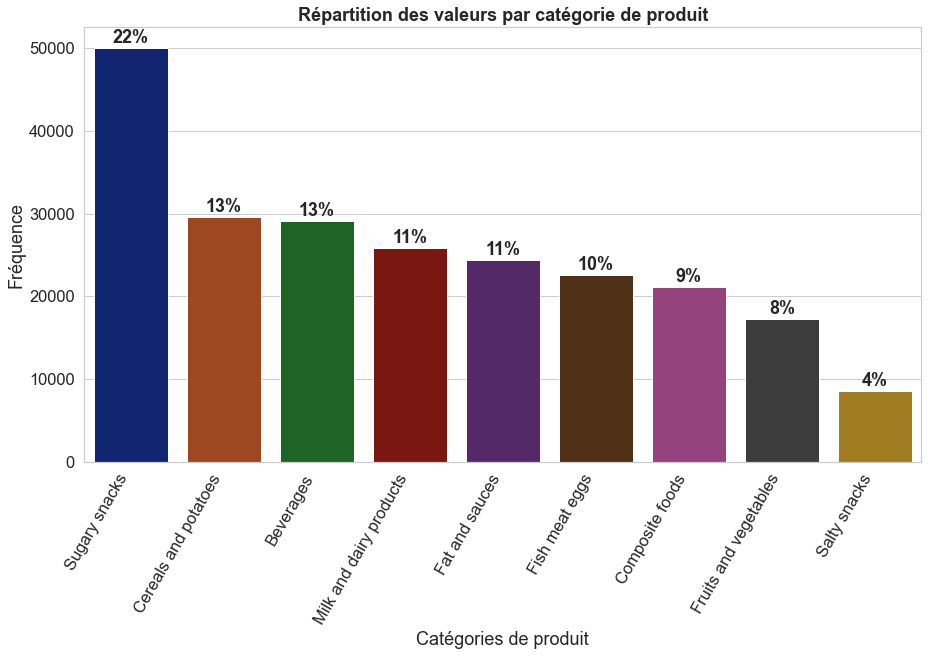

In [77]:
#On commence par la distribution de nos variables qualitatives, à savoir pnns_groups_1 et nutrition_grade_fr
plt.figure(figsize=(15, 8))
g1 = sns.countplot(x='pnns_groups_1', data=data_final, order=data_final['pnns_groups_1'].value_counts().index) #Ordre
plt.title('Répartition des valeurs par catégorie de produit', weight='bold')
plt.xlabel('Catégories de produit')
plt.ylabel('Fréquence')
plt.xticks(rotation=60, ha='right')  #Rotation des étiquettes pour une meilleure lisibilité

#Pour afficher les pourcentages au dessus des barres
for i, p in enumerate(g1.patches):
    pourcentage = round((p.get_height() / len(data_final)) * 100)
    g1.annotate(f'{pourcentage}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.show()

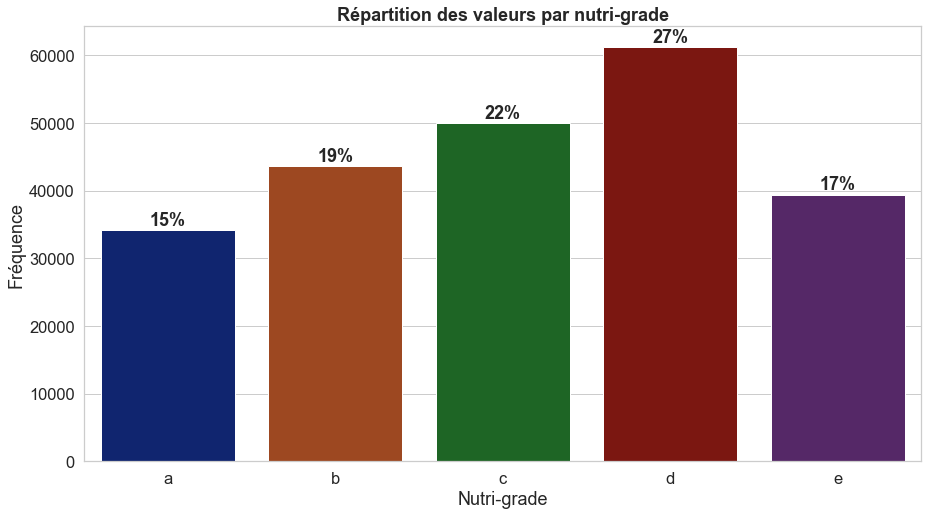

In [78]:
#Il semblerait que les produits sucrés soient sur-représentés dans nos données
#On passe au nutri-grade
plt.figure(figsize=(15, 8))
g2 = sns.countplot(x='nutrition_grade_fr', data=data_final, order=['a','b','c','d','e'])
plt.title('Répartition des valeurs par nutri-grade', weight='bold')
plt.xlabel('Nutri-grade')
plt.ylabel('Fréquence')

#Pour afficher les pourcentages au dessus des barres
for i, p in enumerate(g2.patches):
    pourcentage = round((p.get_height() / len(data_final)) * 100)
    g2.annotate(f'{pourcentage}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.show()

Le grade D est fortement représenté, un lien avec les produits sucrés ? On élucidera le mystère lors des analyses bivariées.

En attendant, on s'intéresse à nos variables quantitatives.
### ii) Quantitatives <a class="anchor" id="iii1ii"></a>

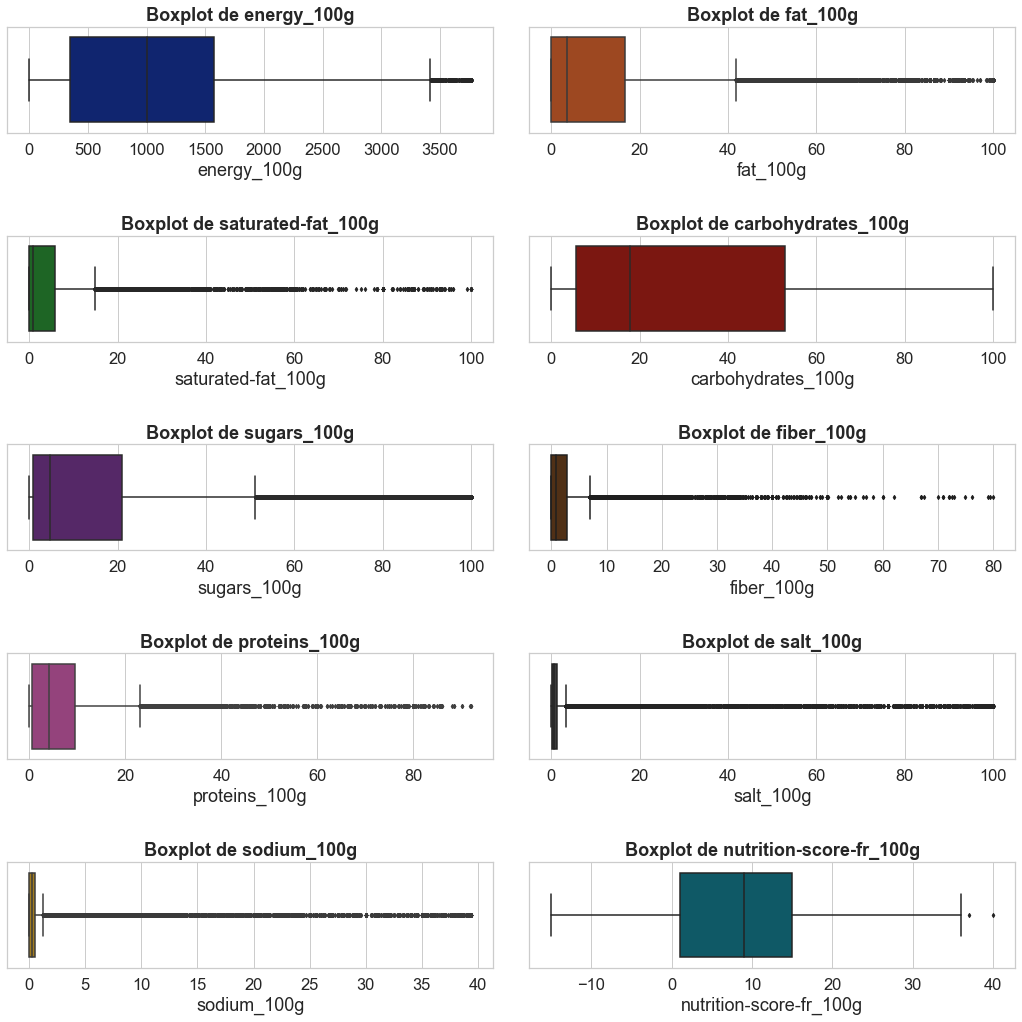

In [79]:
plt.figure(figsize=(15, 15))
couleurs = sns.color_palette("dark", len(colonnes_num))

#Un boxplot par variable
for i, (col, couleur) in enumerate(zip(colonnes_num, couleurs), start=1):
    plt.subplot(5, 2, i)  #Pour avoir 5 lignes et 2 colonnes
    sns.boxplot(x=data_final[col], color=couleur, fliersize=3)
    plt.title(f'Boxplot de {col}', weight='bold')

plt.tight_layout(pad=2.0) #Un peu d'espace entre les lignes
plt.show()

<Figure size 1080x1080 with 0 Axes>

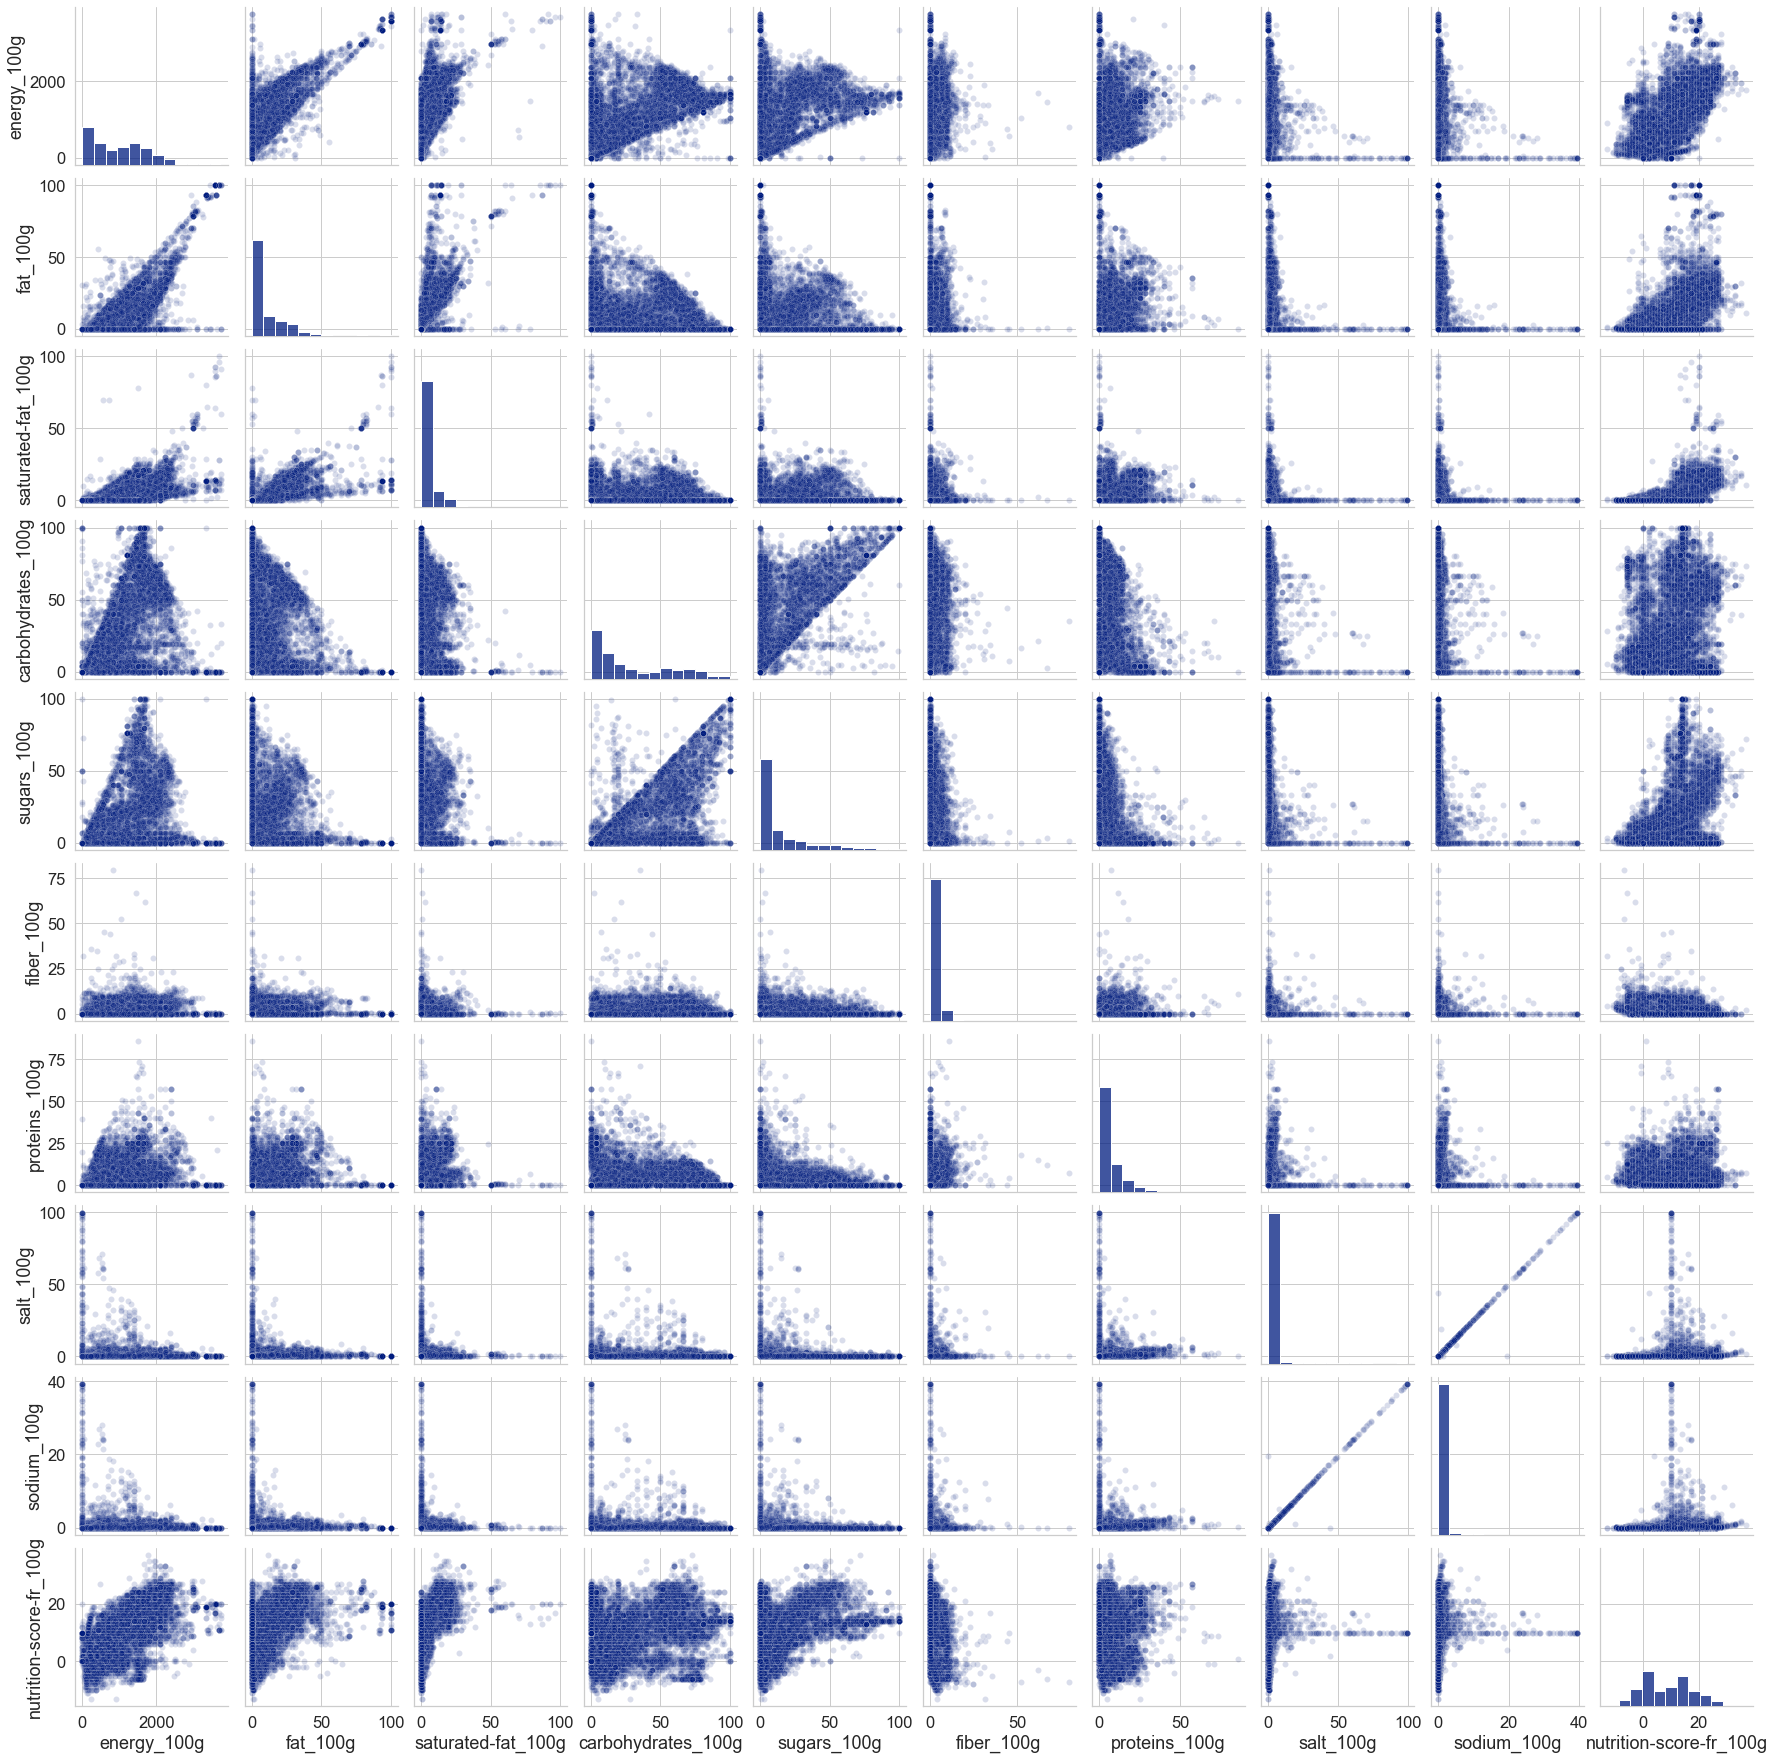

In [80]:
#Enormément d'outliers, on constate également que la plupart de nos médianes se situent autour de 0
#On va regarder la distribution de chaque variable plus en détail
#Et dans le même temps, transitionner vers les analyses bivariées avec un pairplot
plt.figure(figsize=(15, 15))

sns.pairplot(data_final.sample(10000, random_state=0), #Pour accélérer le process sample(10000)  
             diag_kws={'bins':12}, #On limite à 12 bins, certains histogrammes étaient illisibles
             plot_kws={'alpha': 0.15}) #On augmente la transparence des scatterplots pour meilleure lisibilité

plt.show()

Comme le laissaient supposer les boxplots, la majorité des histogrammes a une distribution avec énormément de valeurs proches de 0.

Autrement, on pose les hypothèses suivantes :
- Une corrélation parfaite entre sel et sodium
- Une forte corrélation entre glucides et sucre
- Une forte corrélation entre acides gras saturés et lipides
- L'énergie est plus fortement corrélée avec les lipides, puis avec les glucides
- Le nutri-score est fortement corrélé avec l'énergie et donc par extension, les lipides

Nous allons tester ces hypothèses lors des analyses bivariées.
## 2) Bivariées <a class="anchor" id="iii2"></a>
### i) Qualitatives <a class="anchor" id="iii2i"></a>

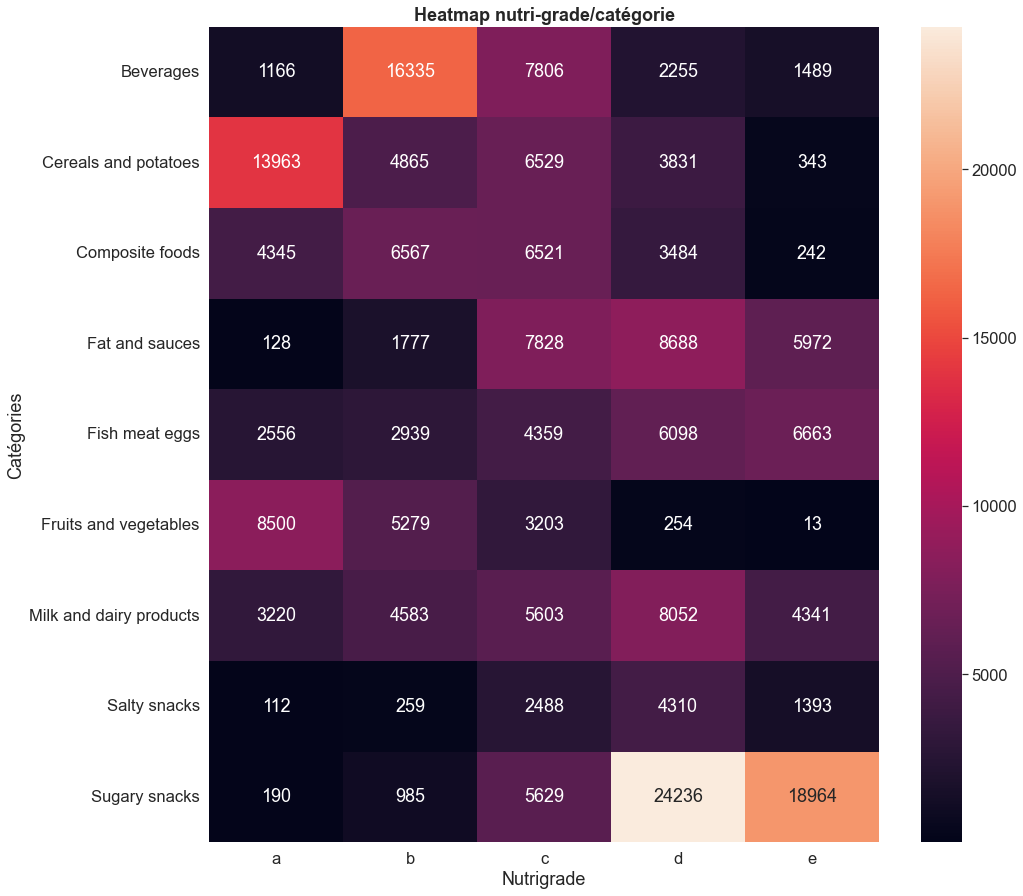

In [81]:
#Comme pour les analyses univariées, on commence par nos variables qualitatives
cont = data_final[['pnns_groups_1', 'nutrition_grade_fr']].pivot_table(index='pnns_groups_1', 
                                                                       columns='nutrition_grade_fr', aggfunc=len)

#Heatmap pour y voir plus clair
plt.figure(figsize=(15, 15))
sns.heatmap(cont, annot=True, fmt='g')
plt.xlabel('Nutrigrade')
plt.ylabel('Catégories')
plt.title("Heatmap nutri-grade/catégorie", weight='bold')
plt.show()

In [82]:
#Au premier regard, il semblerait qu'il y ait corrélation entre catégorie et nutri-grade
#On utilise le test du Chi-2 pour en avoir le coeur net
#Le test du Chi-2 teste l'hypothèse H0 selon laquelle les variables ne sont pas corrélées
import scipy.stats as st
st.chi2_contingency(cont)

(139528.84735706364,
 0.0,
 32,
 array([[ 4348.17890814,  5545.1366421 ,  6356.3811388 ,  7786.52237009,
          5014.78094087],
        [ 4420.02242044,  5636.7570885 ,  6461.4055079 ,  7915.17648656,
          5097.6384966 ],
        [ 3166.9518267 ,  4038.74380263,  4629.60547024,  5671.23427175,
          3652.46462868],
        [ 3650.99749084,  4656.03656021,  5337.20715703,  6538.04138148,
          4210.71741044],
        [ 3384.87714735,  4316.65915669,  4948.17938983,  6061.48509172,
          3903.79921441],
        [ 2581.7265494 ,  3292.41891637,  3774.09446364,  4623.23928132,
          2977.52078927],
        [ 3861.43911229,  4924.40811778,  5644.84103817,  6914.89073099,
          4453.42100078],
        [ 1281.5086507 ,  1634.27971256,  1873.37218376,  2294.86780258,
          1477.9716504 ],
        [ 7484.29789414,  9544.56000315, 10940.91365064, 13402.54258352,
          8631.68586855]]))

Avec une p-value de 0.0 et un chi-2 à 6 chiffres, nous devons réfuter H0 ce qui est conforme à notre première impression.

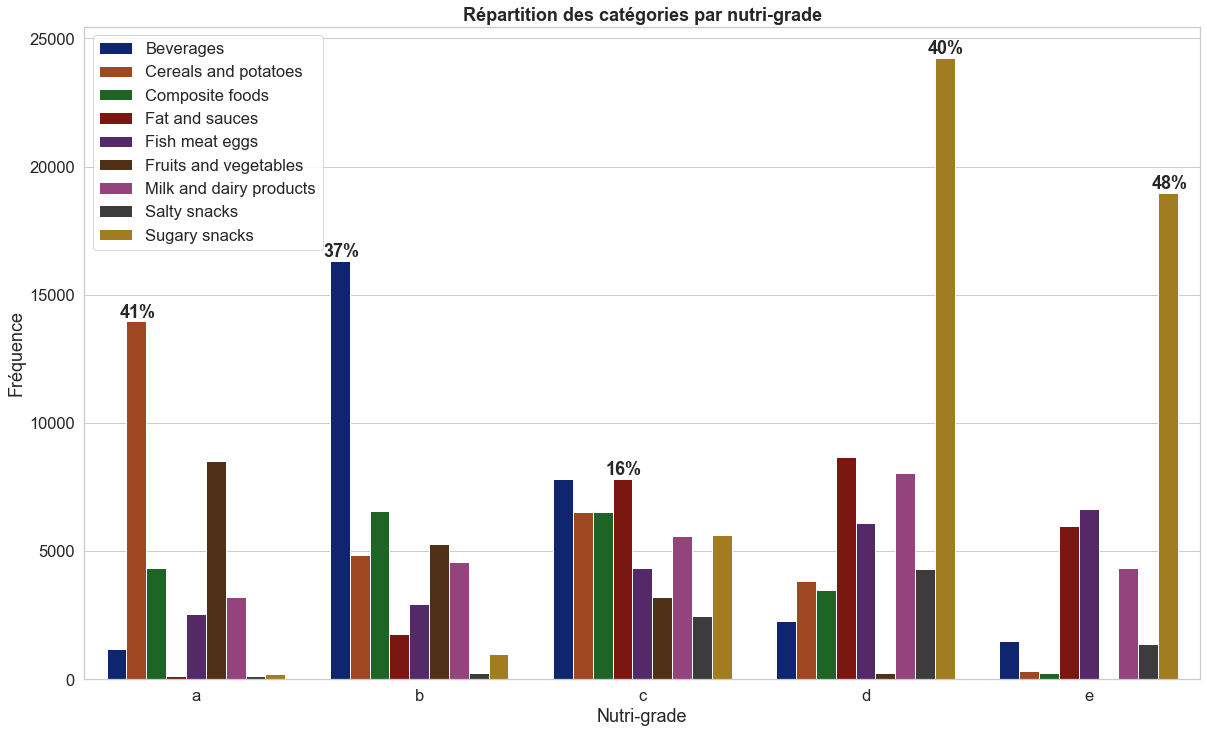

In [83]:
#Pour visualiser la répartition des catégories par nutri-grade
#Pour avoir la légende et les pourcentage dans le même ordre (c'était n'importe quoi sans)
ordre = cont.index.tolist()

plt.figure(figsize=(20, 12))
g3 = sns.countplot(x='nutrition_grade_fr', data=data_final, hue='pnns_groups_1',
                   order=['a','b','c','d','e'], hue_order=ordre)
plt.title('Répartition des catégories par nutri-grade', weight='bold')
plt.xlabel('Nutri-grade')
plt.ylabel('Fréquence')

#Je décide de n'afficher les pourcentages qu'au dessus de la plus haute barre de chaque grade
#ndlr j'ai passé un temps fou là-dessus pour pas grand chose hahaha
#On calcule les pourcentages pour chaque catégorie
pourcentages = cont.transpose().div(cont.transpose().sum(axis=1), axis=0) * 100

#Je n'ai pas réussi à trouver les x automatiquement, donc j'ai cherché les coordonnées manuellement
coordonnees_x = [-0.3111111111111111, 0.5999999999999999, 1.8666666666666665, 3.3111111111111113, 4.311111111111111]   

#On cherche l'indice et la hauteur de la barre la plus haute pour chaque grade
for grade_name in pourcentages.index:
    idx_hauteur_max = pourcentages.loc[grade_name].idxmax()
    hauteur_max = pourcentages.loc[grade_name].max()
    
    #On parcourt chaque groupe de barre
    for idx_group, group_name in enumerate(pourcentages.columns):       
        #Si c'est la barre la plus haute du groupe, on annote
        if group_name == idx_hauteur_max:
            #On recalcule la hauteur de la barre en fonction des données
            #Une autre option aurait été d'attribuer des étiquettes aux barres, mais ce serait plus long
            hauteur_recalculee = data_final.loc[(data_final['nutrition_grade_fr'] == grade_name) & 
                                                 (data_final['pnns_groups_1'] == group_name)].shape[0]
            #On associe le bon x pour chaque grade
            idx_grade = pourcentages.index.get_loc(grade_name)
            x_coord = coordonnees_x[idx_grade]
            
            #On annote enfin
            plt.text(x_coord+0.05, hauteur_recalculee, f'{hauteur_max:.0f}%',
                     ha='center', va='bottom', weight='bold')

plt.legend(loc='upper left')
plt.show()

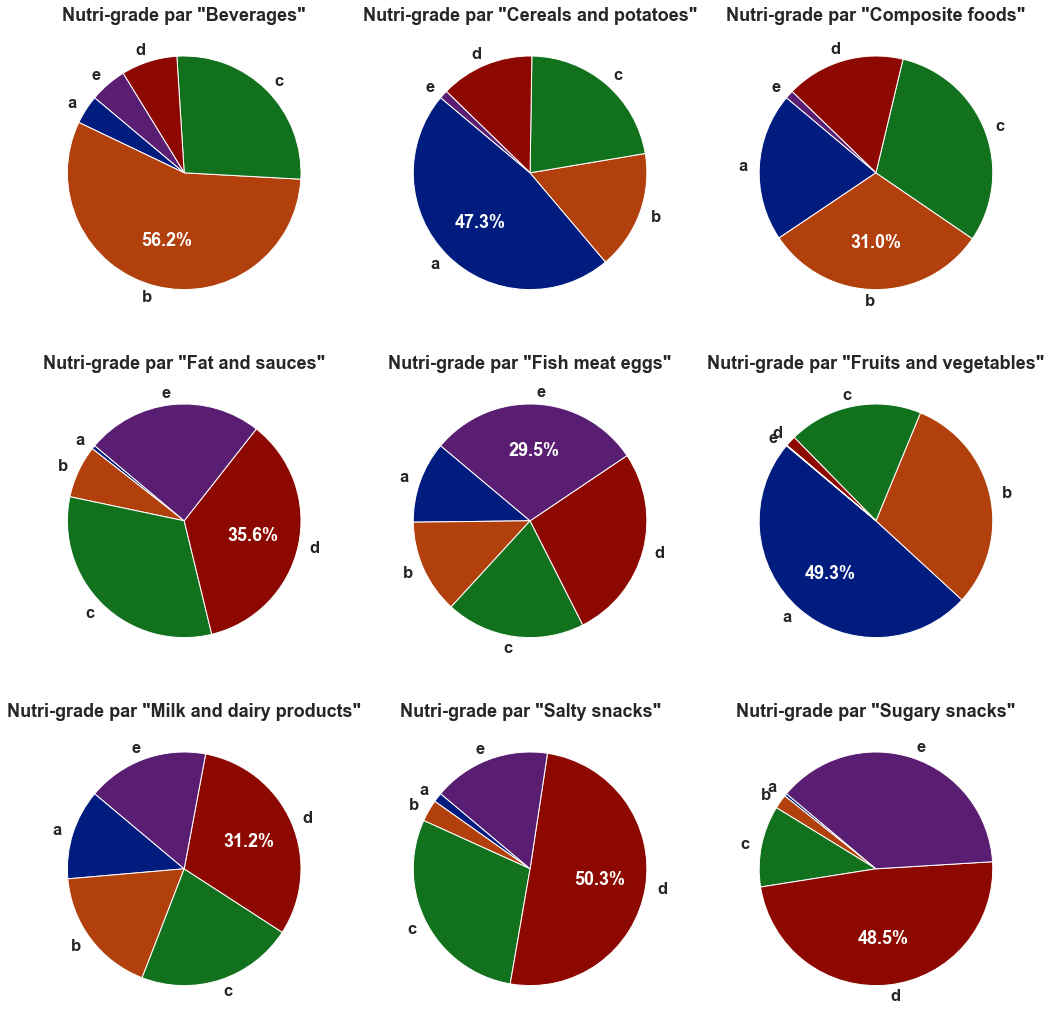

In [136]:
#Et inversement, pour visualiser le nutri-grade par catégorie
#On a 9 catégories, donc 3 lignes et 3 colonnes
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

#Pour créer un piechart par catégorie
for idx, col in enumerate(cont.transpose().columns):
    ligne_idx = idx // 3
    col_idx = idx % 3
    
    #On extrait les données de la colonne actuelle
    data = cont.transpose()[col]
    
    #On trace
    ax = axes[ligne_idx, col_idx]
    wedges, texts, autotexts = ax.pie(data, labels=data.index, startangle=140, autopct='%1.1f%%',
                                      textprops={'fontweight': 'bold'})
    
    #Afin de ne pas surcharger, on n'affiche que le pourcentage de la plus grosse part
    max_index = data.argmax()
    for i, autotext in enumerate(autotexts):
        autotext.set_color('white')
        if i != max_index:
            autotext.set_visible(False)
        
            
    ax.set_title(f'Nutri-grade par "{col}"', weight='bold')

plt.tight_layout(pad=2.0)
plt.show()

Dans le barplot on constate que les sugary snacks, qui comme on l'a vu plus tôt, sont présents en très grand nombre dans nos données, représentent pratiquement la moitié de nos données dans les grades D et E.

De plus, on constate que les salty snacks, fat and sauces, milk and dairy products, et dans une moindre mesure, fish meat eggs sont également fortement représentés dans le grade D, ce qui explique pourquoi on a plus de données dans ce grade.

On passe aux variables quantitatives, on verra s'il peut être intéressant de tester du qualitatif/quantitatif plus tard.
### ii) Quantitatives <a class="anchor" id="iii2ii"></a>
La démarche est la même pour chaque paire de variables à tester :
- Test de Kolmogorov-Smirnov pour tester l'hypothèse H0 selon laquelle les variables suivent la même loi de distribution
    - Si oui, test paramétrique : Corrélation de Pearson
    - Si non, test non paramétrique : Corrélation de Spearman

Rappel des hypothèses à tester :
- Une corrélation parfaite entre sel et sodium
- Une forte corrélation entre glucides et sucre
- Une forte corrélation entre acides gras saturés et lipides
- L'énergie est plus fortement corrélée avec les lipides, puis avec les glucides
- Le nutri-score est fortement corrélé avec l'énergie et donc par extension, les lipides

Mais avant, matrice des corrélations afin de voir si d'autre potentiels couples de variables sautent aux yeux :

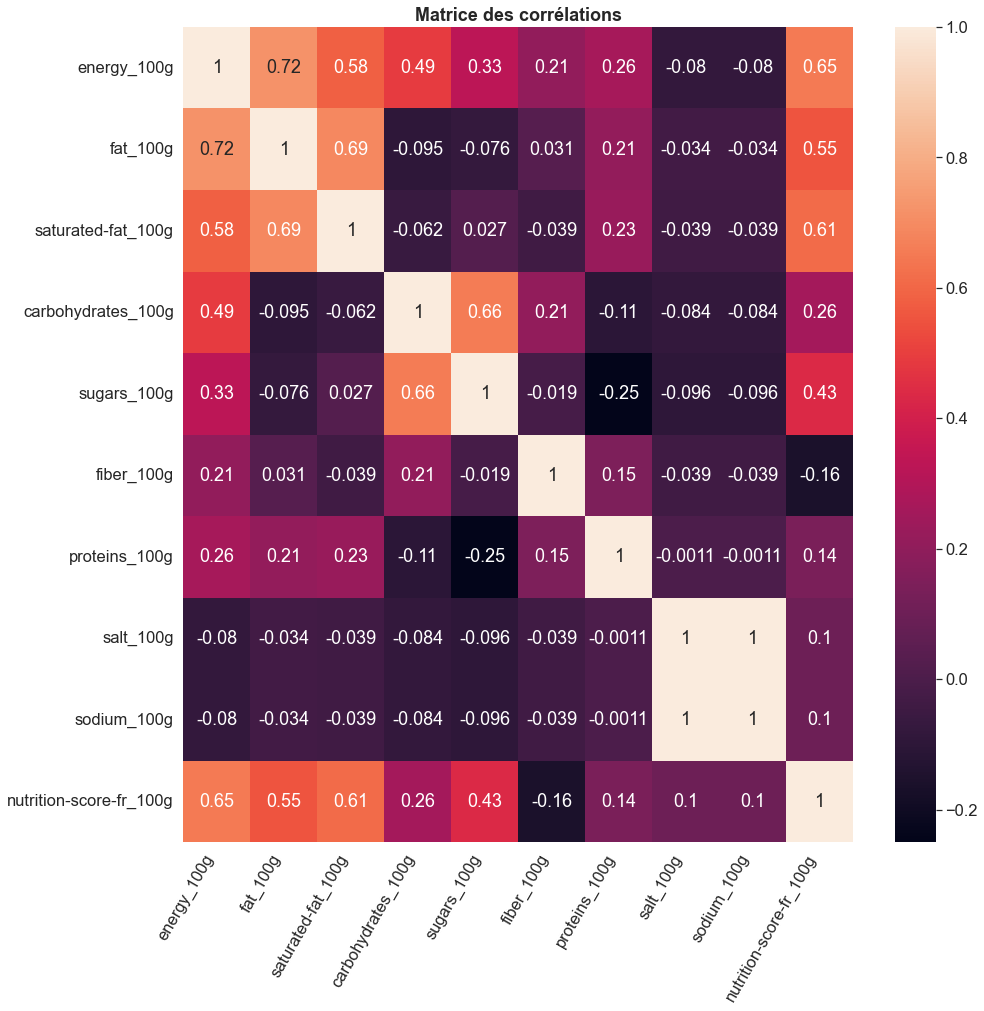

In [85]:
plt.figure(figsize = (15,15))
sns.heatmap(data_final.corr(), annot=True)
plt.title('Matrice des corrélations', weight='bold')
plt.xticks(rotation=60, ha='right')
plt.show()

In [86]:
#On commence par le sel et le sodium
st.ks_2samp(data_final['salt_100g'], data_final['sodium_100g'])

KstestResult(statistic=0.2886500877988115, pvalue=0.0)

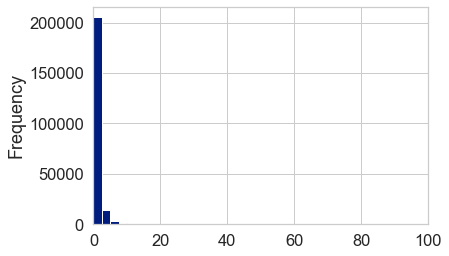

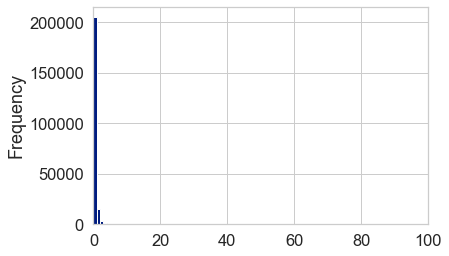

In [87]:
#Avec une p-value nulle, le test suggère 2 lois de distributions différentes
#Ce qui est surprenant si on compare aux histogrammes du pairplot
#Mais en réalité, il suffit d'ajuster xlim et augmenter le nombre de bins pour constater les différences de plages
data_final['salt_100g'].plot(kind='hist', bins=40)
plt.xlim(0, 100)
plt.show()
data_final['sodium_100g'].plot(kind='hist', bins=40)
plt.xlim(0, 100)
plt.show()

In [88]:
#La corrélation de Spearman teste l'hypothèse H0 selon laquelle les variables ne sont pas corrélées
st.spearmanr(data_final['salt_100g'], data_final['sodium_100g'])

SpearmanrResult(correlation=0.9839511861218426, pvalue=0.0)

Avec une p-value de 0.0, nous devons réfuter H0 ce qui est conforme à notre première impression. Le coefficient étant positif, on en déduit que la corrélation est positive. Càd qu'à mesure que la quantité de sel augmente, la quantité de sodium augmente également. De plus, le coefficient étant proche de 1, cela signifie que l'association est quasiment parfaite. Encore une fois, sans surprise étant donné que le sel est composé à ~39% de sodium.

In [89]:
#On applique le même raisonnement pour la suite
#On va tester nos autres paires de variables d'un coup pour gagner du temps et de la place
print("Glucides et sucre :", st.ks_2samp(data_final['carbohydrates_100g'], data_final['sugars_100g']))
print("\n")
print("Lipides et acides gras saturés :", st.ks_2samp(data_final['fat_100g'], data_final['saturated-fat_100g']))
print("\n")
print("Energie et lipides :", st.ks_2samp(data_final['energy_100g'], data_final['fat_100g']))
print("\n")
print("Energie et glucides :", st.ks_2samp(data_final['energy_100g'], data_final['carbohydrates_100g']))
print("\n")
print("Nutri-score et énergie :", st.ks_2samp(data_final['nutrition-score-fr_100g'], data_final['energy_100g']))
print("\n")
print("Nutri-score et lipides :", st.ks_2samp(data_final['nutrition-score-fr_100g'], data_final['fat_100g']))

Glucides et sucre : KstestResult(statistic=0.27676987953390003, pvalue=0.0)


Lipides et acides gras saturés : KstestResult(statistic=0.20568130564058107, pvalue=0.0)


Energie et lipides : KstestResult(statistic=0.9325547483611618, pvalue=0.0)


Energie et glucides : KstestResult(statistic=0.9274006734891379, pvalue=0.0)


Nutri-score et énergie : KstestResult(statistic=0.9562100690567211, pvalue=0.0)


Nutri-score et lipides : KstestResult(statistic=0.1537771004935125, pvalue=0.0)


In [90]:
#Toutes les p-values valent 0, ce qui signifie qu'aucune de nos paires de variables ne suit des distributions similaires
#La corrélation de Spearman teste l'hypothèse H0 selon laquelle les variables ne sont pas corrélées
print("Glucides et sucre :", st.spearmanr(data_final['carbohydrates_100g'], data_final['sugars_100g']))
print("\n")
print("Lipides et acides gras saturés :", st.spearmanr(data_final['fat_100g'], data_final['saturated-fat_100g']))
print("\n")
print("Energie et lipides :", st.spearmanr(data_final['energy_100g'], data_final['fat_100g']))
print("\n")
print("Energie et glucides :", st.spearmanr(data_final['energy_100g'], data_final['carbohydrates_100g']))
print("\n")
print("Nutri-score et énergie :", st.spearmanr(data_final['nutrition-score-fr_100g'], data_final['energy_100g']))
print("\n")
print("Nutri-score et lipides :", st.spearmanr(data_final['nutrition-score-fr_100g'], data_final['fat_100g']))

Glucides et sucre : SpearmanrResult(correlation=0.6412130677517609, pvalue=0.0)


Lipides et acides gras saturés : SpearmanrResult(correlation=0.8402180202024658, pvalue=0.0)


Energie et lipides : SpearmanrResult(correlation=0.6512859119808994, pvalue=0.0)


Energie et glucides : SpearmanrResult(correlation=0.5242667917461014, pvalue=0.0)


Nutri-score et énergie : SpearmanrResult(correlation=0.6483384841019914, pvalue=0.0)


Nutri-score et lipides : SpearmanrResult(correlation=0.535605526029143, pvalue=0.0)


Encore une fois, toutes les p-values valent 0, nous devons réfuter H0 pour chacune de ces paires de variables. Les coefficients étant positifs, on en déduit qu'à l'instar du sel et du sodium, chacune de ces corrélations est positive. Pas d'associations parfaites cependant, mais des coefficients entre 0.52 et 0.84 indiquent des associations fortes malgré tout.

Comme attendu, énergie et lipides sont plus fortement corrélés qu'énergie et glucides, ainsi que nutri-score et énergie sont plus fortement corrélés que nutri-score et lipides.

On pourrait comparer certaines de nos variables quantitatives avec le nutri-grade qui est une variable qualitative ordinale, mais cela reviendrait plus ou moins à comparer avec le nutri-score, ce qu'on vient de faire pour 2 de nos variables. De même comparer le nutri-score et les catégories de produit reviendrait à comparer le nutri-grade et les catégories de produit, ce qu'on a déjà fait plus haut. Je choisis donc de ne pas faire de test qualitatif/quantitatif.

On passe enfin à l'analyse multivariée où on fera une ACP. On garde en tête que certaines de nos variables sont fortement corrélées une à une, il est possible qu'on se sépare de certaines d'entre elles (ex : sodium) afin d'éviter une redondance dans l'analyse et biaiser les résultats.

## 3) Multivariées <a class="anchor" id="iii3"></a>
### i) ACP <a class="anchor" id="iii3i"></a>

In [91]:
#On importe les librairies dont on aura besoin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [92]:
#Soit X la matrice des données
X = data_final[colonnes_num].values
X[:5]

array([[1552.0, 1.4, 0.12000000000000002, 77.1, 4.6, 5.7, 8.6, 0.52, 0.2,
        -2],
       [1490.0, 1.9599999999999997, 0.0, 80.0, 0.0, 2.66, 8.9, 0.36, 0.0,
        0],
       [3586.0, 100.0, 7.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17],
       [1393.0, 1.0, 4.78, 62.5, 1.28, 12.5, 22.9, 0.68, 0.26, -3],
       [1540.0, 1.8, 0.0, 73.7, 1.8, 1.8, 14.0, 0.0, 0.0, -3]],
      dtype=object)

In [93]:
#On instancie
scaler = StandardScaler()

#On centre et réduit
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.67839556, -0.59153822, -0.56962033,  1.70374808, -0.49410168,
         1.17932162,  0.25047093, -0.16922014, -0.17064632, -1.21076644],
       [ 0.59643534, -0.55646062, -0.58610023,  1.80755454, -0.71857341,
         0.21843885,  0.28878917, -0.19493891, -0.25223316, -0.98302774],
       [ 3.36721967,  5.58462482,  0.38896064, -1.05607181, -0.71857341,
        -0.62233358, -0.84798542, -0.25280613, -0.25223316,  0.95275123],
       [ 0.46820725, -0.61659365,  0.0703492 ,  1.18113628, -0.65611171,
         3.32866466,  2.07697392, -0.14350138, -0.14617026, -1.32463579],
       [ 0.66253229, -0.56648279, -0.58610023,  1.58204396, -0.63073665,
        -0.05338983,  0.94019933, -0.25280613, -0.25223316, -1.32463579]])

In [94]:
#On entraine notre PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)

#On calcule la variance cumulée
pca.explained_variance_ratio_.cumsum()

array([0.31290764, 0.52274776, 0.70552058, 0.82894668, 0.90363146,
       0.94402331, 0.9728866 , 0.99250816, 0.99964216, 1.        ])

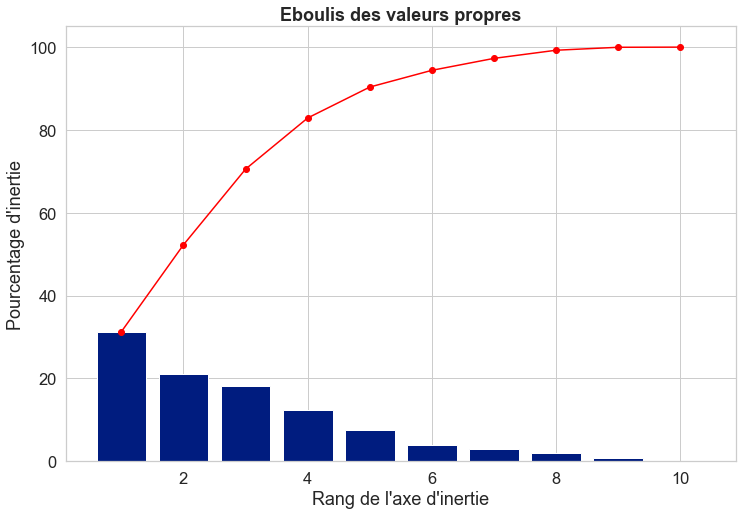

In [95]:
#Environ 83% de la variance est comprise dans les 4 premières composantes
#Un peu de visualisation
plt.figure(figsize=(12,8))
plt.bar(range(1,11), pca.explained_variance_ratio_*100)
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum()*100,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", weight='bold')
plt.show(block=False)

In [96]:
#Intéressons-nous aux composantes maintenant
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.521587  0.438883  0.434058  0.213963  0.219724  0.044533  0.151214   
1 -0.029755  0.178082  0.161853 -0.317182 -0.302126 -0.097431  0.159861   
2  0.043501 -0.267985 -0.226653  0.489005  0.507587  0.004236 -0.310451   
3  0.181080 -0.048877 -0.151641  0.227019 -0.138970  0.789791  0.416812   
4  0.046218  0.316500  0.153258 -0.131992 -0.123391  0.425768 -0.798275   
5 -0.392148 -0.346677  0.417049 -0.386056  0.397803  0.387075  0.072045   
6 -0.007177 -0.371762  0.697454  0.422054 -0.274003 -0.132534 -0.051545   
7  0.087049  0.265690  0.157023 -0.195451  0.578532 -0.120917  0.151271   
8  0.727210 -0.521832 -0.050145 -0.424453 -0.015316 -0.038007 -0.116166   
9  0.000678 -0.000305  0.000157 -0.000504  0.000686 -0.000140  0.000051   

          7         8         9  
0 -0.059408 -0.059415  0.470059  
1  0.592434  0.592530  0.110465  
2  0.361685  0.361524  0.142259  
3  0.089017  0.089032 -0.240048  
4  0.022370  0.022449 -0.148429  
5 -0.022212 -0.022378  0.298006  
6  0.029135  0.029062 -0.316508  
7  0.070738  0.069323 -0.690624  
8  0.002128  0.000900 -0.031683  
9 -0.707038  0.707175 -0.000678

In [97]:
#Un peu plus de clarté
pcs.columns = colonnes_num
pcs.index = [f"F{i}" for i in range (1,11)]
pcs = pcs.round(2)
pcs

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
F1          0.52      0.44                0.43                0.21   
F2         -0.03      0.18                0.16               -0.32   
F3          0.04     -0.27               -0.23                0.49   
F4          0.18     -0.05               -0.15                0.23   
F5          0.05      0.32                0.15               -0.13   
F6         -0.39     -0.35                0.42               -0.39   
F7         -0.01     -0.37                0.70                0.42   
F8          0.09      0.27                0.16               -0.20   
F9          0.73     -0.52               -0.05               -0.42   
F10         0.00     -0.00                0.00               -0.00   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
F1          0.22        0.04           0.15      -0.06        -0.06   
F2         -0.30       -0.10           0.16       0.59         0.59   
F3          0.51        0.00          -0.31       0.36         0.36   
F4         -0.14        0.79           0.42       0.09         0.09   
F5         -0.12        0.43          -0.80       0.02         0.02   
F6          0.40        0.39           0.07      -0.02        -0.02   
F7         -0.27       -0.13          -0.05       0.03         0.03   
F8          0.58       -0.12           0.15       0.07         0.07   
F9         -0.02       -0.04          -0.12       0.00         0.00   
F10         0.00       -0.00           0.00      -0.71         0.71   

     nutrition-score-fr_100g  
F1                      0.47  
F2                      0.11  
F3                      0.14  
F4                     -0.24  
F5                     -0.15  
F6                      0.30  
F7                     -0.32  
F8                     -0.69  
F9                     -0.03  
F10                    -0.00

In [98]:
#Cercle de corrélation
def correlation_graph(pca, x_y, cols) : 
    #pca : notre objet PCA qui a été fit
    #x_y : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    #cols :colonnes à représenter

    #Extrait x et y 
    x, y = x_y

    #Taille de l'image
    fig, ax = plt.subplots(figsize=(20, 12))

    #Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        #Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        #Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                cols[i])
        
    #Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    #Le titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), weight='bold')

    #Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    #Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    plt.axis('equal')
    plt.show()

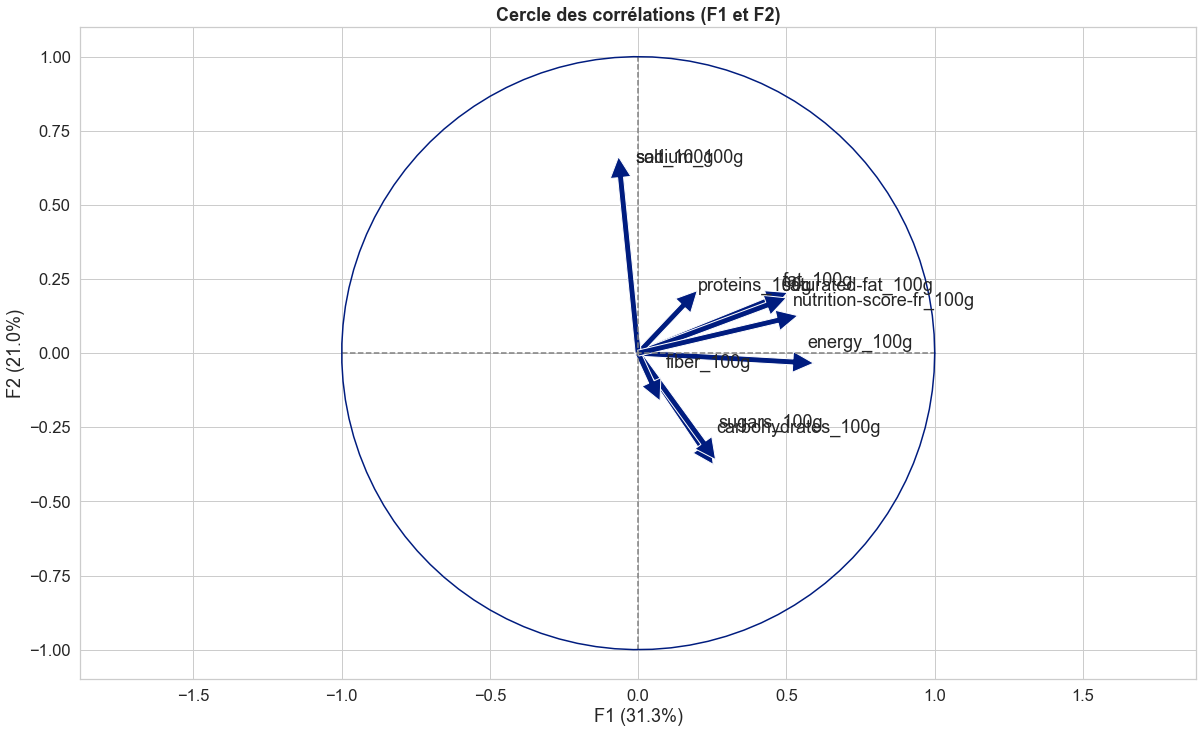

In [99]:
correlation_graph(pca, (0,1), colonnes_num)

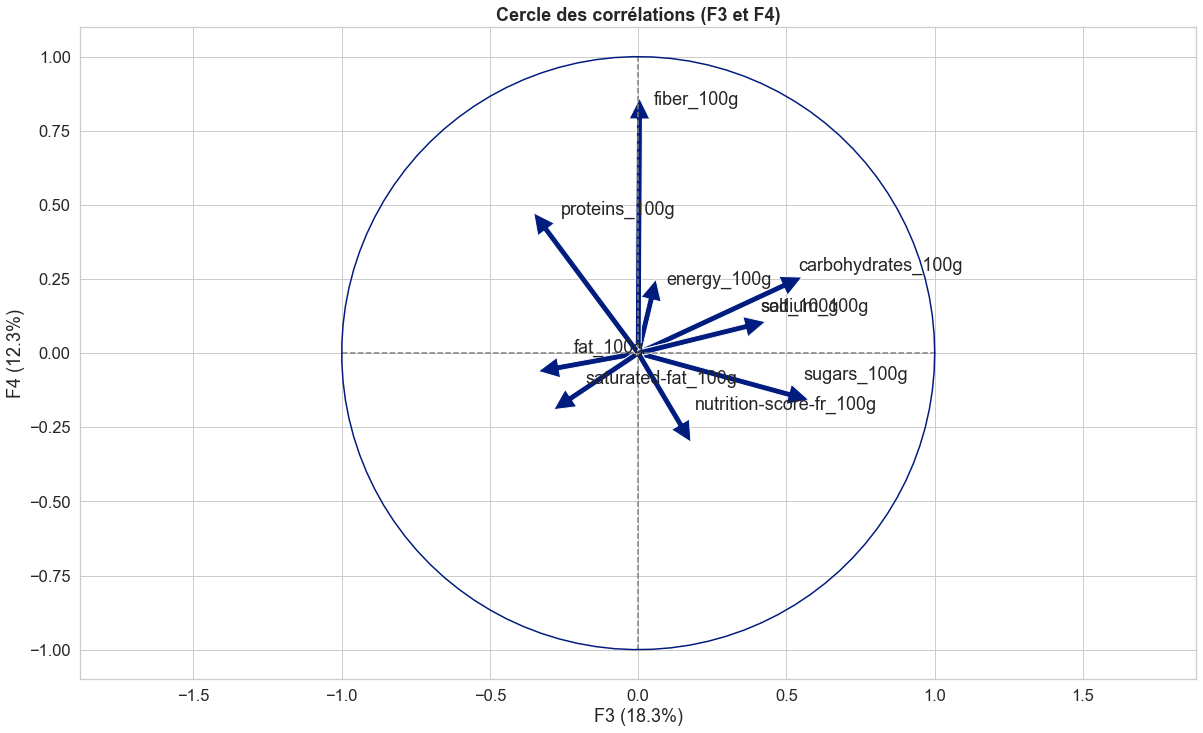

In [100]:
correlation_graph(pca, (2,3), colonnes_num)

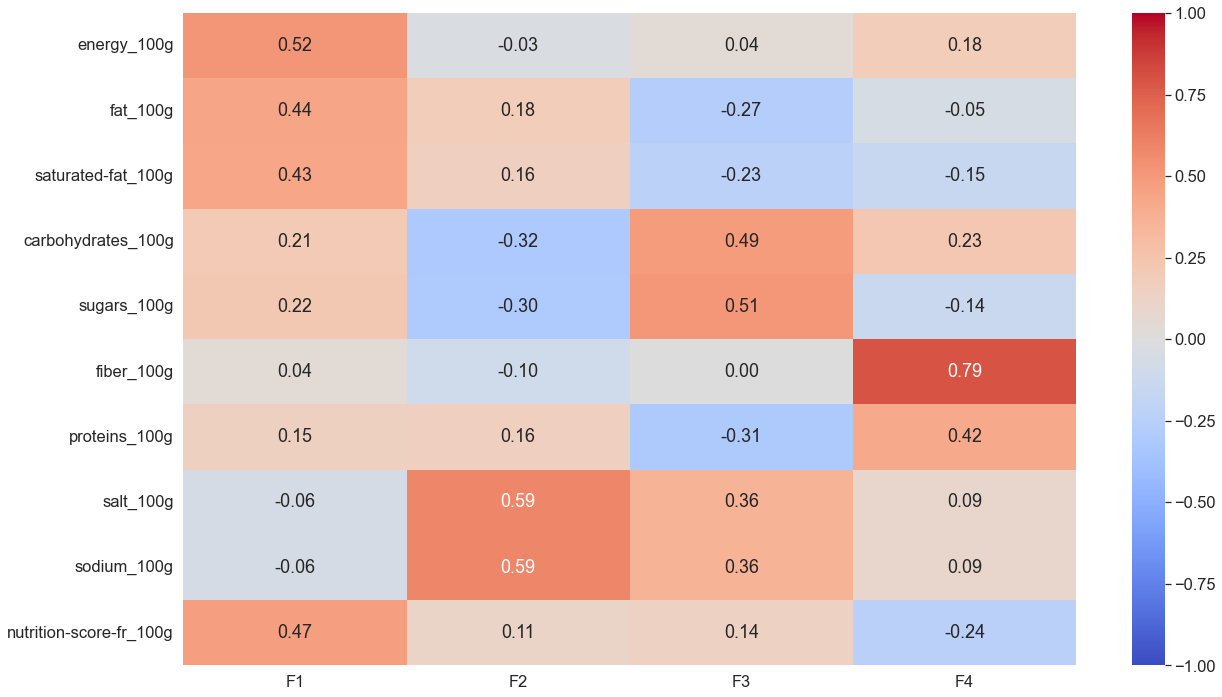

In [101]:
#Les cerles de corrélation sont tracés, mais personnellement je préfère les heatmaps
#Alors on transpose et on met ça en couleur (ndlr je viens de me rappeler que .T fait la même chose que .transpose())
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(pcs.iloc[:4, :].T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

Il apparaît évident que les paires sel/sodium, lipides/acides gras saturés sont redondantes dans les 4 premières composantes. Il en va de même pour la paire glucides/sucre dans les 3 premières. La quatrième composante ne représentant que 12% de la variance, je décide de tenter une nouvelle ACP en retirant sodium, acides gras saturés et sucre de la matrice des données.

In [102]:
#On drop les colonnes concernées
data_apc = data_final.drop(['saturated-fat_100g', 'sugars_100g', 'sodium_100g'], axis=1)
data_apc

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands         pnns_groups_1 nutrition_grade_fr  \
0             Bob's Red Mill  Cereals and potatoes                  a   
1                   Lundberg  Cereals and potatoes                  b   
2       Napa Valley Naturals        Fat and sauces                  e   
3                       Unfi  Cereals and potatoes                  a   
4                 Gardentime  Cereals and potatoes                  a   
...                      ...                   ...                ...   
228358                   NaN        Fat and sauces                  c   
228359                Biosic          Salty snacks                  b   
228360               Lobodis             Beverages                  c   
228361          Trader Joe's             Beverages                  b   
228362         Market Pantry         Sugary snacks                  c   

        energy_100g  fat_100g  carbohydrates_100g  fiber_100g  proteins_100g  \
0            1552.0      1.40                77.1        5.70            8.6   
1            1490.0      1.96                80.0        2.66            8.9   
2            3586.0    100.00                 0.0        0.00            0.0   
3            1393.0      1.00                62.5       12.50           22.9   
4            1540.0      1.80                73.7        1.80           14.0   
...             ...       ...                 ...         ...            ...   
228358        569.0     31.00                12.2        1.10            2.1   
228359       2406.0      9.88                21.7       12.20           21.2   
228360         21.0      0.20                 0.5        0.20            0.5   
228361          0.0      0.00                 0.0        0.00            0.0   
228362       2092.0      0.00                 0.0        0.00            0.0   

        salt_100g  nutrition-score-fr_100g  
0            0.52                       -2  
1            0.36                        0  
2            0.00                       17  
3            0.68                       -3  
4            0.00                       -3  
...           ...                      ...  
228358       1.10                        4  
228359       0.10                        0  
228360       0.00                        2  
228361       0.00                        0  
228362       0.00                        6  

[228363 rows x 12 columns]

In [103]:
#Nos nouvelles colonnes numériques
colonnes_num2 = data_apc.iloc[:, 5:].columns
colonnes_num2

Index(['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [104]:
#Nouvelle matrice des données
X2 = data_apc[colonnes_num2].values
X2[:5]

array([[1552.0, 1.4, 77.1, 5.7, 8.6, 0.52, -2],
       [1490.0, 1.9599999999999997, 80.0, 2.66, 8.9, 0.36, 0],
       [3586.0, 100.0, 0.0, 0.0, 0.0, 0.0, 17],
       [1393.0, 1.0, 62.5, 12.5, 22.9, 0.68, -3],
       [1540.0, 1.8, 73.7, 1.8, 14.0, 0.0, -3]], dtype=object)

In [105]:
#On centre et réduit
X2_scaled = scaler.fit_transform(X2)
X2_scaled[:5]

array([[ 0.67839556, -0.59153822,  1.70374808,  1.17932162,  0.25047093,
        -0.16922014, -1.21076644],
       [ 0.59643534, -0.55646062,  1.80755454,  0.21843885,  0.28878917,
        -0.19493891, -0.98302774],
       [ 3.36721967,  5.58462482, -1.05607181, -0.62233358, -0.84798542,
        -0.25280613,  0.95275123],
       [ 0.46820725, -0.61659365,  1.18113628,  3.32866466,  2.07697392,
        -0.14350138, -1.32463579],
       [ 0.66253229, -0.56648279,  1.58204396, -0.05338983,  0.94019933,
        -0.25280613, -1.32463579]])

In [106]:
#On entraine notre PCA
pca2 = PCA(n_components=7)
pca2.fit(X2_scaled)

#On calcule la variance cumulée
pca2.explained_variance_ratio_.cumsum()

array([0.3541304 , 0.54095347, 0.70461365, 0.84529407, 0.94615281,
       0.9896896 , 1.        ])

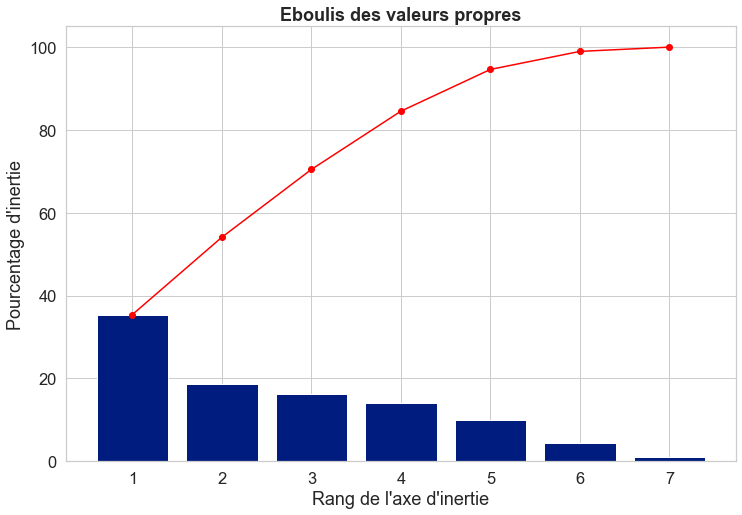

In [107]:
#Environ 85% de la variance est comprise dans les 4 premières composantes (+2% par rapport à tout à l'heure)
#On revisualise
plt.figure(figsize=(12,8))
plt.bar(range(1,8), pca2.explained_variance_ratio_*100)
plt.plot(range(1,8), pca2.explained_variance_ratio_.cumsum()*100,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", weight='bold')
plt.show(block=False)

In [108]:
#Les composantes
pcs2 = pca2.components_
pcs2 = pd.DataFrame(pcs2)
pcs2

0         1         2         3         4         5         6
0  0.605840  0.501632  0.256185  0.097396  0.218340 -0.027005  0.507745
1  0.128903 -0.310938  0.629828  0.563782 -0.150936 -0.314712 -0.224373
2 -0.020541  0.133887 -0.395935  0.503002  0.678152 -0.140784 -0.303589
3 -0.008828 -0.159373  0.145876  0.307911  0.097923  0.920362  0.042164
4  0.044550  0.461228 -0.351265  0.443612 -0.667072  0.064324 -0.126418
5 -0.308534 -0.331045 -0.243832  0.355622 -0.045158 -0.170641  0.760354
6  0.720184 -0.534823 -0.420476 -0.039811 -0.114198  0.009230 -0.061549

In [109]:
#La clarté
pcs2.columns = colonnes_num2
pcs2.index = [f"F{i}" for i in range (1,8)]
pcs2 = pcs2.round(2)
pcs2

energy_100g  fat_100g  carbohydrates_100g  fiber_100g  proteins_100g  \
F1         0.61      0.50                0.26        0.10           0.22   
F2         0.13     -0.31                0.63        0.56          -0.15   
F3        -0.02      0.13               -0.40        0.50           0.68   
F4        -0.01     -0.16                0.15        0.31           0.10   
F5         0.04      0.46               -0.35        0.44          -0.67   
F6        -0.31     -0.33               -0.24        0.36          -0.05   
F7         0.72     -0.53               -0.42       -0.04          -0.11   

    salt_100g  nutrition-score-fr_100g  
F1      -0.03                     0.51  
F2      -0.31                    -0.22  
F3      -0.14                    -0.30  
F4       0.92                     0.04  
F5       0.06                    -0.13  
F6      -0.17                     0.76  
F7       0.01                    -0.06

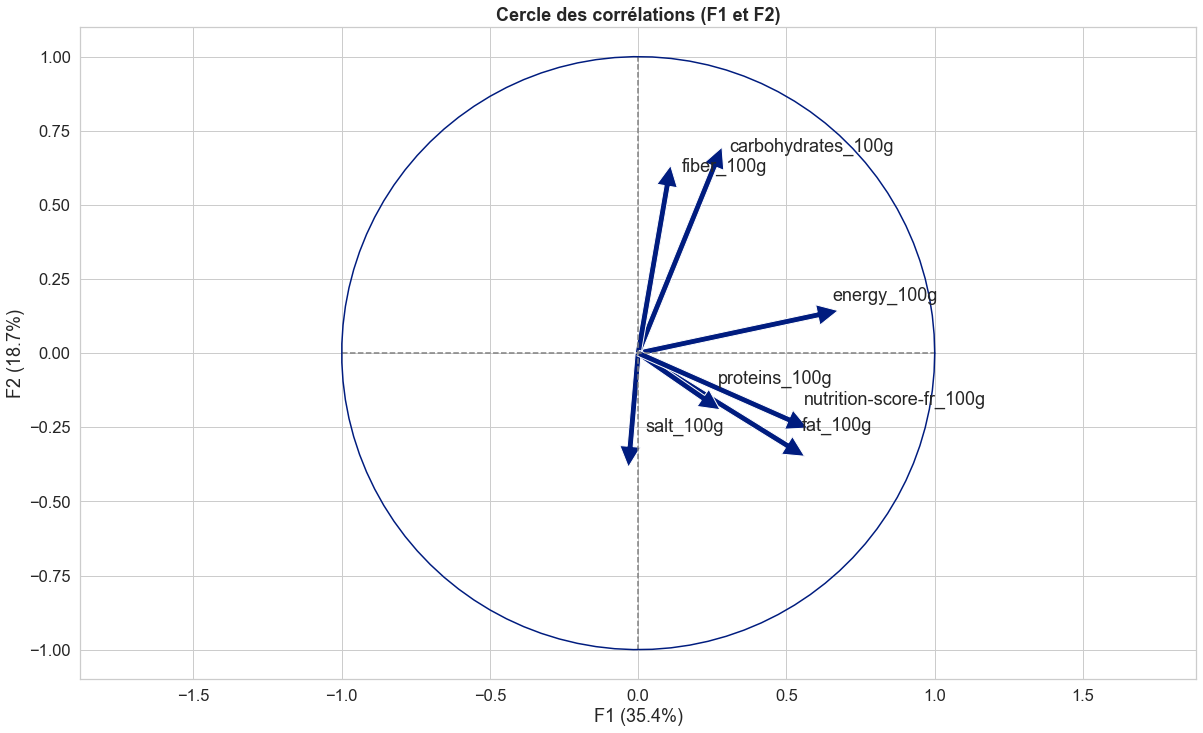

In [110]:
correlation_graph(pca2, (0,1), colonnes_num2)

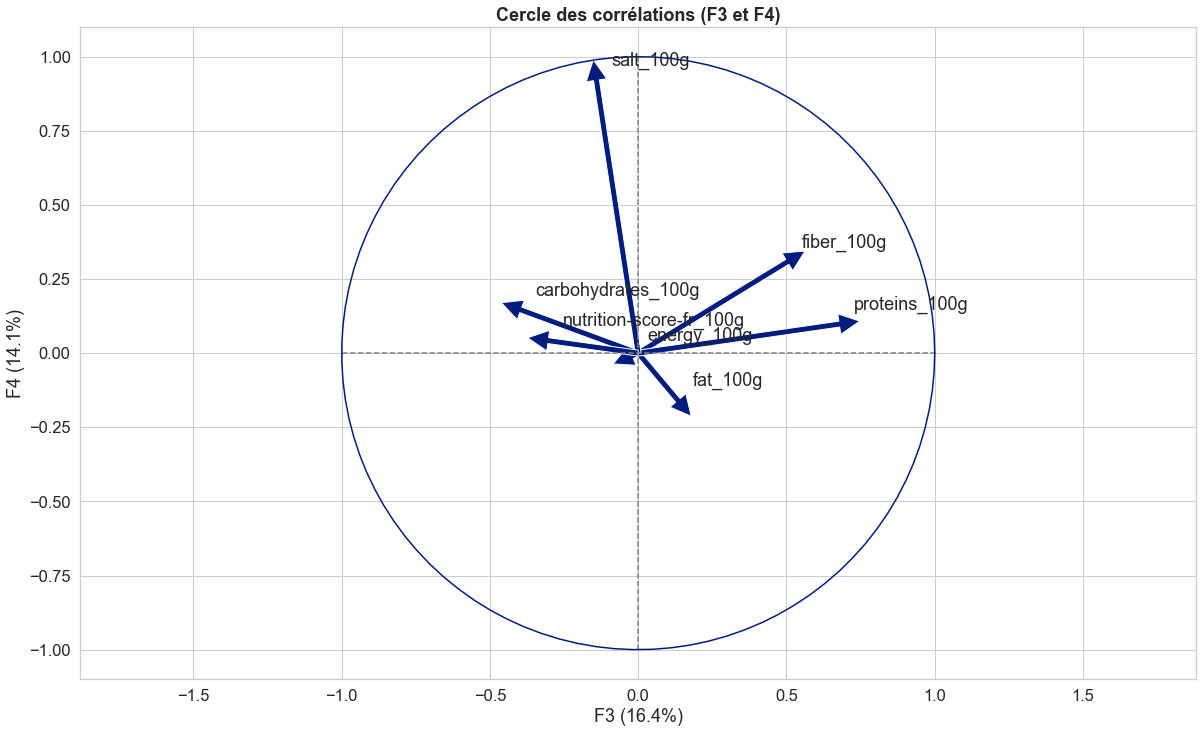

In [111]:
correlation_graph(pca2, (2,3), colonnes_num2)

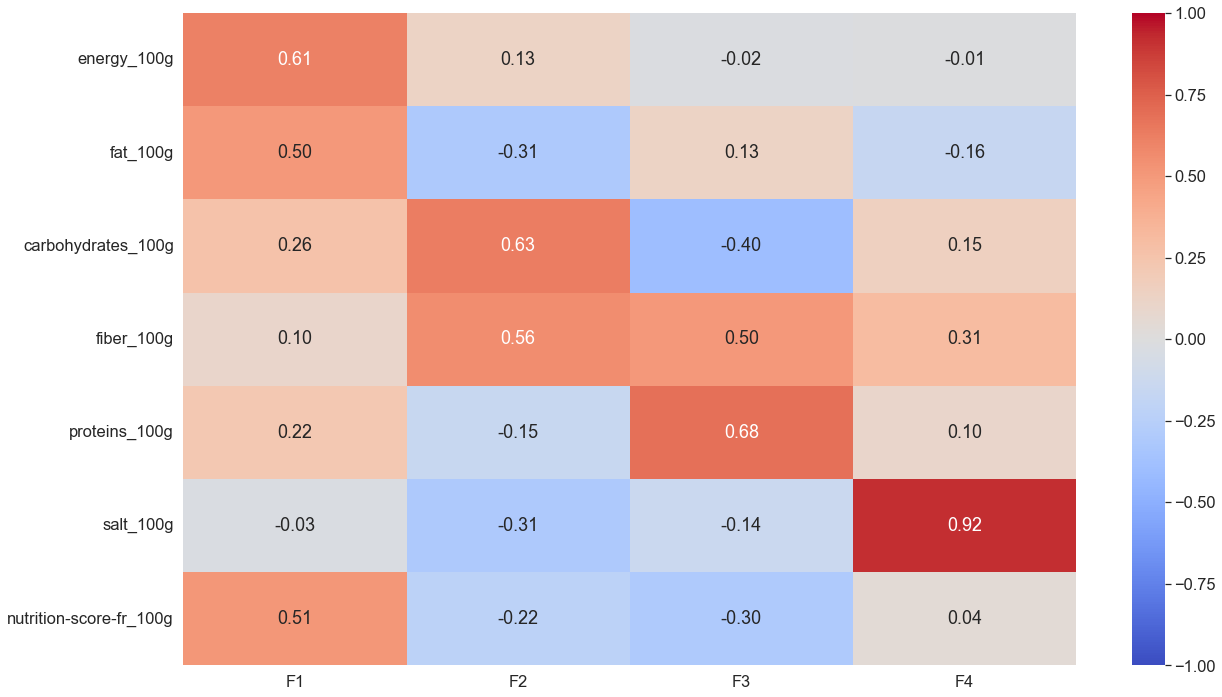

In [112]:
#Les résultats sont très différents de ce qu'on a vu avant
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(pcs2.iloc[:4, :].T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

On note que :
- **Sur F1** : Les variables énergie, lipides et nutriscore sont positivement représentées
- **Sur F2** : Les variables glucides et fibres sont positivement représentées, lipides et sel négativement représentées
- **Sur F3** : Les variables fibres et protéines sont positivement représentées, glucides et nutriscore négativement représentées
- **Sur F4** : La variable sel est très fortement positivement représentée

In [113]:
#Nous allons désormais calculer les coordonnées des individus dans le nouvel espace projectif
X_proj = pca2.transform(X2_scaled)
X_proj[:5]

array([[ 0.11009704,  2.29644145,  0.3867483 ,  0.51768233, -0.34282191,
        -0.91256333,  0.08595885],
       [ 0.13573962,  1.74983306, -0.1708305 ,  0.2217757 , -0.84902294,
        -1.09009017, -0.01585306],
       [ 4.81569223, -2.32464782, -0.04507184, -1.54098392,  3.24964321,
        -2.04561335, -0.05707436],
       [ 0.38592952,  2.90151482,  2.94535085,  1.30682766, -0.42905253,
        -0.12108592, -0.11917385],
       [ 0.056851  ,  1.46272255,  0.33263777,  0.10231963, -1.2871478 ,
        -1.42813166,  0.08885422]])

In [114]:
X_proj = pd.DataFrame(X_proj, columns = [f"F{i}" for i in range (1,8)])
X_proj = pd.concat([data_apc.iloc[:, :5], X_proj], axis=1)
X_proj

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands         pnns_groups_1 nutrition_grade_fr  \
0             Bob's Red Mill  Cereals and potatoes                  a   
1                   Lundberg  Cereals and potatoes                  b   
2       Napa Valley Naturals        Fat and sauces                  e   
3                       Unfi  Cereals and potatoes                  a   
4                 Gardentime  Cereals and potatoes                  a   
...                      ...                   ...                ...   
228358                   NaN        Fat and sauces                  c   
228359                Biosic          Salty snacks                  b   
228360               Lobodis             Beverages                  c   
228361          Trader Joe's             Beverages                  b   
228362         Market Pantry         Sugary snacks                  c   

              F1        F2        F3        F4        F5        F6        F7  
0       0.110097  2.296441  0.386748  0.517682 -0.342822 -0.912563  0.085959  
1       0.135740  1.749833 -0.170831  0.221776 -0.849023 -1.090090 -0.015853  
2       4.815692 -2.324648 -0.045072 -1.540984  3.249643 -2.045613 -0.057074  
3       0.385930  2.901515  2.945351  1.306828 -0.429053 -0.121086 -0.119174  
4       0.056851  1.462723  0.332638  0.102320 -1.287148 -1.428132  0.088854  
...          ...       ...       ...       ...       ...       ...       ...  
228358 -0.320743 -0.787783  0.066573 -0.519607  1.098933 -0.534970 -0.753192  
228359  1.221425  1.913354  3.285028  0.871450  0.453758 -0.110548  1.168527  
228360 -2.017886 -0.567847 -0.198679 -0.546773  0.351486  0.194406 -0.019947  
228361 -2.181309 -0.553705 -0.198668 -0.582464  0.394107  0.018723 -0.001888  
228362 -0.158961 -0.350519 -0.462890 -0.578070  0.430937 -0.315039  1.947727  

[228363 rows x 12 columns]

### ii) Visualisations <a class="anchor" id="iii3ii"></a>

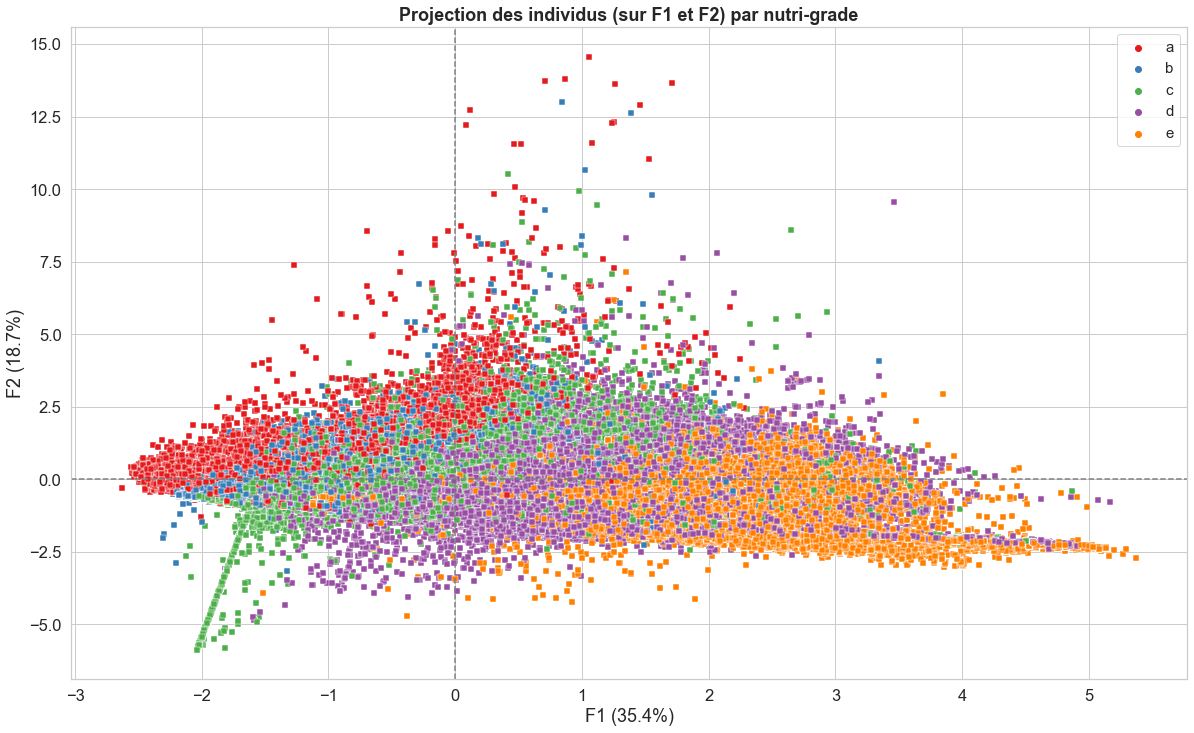

In [115]:
#On visualise la projection de nos individus sur les 2 premiers plans factoriels
#On utilise le nutri-grade et les catégories de produit comme clusters
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 5], y=X_proj.iloc[:, 6], hue='nutrition_grade_fr',
                hue_order=['a','b','c','d','e'], palette='Set1', marker='s')
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par nutri-grade", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

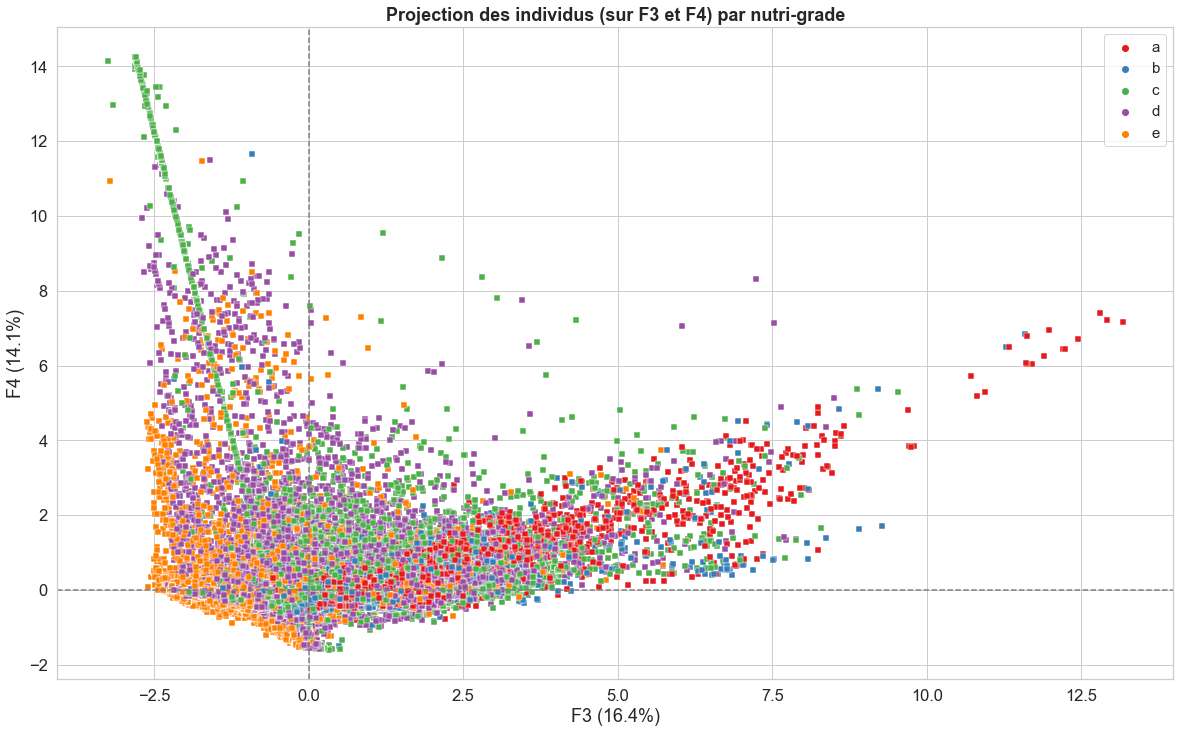

In [116]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 7], y=X_proj.iloc[:, 8], hue='nutrition_grade_fr',
                hue_order=['a','b','c','d','e'], palette='Set1', marker='s')
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par nutri-grade", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

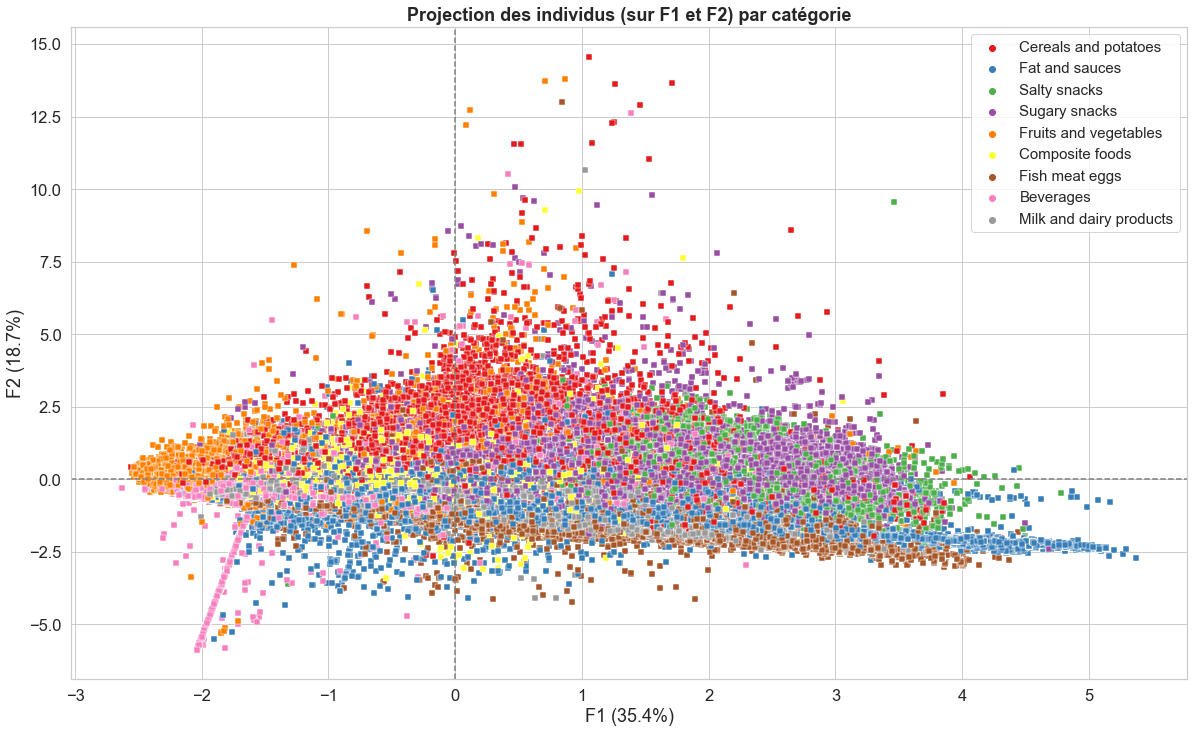

In [117]:
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 5], y=X_proj.iloc[:, 6], hue='pnns_groups_1',
                palette='Set1', marker='s')
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par catégorie", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

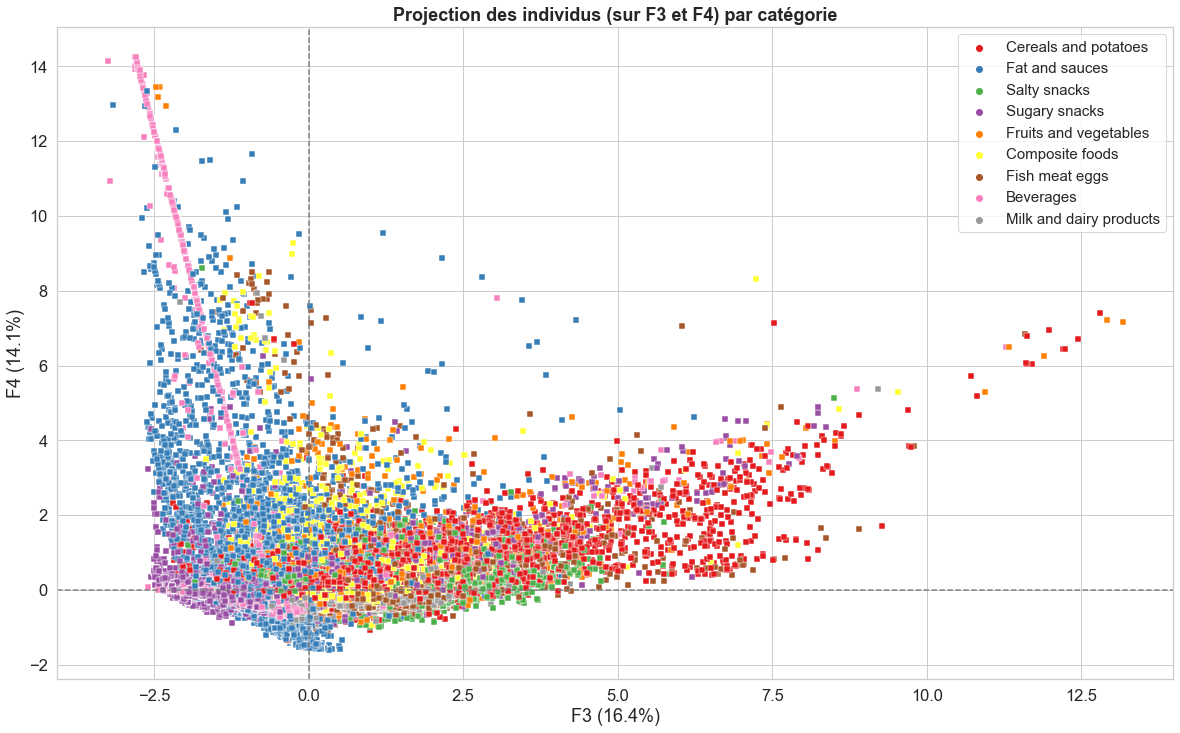

In [118]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, 7], y=X_proj.iloc[:, 8], hue='pnns_groups_1',
                palette='Set1', marker='s')
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par catégorie", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

J'ai l'impression que les clusters sont mal définis dans le nouvel espace projectif et décide de tenter ma chance pour aboutir à un nouveau clustering plus adapté.
### iii) Nouveau clustering <a class="anchor" id="iii3iii"></a>

In [119]:
#Pour ce faire on va utiliser K-means, on commence par importer les librairies nécessaires
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#On va tester plusieurs valeurs de k pour voir laquelle est la plus adaptée
#Liste vide pour enregistrer les silhouette scores
sil = []

#Nombre de clusters, on prévoit large
k_list = range(2,15)

#On instancie
for k in k_list :
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_proj.iloc[:, 5:].sample(10000, random_state=0)) #Pour accélérer le process sample(10000)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_proj.iloc[:, 5:].sample(10000, random_state=0), labels, metric='euclidean'))

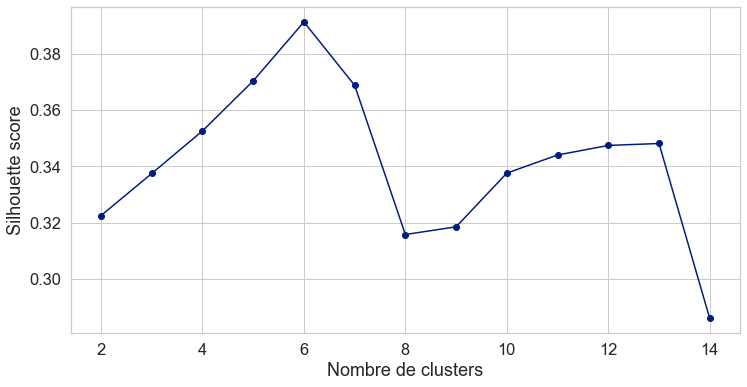

In [120]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Silhouette score")
ax.set_xlabel("Nombre de clusters")

ax = plt.plot(k_list, sil, marker='o')

In [121]:
#On part donc sur 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_proj.iloc[:, 5:])

KMeans(n_clusters=6)

In [122]:
clusters = kmeans.labels_
clusters

array([0, 0, 4, ..., 1, 1, 1])

In [123]:
#On enregistre les centroïdes
centroids = kmeans.cluster_centers_
centroids

array([[ 3.35211534e-01,  1.71625205e+00,  1.11840881e+00,
         6.23964112e-01,  2.74699566e-01, -1.26269561e-01,
         2.62285874e-02],
       [-1.38563416e+00, -2.46429787e-01, -4.05062096e-02,
        -2.66743143e-01,  1.89671740e-01,  9.02780929e-03,
        -4.04109092e-03],
       [ 1.05547480e+00, -1.35340422e+00,  1.23447324e+00,
        -5.38747166e-02, -9.16312258e-01,  1.84114035e-01,
        -5.56154731e-02],
       [ 1.22329043e+00,  5.31745835e-01, -9.31010492e-01,
         3.54490971e-02, -2.63165029e-01,  8.62920514e-02,
         1.98411489e-02],
       [ 3.66219825e+00, -1.73150807e+00,  1.12155641e-03,
        -9.66672656e-01,  2.33148728e+00, -1.02349871e+00,
        -1.01390413e-02],
       [-1.49787724e+00, -4.01133584e+00, -2.02977100e+00,
         9.49221583e+00,  8.64819361e-01, -9.79869028e-01,
         5.37494528e-02]])

In [124]:
#Pour plus de clarté
centroids_proj = pca2.transform(centroids)
centroids_proj = pd.DataFrame(centroids, columns=[f"F{i}" for i in range (1,8)])
centroids_proj

F1        F2        F3        F4        F5        F6        F7
0  0.335212  1.716252  1.118409  0.623964  0.274700 -0.126270  0.026229
1 -1.385634 -0.246430 -0.040506 -0.266743  0.189672  0.009028 -0.004041
2  1.055475 -1.353404  1.234473 -0.053875 -0.916312  0.184114 -0.055615
3  1.223290  0.531746 -0.931010  0.035449 -0.263165  0.086292  0.019841
4  3.662198 -1.731508  0.001122 -0.966673  2.331487 -1.023499 -0.010139
5 -1.497877 -4.011336 -2.029771  9.492216  0.864819 -0.979869  0.053749

In [125]:
#On ajoute une colonne clusters à X_proj
X_proj_k = X_proj.copy()
X_proj_k['clusters'] = clusters
X_proj_k

code                                       product_name  \
0       0000000016094                                    Organic Polenta   
1       0000000016117                      Organic Long Grain White Rice   
2       0000000016513                              Organic Sunflower Oil   
3       0000000016612                               Organic Adzuki Beans   
4       0000000016650                                Organic Penne Pasta   
...               ...                                                ...   
228358         989898                                        Test NF App   
228359  9900000000233                                            Amandes   
228360       99111250                                 Thé vert Earl grey   
228361       99567453  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
228362   999990026839                    Sugar Free Drink Mix, Peach Tea   

                      brands         pnns_groups_1 nutrition_grade_fr  \
0             Bob's Red Mill  Cereals and potatoes                  a   
1                   Lundberg  Cereals and potatoes                  b   
2       Napa Valley Naturals        Fat and sauces                  e   
3                       Unfi  Cereals and potatoes                  a   
4                 Gardentime  Cereals and potatoes                  a   
...                      ...                   ...                ...   
228358                   NaN        Fat and sauces                  c   
228359                Biosic          Salty snacks                  b   
228360               Lobodis             Beverages                  c   
228361          Trader Joe's             Beverages                  b   
228362         Market Pantry         Sugary snacks                  c   

              F1        F2        F3        F4        F5        F6        F7  \
0       0.110097  2.296441  0.386748  0.517682 -0.342822 -0.912563  0.085959   
1       0.135740  1.749833 -0.170831  0.221776 -0.849023 -1.090090 -0.015853   
2       4.815692 -2.324648 -0.045072 -1.540984  3.249643 -2.045613 -0.057074   
3       0.385930  2.901515  2.945351  1.306828 -0.429053 -0.121086 -0.119174   
4       0.056851  1.462723  0.332638  0.102320 -1.287148 -1.428132  0.088854   
...          ...       ...       ...       ...       ...       ...       ...   
228358 -0.320743 -0.787783  0.066573 -0.519607  1.098933 -0.534970 -0.753192   
228359  1.221425  1.913354  3.285028  0.871450  0.453758 -0.110548  1.168527   
228360 -2.017886 -0.567847 -0.198679 -0.546773  0.351486  0.194406 -0.019947   
228361 -2.181309 -0.553705 -0.198668 -0.582464  0.394107  0.018723 -0.001888   
228362 -0.158961 -0.350519 -0.462890 -0.578070  0.430937 -0.315039  1.947727   

        clusters  
0              0  
1              0  
2              4  
3              0  
4              0  
...          ...  
228358         1  
228359         0  
228360         1  
228361         1  
228362         1  

[228363 rows x 13 columns]

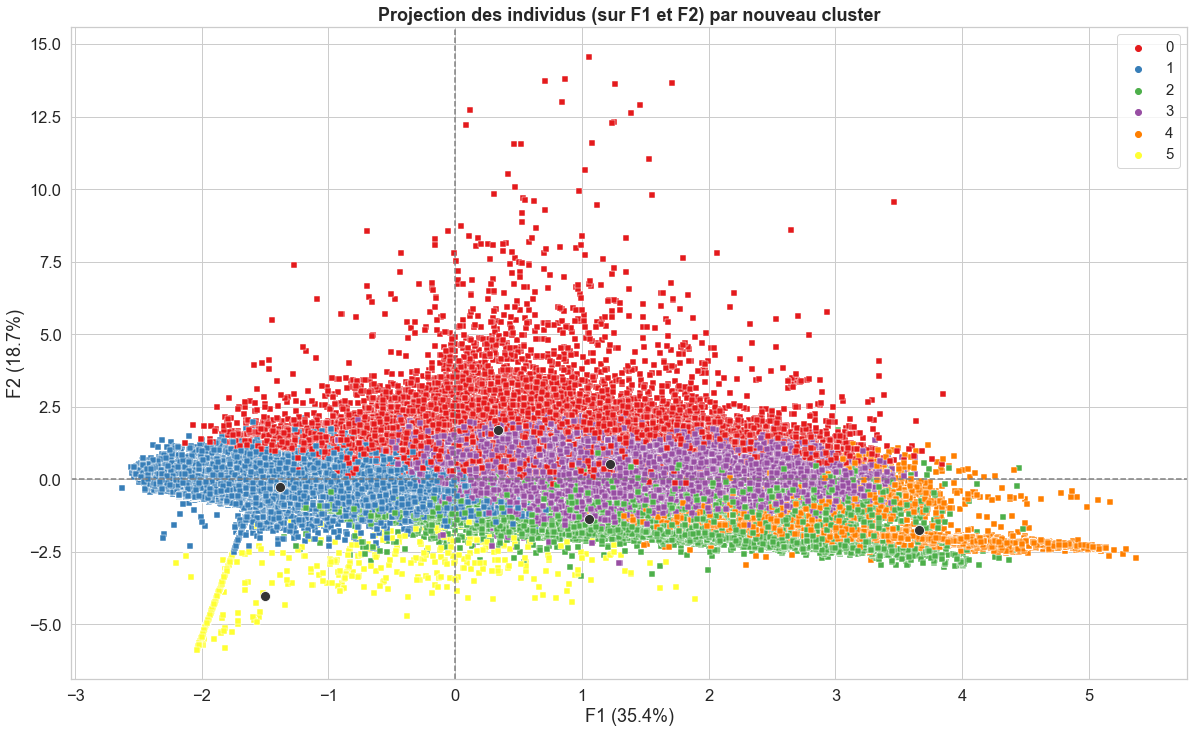

In [126]:
#On visualise
plt.figure(figsize=(20,12))
x, y = (0, 1)
sns.scatterplot(data=X_proj_k, x=X_proj_k.iloc[:, 5], y=X_proj_k.iloc[:, 6], hue='clusters',
                palette='Set1', marker='s')
sns.scatterplot(data=centroids_proj, x=centroids_proj.iloc[:, 0], y=centroids_proj.iloc[:, 1],
                marker='o', s=100, color=".2")
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par nouveau cluster", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

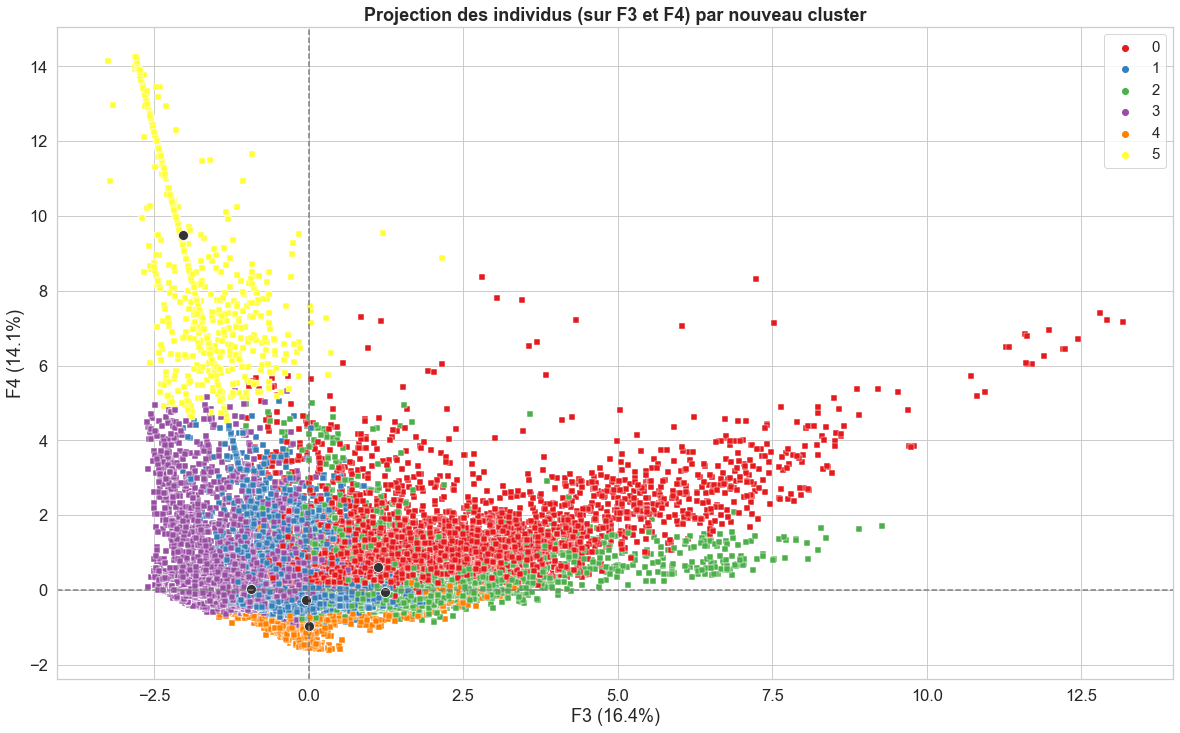

In [127]:
plt.figure(figsize=(20,12))
x, y = (2, 3)
sns.scatterplot(data=X_proj_k, x=X_proj_k.iloc[:, 7], y=X_proj_k.iloc[:, 8], hue='clusters',
                palette='Set1', marker='s')
sns.scatterplot(data=centroids_proj, x=centroids_proj.iloc[:, 2], y=centroids_proj.iloc[:, 3],
                marker='o', s=100, color=".2")
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca2.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca2.explained_variance_ratio_[y],1)))
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1) + " par nouveau cluster", weight='bold')
plt.legend(fontsize=15)
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.show()

Ces clusters semblent bien mieux définis dans le nouvel espace projectif.
## 4) Comparaisons avec les nouveaux clusters <a class="anchor" id="iii4"></a>

In [128]:
#Premièrement
X_proj_k['clusters'].value_counts()

1    100193
3     63552
2     28816
0     27715
4      6501
5      1586
Name: clusters, dtype: int64

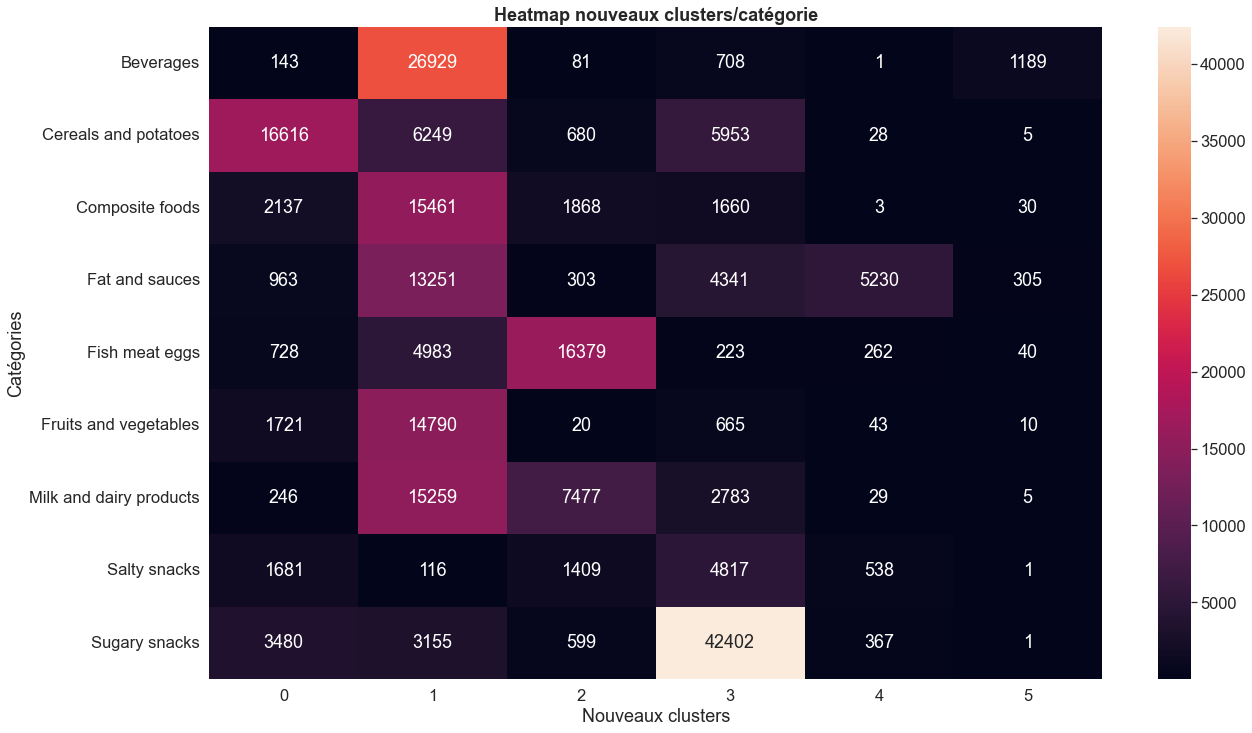

In [129]:
#On constate que les clusters 1 et 3 représentent plus de 2/3 des données
#Tandis que les clusters 4 et 5 n'en représentent qu'une infime portion
#On va créer 2 heatmaps pour comparer avec les catégories de produit et le nutri-grade
cont2 = X_proj_k[['pnns_groups_1', 'clusters']].pivot_table(index='pnns_groups_1', 
                                                                       columns='clusters', aggfunc=len)

#Heatmap pour y voir plus clair
plt.figure(figsize=(20,12))
sns.heatmap(cont2, annot=True, fmt='g')
plt.xlabel('Nouveaux clusters')
plt.ylabel('Catégories')
plt.title("Heatmap nouveaux clusters/catégorie", weight='bold')
plt.show()

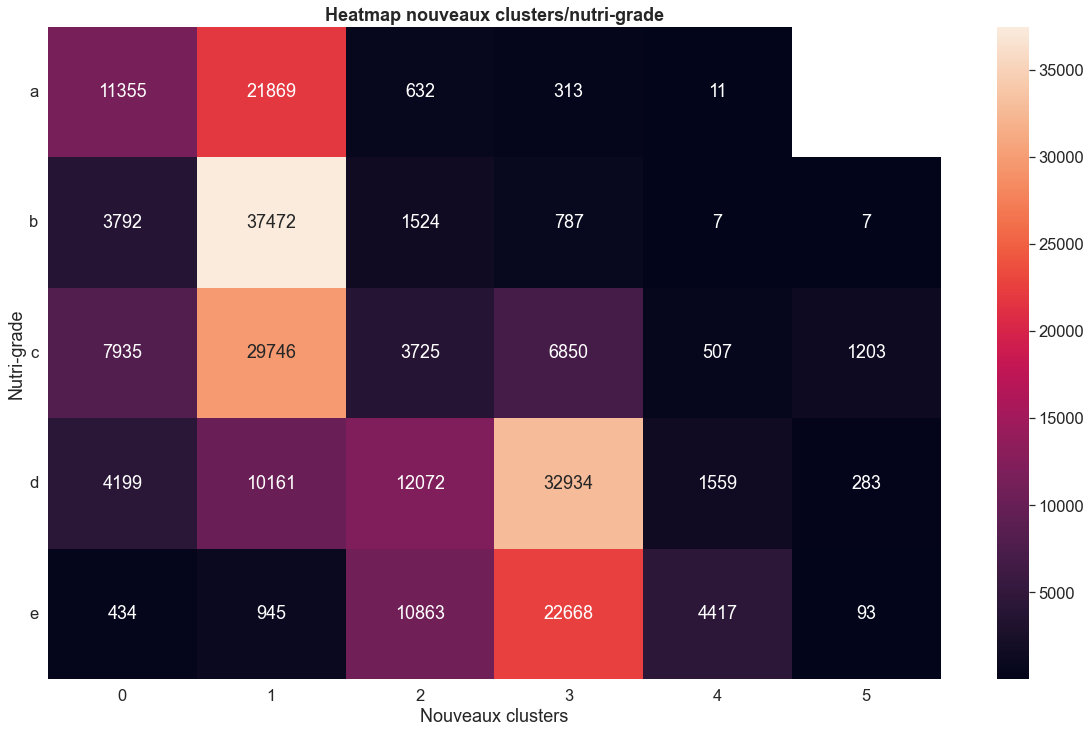

In [130]:
cont3 = X_proj_k[['nutrition_grade_fr', 'clusters']].pivot_table(index='nutrition_grade_fr', 
                                                                       columns='clusters', aggfunc=len)

#Re-heatmap pour y voir plus clair
plt.figure(figsize=(20,12))
sns.heatmap(cont3, annot=True, fmt='g')
plt.xlabel('Nouveaux clusters')
plt.ylabel('Nutri-grade')
plt.title("Heatmap nouveaux clusters/nutri-grade", weight='bold')
plt.yticks(rotation=0)
plt.show()

Il semblerait que la logique derrière ces nouveaux clusters soit la suivante :
- Une majorité de produits de type pommes de terre et céréales dans le cluster 0
- Les produits de nutri-grade a, b et c dans le cluster 1
- Les produits laitiers et viandes dans le cluster 2
- Les produits de nutri-grade d et e dans le cluster  3
- Les produits très gras dans le cluster 4
- Les produits très salés dans le cluster 5

Il convient désormais de mesurer la corrélation entre nos nouvelles variables quantitatives (les 4 premières composantes de notre ACP) et nos clusters.
## 5) ANOVA <a class="anchor" id="iii5"></a>
Il s'agit ici de comparer une variable qualitative et une variable quantitative, pour cela on va faire une analyse de variance (ANOVA). Voici comment nous allons procéder :
- Test de Kolmogorov-Smirnov pour tester l'hypothèse H0 selon laquelle les variables quantitatives suivent une distribution normale
    - Si oui, test paramétrique : F_oneway
    - Si non, test non paramétrique : Kruskal-Wallis

In [131]:
print("F1 :", st.kstest(X_proj_k['F1'], 'norm'))
print("\n")
print("F2 :", st.kstest(X_proj_k['F2'], 'norm'))
print("\n")
print("F3 :", st.kstest(X_proj_k['F3'], 'norm'))
print("\n")
print("F4 :", st.kstest(X_proj_k['F4'], 'norm'))

F1 : KstestResult(statistic=0.18972575179751172, pvalue=0.0)


F2 : KstestResult(statistic=0.05337201853144047, pvalue=0.0)


F3 : KstestResult(statistic=0.06568675355079412, pvalue=0.0)


F4 : KstestResult(statistic=0.25034704332512453, pvalue=0.0)


In [132]:
#Toutes les p-value étant nulles nous devons réfuter H0, on appliquera donc le test de Kruskal-Wallis
#On va faire des boxplots pour visualiser
def analyse_variance(data, clusters, composantes):
    
    modalites = [m for m in data[clusters].unique()]
    modalites.sort()

    medianprops = {'color':'black'}
    meanprops = {'marker':'o', 'markeredgecolor':'white', 'markerfacecolor':'firebrick', 'markersize':10}

    index = 1
    plt.figure(figsize=(20, 20))

    for column in composantes:
        groupes = []

        #Boxplots
        for m in modalites:
            groupes.append(data[data[clusters] == m][column])
        plt.subplot(2, 2, index)
        plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
                    vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

        #Calcul de l'ANOVA et récupération de la p-value
        resultat_anova = st.kruskal(*groupes)
        h_stat = round(resultat_anova.statistic, 2)
        p_value = resultat_anova.pvalue
        
        #Eta carré
        moyenne_y = data[column].mean()
        classes = []
        
        for modalite in modalites:
            yi_modalite = data[column][data[clusters] == modalite]
            classes.append({'ni': len(yi_modalite),
                            'moyenne': yi_modalite.mean()})
        SCT = sum([(yj - moyenne_y)**2 for yj in data[column]])  #Variation totale
        SCE = sum([c['ni'] * (c['moyenne'] - moyenne_y)**2 for c in classes])  #Variation interclasse
        eta_carre = round(SCE/SCT*100, 2)  #Eta carré
        
        plt.title(f'ANOVA (H={h_stat}, p-value={p_value})\nEta carré={eta_carre}%', weight='bold')
        plt.xlabel(clusters)
        plt.xticks(rotation=90, ha='right')
        plt.ylabel(column, rotation=0)
        plt.axhline(y=0, color='grey', ls='--')
        index += 1

    plt.tight_layout(pad=2.0)
    plt.show()

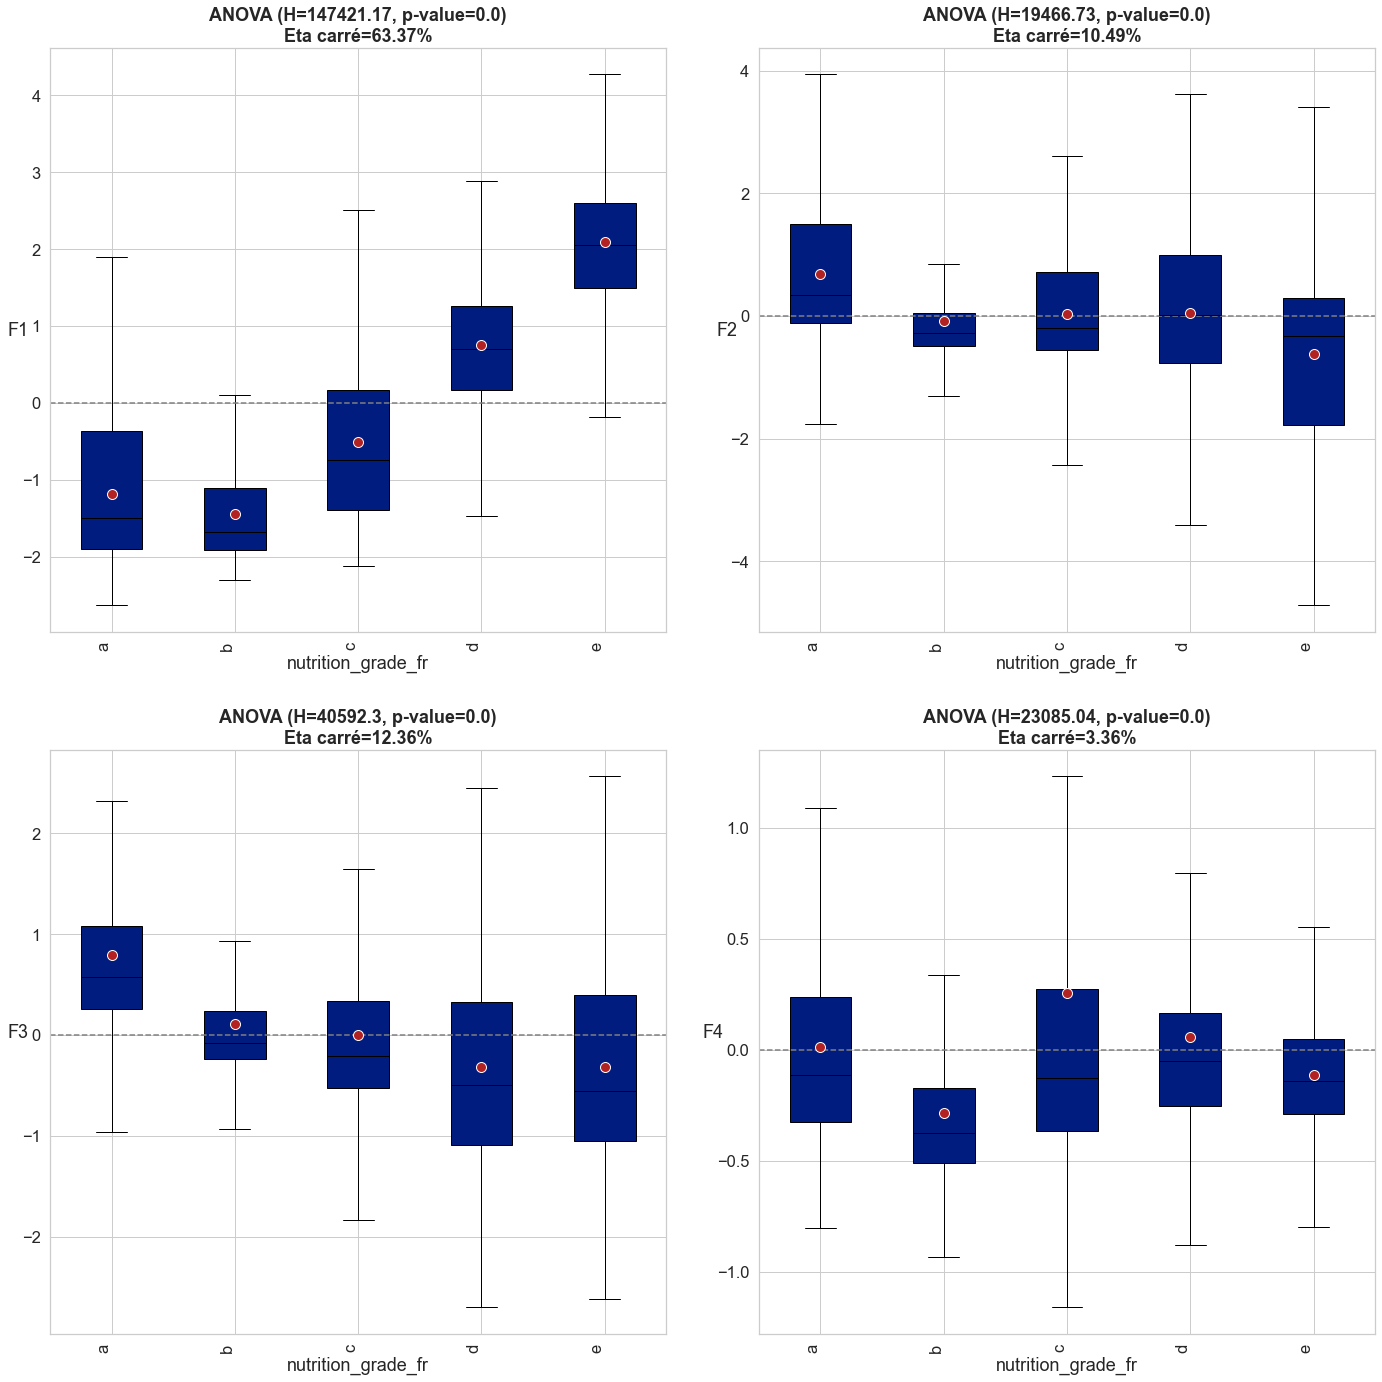

In [133]:
#Nutri-grade
analyse_variance(X_proj_k, 'nutrition_grade_fr', ['F1', 'F2', 'F3', 'F4'])

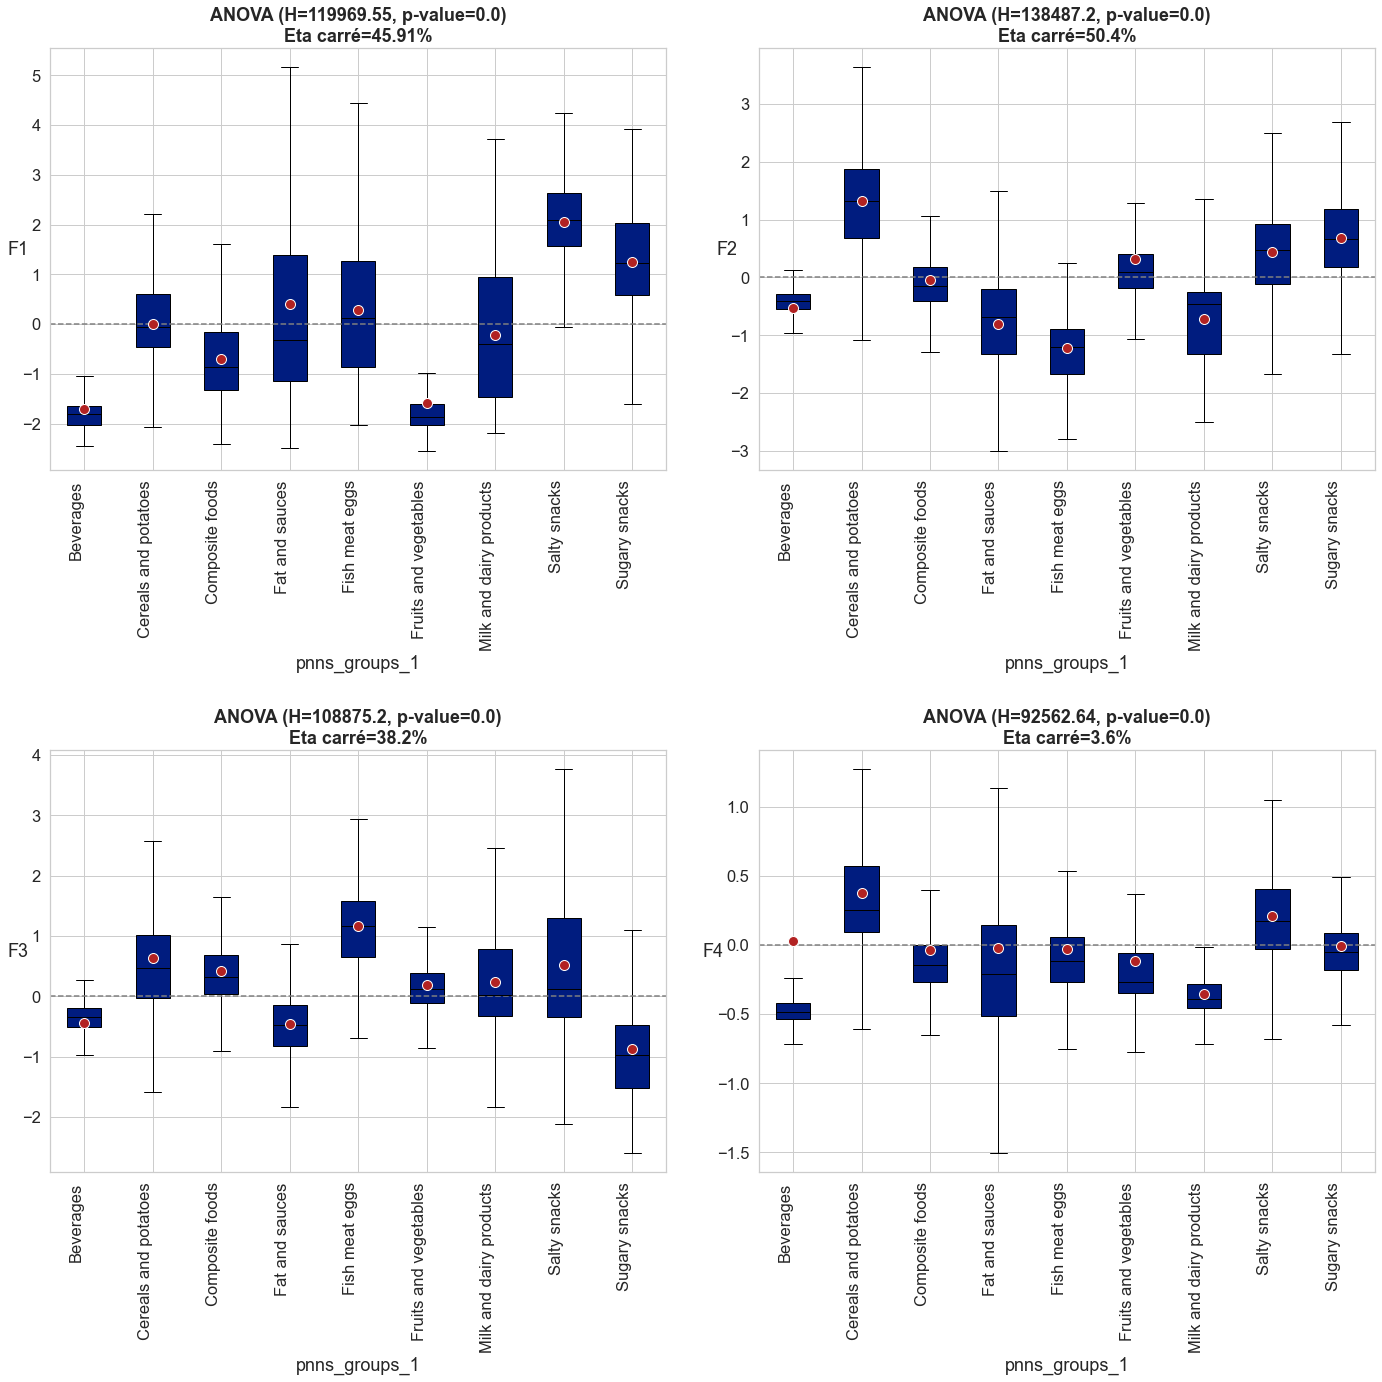

In [134]:
#Catégories
analyse_variance(X_proj_k, 'pnns_groups_1', ['F1', 'F2', 'F3', 'F4'])

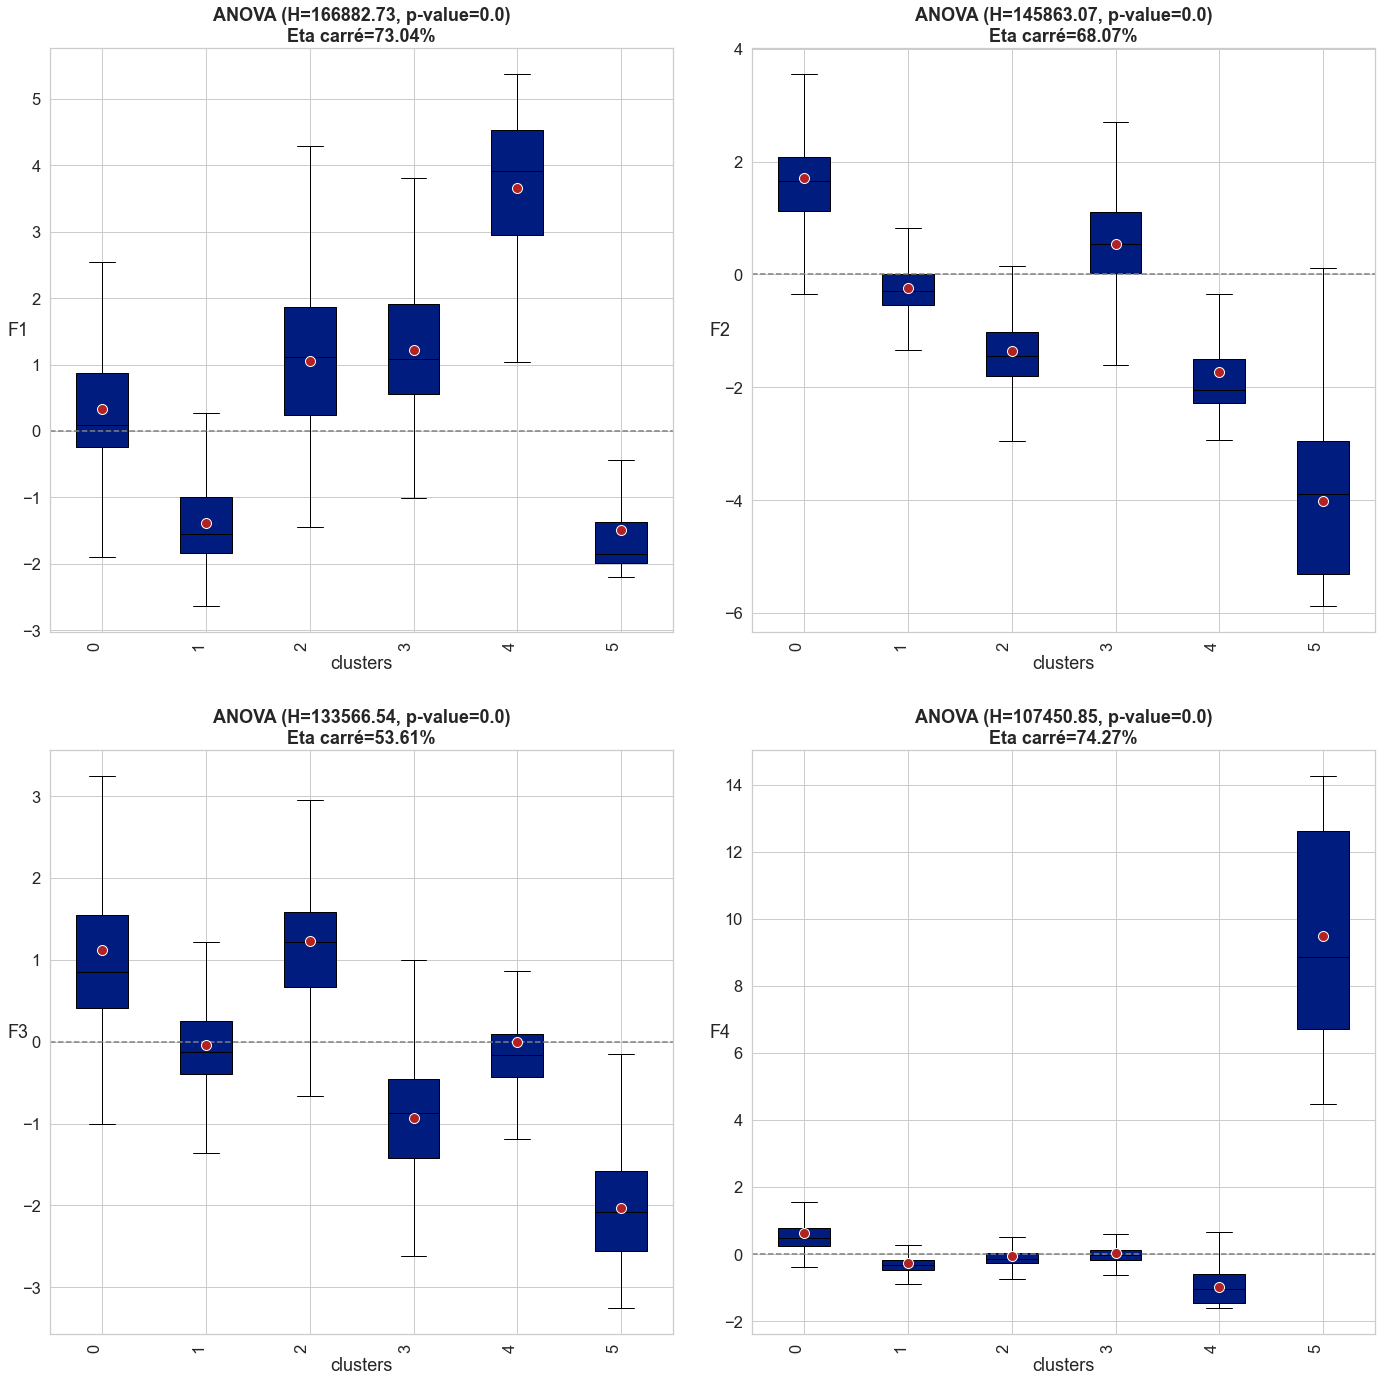

In [135]:
#Nouveaux clusters
analyse_variance(X_proj_k, 'clusters', ['F1', 'F2', 'F3', 'F4'])

La p-value étant nulle dans tous les cas, nous devons une nouvelle fois rejeter H0 et en conclure qu'il y existe des différences significatives entre nos clusters, qu'il s'agisse du nutri-grade, des catégories ou des nouveaux clusters. Ce qui me surprend un peu. En effet, en regardant les boxplots du nutri-grade par exemple, j'ai le sentiment que les médianes et les moyennes sur F2, F3 et F4 sont plutôt similaires les unes des autres. Voilà pourquoi j'ai également calculé le rapport de corrélation éta carré.

L'éta carré mesure la proportion de la variance totale de la variable quantitative qui est expliquée par les clusters. En d'autres termes, malgré une différence significative entre les moyennes des clusters pour une variable quantitative, un éta carré faible suggère que ces clusters n'expliquent qu'une petite partie de la variation sur cette variable.

Ainsi, il semble n'y avoir de corrélation entre le nutri-grade et nos composantes que sur F1. Sans surprise puisque F1 représente l'énergie, les lipides et le nutri-score qui sont déjà corrélées entre elles.

Il semble y avoir corrélation entre les catégories et nos composantes F1, F2 et dans une moindre mesure F3, mais toujours pas sur F4.

En revanche, il y a une forte corrélation entre nos nouveaux clusters et les 4 composantes principales.
# Conclusion <a class="anchor" id="conclusion"></a>
La classification nutri-score est performante pour identifier les aliments gras et caloriques, mais ne fait pas ou peu de distinction entre les aliments en fonction de leur taux de sel, de glucides, de protéines ou de fibres. Je ne doute pas de son efficacité pour départager les aliments en terme de leur effet sur la santé, mais si on cherche à expliquer le jeu de données en fonction de toutes les variables quantitatives, cette classification n'est pas optimale.

Quoi qu'il en soit, les données sont désormais nettoyées et prêtes à l'usage pour le développement d'une application.